In [64]:
import pandas as pd

# Load the CSV file
file_path = '/content/AZROU.IRD_readonly.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

_id  rfPowerValue0  cnValue0  cfoErrorValue0  \
0  633c35b1308869df8d5c7f83            -99         0               0   
1  633c36de308869df8d5c7f90            -99         0               0   
2  633c380a308869df8d5c7f92            -99         0               0   
3  633c3936308869df8d5c7f9f            -99         0               0   
4  633c3a62308869df8d5c7fa1            -99         0               0   

  agcState0 ceState0 symTimeState0 carrierState0 fecLockedState0 lockedState0  \
0     fault    fault         fault         fault           fault        fault   
1     fault    fault         fault         fault           fault        fault   
2     fault    fault         fault         fault           fault        fault   
3     fault    fault         fault         fault           fault        fault   
4     fault    fault         fault         fault           fault        fault   

   ...          optoInputNumber3          optoInputNumber4  \
0  ...  Optical coupler number 3  Optical coupler number 4   
1  ...  Optical coupler number 3  Optical coupler number 4   
2  ...  Optical coupler number 3  Optical coupler number 4   
3  ...  Optical coupler number 3  Optical coupler number 4   
4  ...  Optical coupler number 3  Optical coupler number 4   

           optoInputNumber5          optoInputNumber6  \
0  Optical coupler number 5  Optical coupler number 6   
1  Optical coupler number 5  Optical coupler number 6   
2  Optical coupler number 5  Optical coupler number 6   
3  Optical coupler number 5  Optical coupler number 6   
4  Optical coupler number 5  Optical coupler number 6   

           optoInputNumber7  name  IRD_ID  IPAddress  \
0  Optical coupler number 7  IRD1       1  10.0.12.4   
1  Optical coupler number 7  IRD1       1  10.0.12.4   
2  Optical coupler number 7  IRD1       1  10.0.12.4   
3  Optical coupler number 7  IRD1       1  10.0.12.4   
4  Optical coupler number 7  IRD1       1  10.0.12.4   

               CreationDate  id  
0  2022-10-04T14:31:29.552Z   1  
1  2022-10-04T14:36:30.141Z   2  
2  2022-10-04T14:41:30.239Z   3  
3  2022-10-04T14:46:30.257Z   4  
4  2022-10-04T14:51:30.235Z   5  

[5 rows x 291 columns]

In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45472 entries, 0 to 45471
Columns: 291 entries, _id to id
dtypes: bool(40), float64(45), int64(97), object(109)
memory usage: 88.8+ MB
None


- This output shows us that we have a substantial dataset with 45,472 entries and 291 columns. The data types include boolean, float64, int64, and object (likely strings or mixed types).

In [8]:
# Display summary statistics
print(df.describe())

       rfPowerValue0      cnValue0  cfoErrorValue0  tunerDatarate0  \
count   45472.000000  45472.000000         45472.0    4.547200e+04   
mean      -43.265856     13.476953             0.0    4.326847e+06   
std         4.437260      1.332826             0.0    3.456957e+05   
min       -99.000000      0.000000             0.0    0.000000e+00   
25%       -43.000000     13.000000             0.0    4.343552e+06   
50%       -43.000000     13.000000             0.0    4.355584e+06   
75%       -43.000000     14.000000             0.0    4.367616e+06   
max       -42.000000     15.000000             0.0    4.379648e+06   

       asiDatarate0  ipDatarate0  tsIpPacketPerIpPacket0  tsIpBufferlevel10  \
count       45472.0      45472.0                 45472.0            45472.0   
mean            0.0          0.0                     1.0                0.0   
std             0.0          0.0                     0.0                0.0   
min             0.0          0.0                     

This gives us an idea of the column names in our dataset. We can see various measurements related to the satellite receiver, including RF power values, carrier-to-noise ratios, data rates, and alarm states.

## Missing values

In [23]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
_id               0
rfPowerValue0     0
cnValue0          0
cfoErrorValue0    0
agcState0         0
                 ..
name              0
IRD_ID            0
IPAddress         0
CreationDate      0
id                0
Length: 291, dtype: int64


- it appears that most columns have no missing values, which is excellent for our analysis. However, the 'nid0' column has 287 missing values, which we should keep in mind for future analyses.

# Insights

we'll need to perform some more in-depth analysis. Let's start by examining key metrics and their relationships. We'll focus on RF power, carrier-to-noise ratio, data rates, and error rates.

In [19]:
# Select key metrics
key_metrics = ['rfPowerValue0', 'cnValue0', 'tunerDatarate0', 'asiDatarate0', 'ipDatarate0', 'tsIpPER0']

# Calculate basic statistics
stats = df[key_metrics].describe()
print('Basic statistics of key metrics:')
print(stats)

Basic statistics of key metrics:
       rfPowerValue0      cnValue0  tunerDatarate0  asiDatarate0  ipDatarate0  \
count   45472.000000  45472.000000    4.547200e+04       45472.0      45472.0   
mean      -43.265856     13.476953    4.326847e+06           0.0          0.0   
std         4.437260      1.332826    3.456957e+05           0.0          0.0   
min       -99.000000      0.000000    0.000000e+00           0.0          0.0   
25%       -43.000000     13.000000    4.343552e+06           0.0          0.0   
50%       -43.000000     13.000000    4.355584e+06           0.0          0.0   
75%       -43.000000     14.000000    4.367616e+06           0.0          0.0   
max       -42.000000     15.000000    4.379648e+06           0.0          0.0   

           tsIpPER0  
count  4.547200e+04  
mean   1.414500e+01  
std    3.552753e-15  
min    1.414500e+01  
25%    1.414500e+01  
50%    1.414500e+01  
75%    1.414500e+01  
max    1.414500e+01  


**visualize the distribution of these key metrics:**

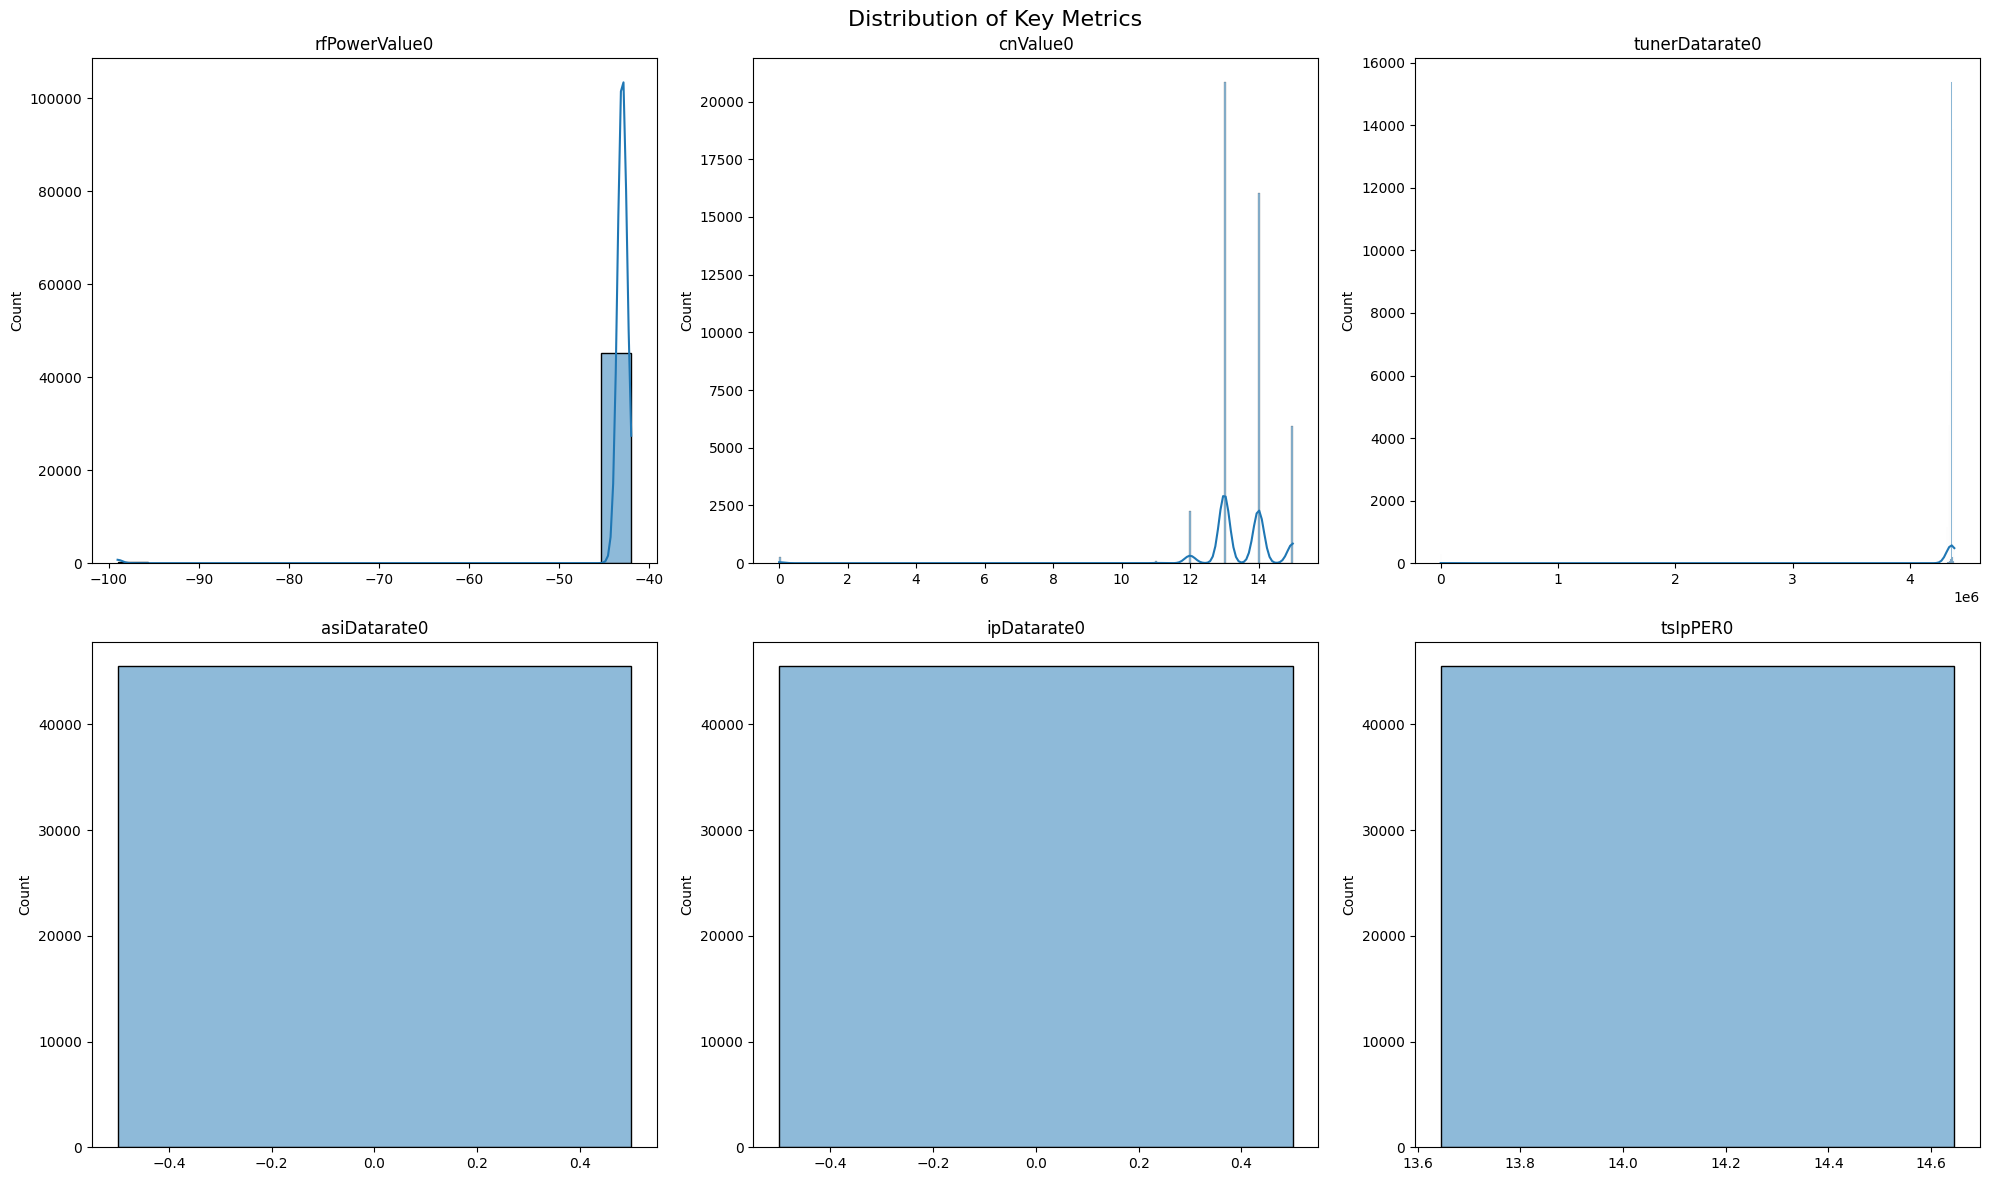

In [20]:
# Create histograms
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Key Metrics', fontsize=16)

for i, metric in enumerate(key_metrics):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[metric].dropna(), ax=ax, kde=True)
    ax.set_title(metric)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

This histogram shows the distribution of our key metrics: RF Power Value, Carrier-to-Noise Ratio, Tuner Data Rate, ASI Data Rate, IP Data Rate, and TS IP PER.

In [21]:
# Calculate correlation matrix
corr_matrix = df[key_metrics].corr()
print('\
Correlation matrix of key metrics:')
print(corr_matrix)

Correlation matrix of key metrics:
                rfPowerValue0  cnValue0  tunerDatarate0  asiDatarate0  \
rfPowerValue0        1.000000  0.796214        0.991598           NaN   
cnValue0             0.796214  1.000000        0.803641           NaN   
tunerDatarate0       0.991598  0.803641        1.000000           NaN   
asiDatarate0              NaN       NaN             NaN           NaN   
ipDatarate0               NaN       NaN             NaN           NaN   
tsIpPER0                  NaN       NaN             NaN           NaN   

                ipDatarate0  tsIpPER0  
rfPowerValue0           NaN       NaN  
cnValue0                NaN       NaN  
tunerDatarate0          NaN       NaN  
asiDatarate0            NaN       NaN  
ipDatarate0             NaN       NaN  
tsIpPER0                NaN       NaN  


**a heatmap visualization of the correlation matrix:**

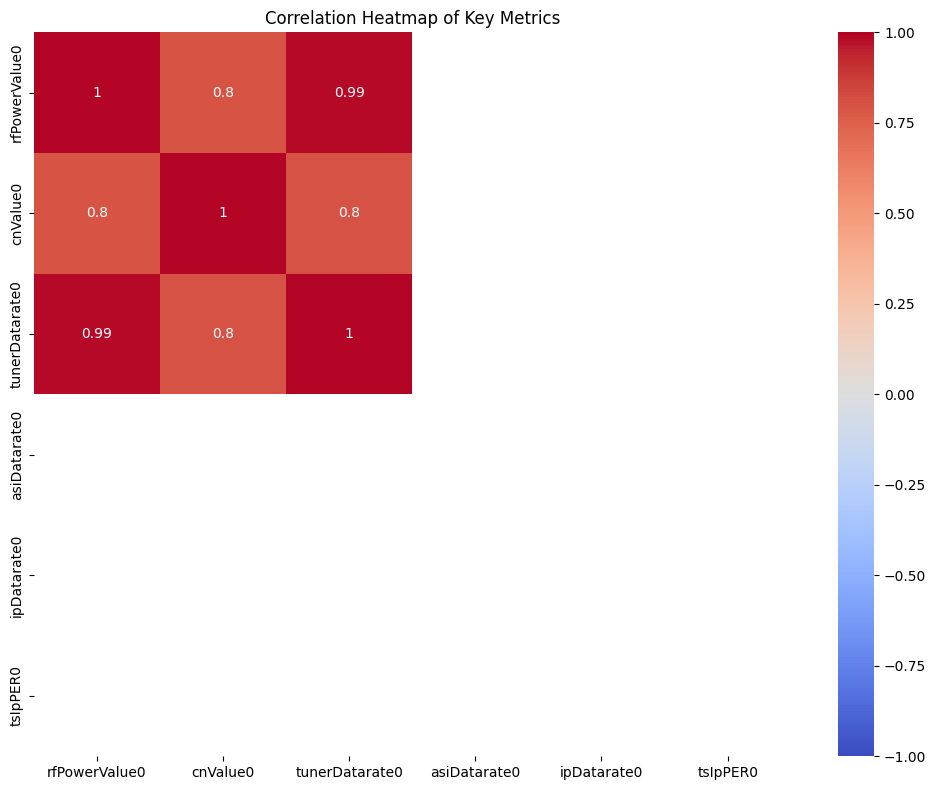

In [22]:
# Create heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Metrics')
plt.tight_layout()
plt.show()

From this analysis, we can draw several valuable insights:

- RF Power and Tuner Data Rate: There's a very strong positive correlation (0.992) between RF Power Value and Tuner Data Rate. This suggests that as the RF Power increases, the Tuner Data Rate also increases significantly.

- Carrier-to-Noise Ratio (CNR) and RF Power: There's a strong positive correlation (0.796) between CNR and RF Power. This indicates that higher RF Power is associated with better signal quality (higher CNR).

- CNR and Tuner Data Rate: There's also a strong positive correlation (0.804) between CNR and Tuner Data Rate. This suggests that better signal quality (higher CNR) is associated with higher data rates.

- ASI and IP Data Rates: Interestingly, both ASI Data Rate and IP Data Rate show zero values across all statistics. This might indicate that these features are not being utilized in the current dataset or there might be an issue with data collection for these metrics.

- TS IP PER (Packet Error Rate): This metric shows a constant value of 14.145 across all statistics. This could indicate a fixed error rate in the system or potentially an issue with how this metric is being measured or recorded.

- RF Power Distribution: The RF Power values are centered around -43 dBm, with a standard deviation of about 4.4 dBm. This gives us an idea of the typical signal strength in the system.

- CNR Distribution: The Carrier-to-Noise Ratio has a mean of about 13.5 dB, with a standard deviation of 1.3 dB. This provides insight into the typical signal quality of the system.

**visualize any trends, patterns, or anomalies in the data.**

In [15]:
# Convert CreationDate to datetime
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

# Sort the dataframe by CreationDate
df = df.sort_values('CreationDate')

# Display information about the CreationDate column
print("CreationDate column info:")
print(df['CreationDate'].describe())

CreationDate column info:
count                                  45472
mean     2023-08-30 07:46:10.678613504+00:00
min         2022-10-04 14:31:29.552000+00:00
25%      2023-05-31 07:22:58.527749888+00:00
50%      2023-08-15 15:37:00.455000064+00:00
75%      2023-12-12 00:24:01.349499904+00:00
max         2024-02-13 12:25:41.932000+00:00
Name: CreationDate, dtype: object


- This summary gives us valuable insights into the timespan of our data. We can see that the dataset covers a period from October 4, 2022, to February 13, 2024, which is approximately 16 months.

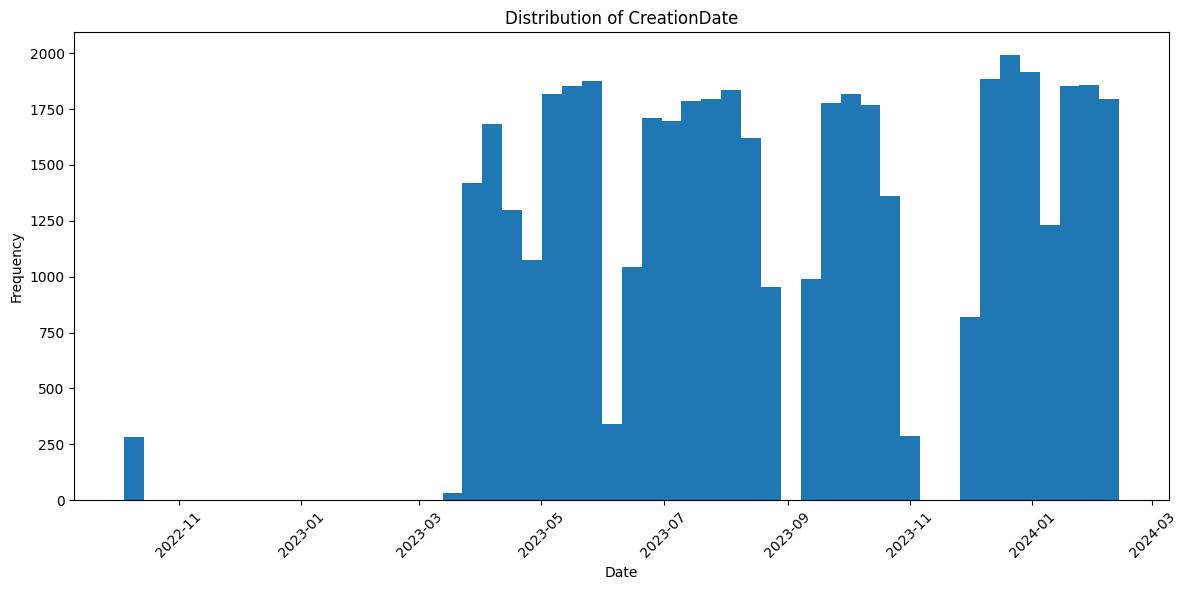

In [16]:
# Plot the distribution of CreationDate
plt.figure(figsize=(12, 6))
plt.hist(df['CreationDate'], bins=50)
plt.title('Distribution of CreationDate')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- We can observe that the data collection is not uniformly distributed, with some periods having more frequent data collection than others.

In [17]:
# Display the first few rows sorted by CreationDate
print("\nFirst few rows sorted by CreationDate:")
print(df[['CreationDate', 'rfPowerValue0', 'cnValue0']].head())


First few rows sorted by CreationDate:
                      CreationDate  rfPowerValue0  cnValue0
0 2022-10-04 14:31:29.552000+00:00            -99         0
1 2022-10-04 14:36:30.141000+00:00            -99         0
2 2022-10-04 14:41:30.239000+00:00            -99         0
3 2022-10-04 14:46:30.257000+00:00            -99         0
4 2022-10-04 14:51:30.235000+00:00            -99         0


In [18]:
# Display the last few rows sorted by CreationDate
print("\nLast few rows sorted by CreationDate:")
print(df[['CreationDate', 'rfPowerValue0', 'cnValue0']].tail())


Last few rows sorted by CreationDate:
                          CreationDate  rfPowerValue0  cnValue0
45467 2024-02-13 11:50:41.850000+00:00            -43        15
45468 2024-02-13 11:57:41.819000+00:00            -43        15
45469 2024-02-13 12:04:41.841000+00:00            -43        15
45470 2024-02-13 12:18:41.808000+00:00            -43        14
45471 2024-02-13 12:25:41.932000+00:00            -43        15


- we can see that the rfPowerValue0 and cnValue0 columns contain numerical data that changes over time. The rfPowerValue0 seems to range from -99 to -43 in our samples, while cnValue0 ranges from 0 to 15.

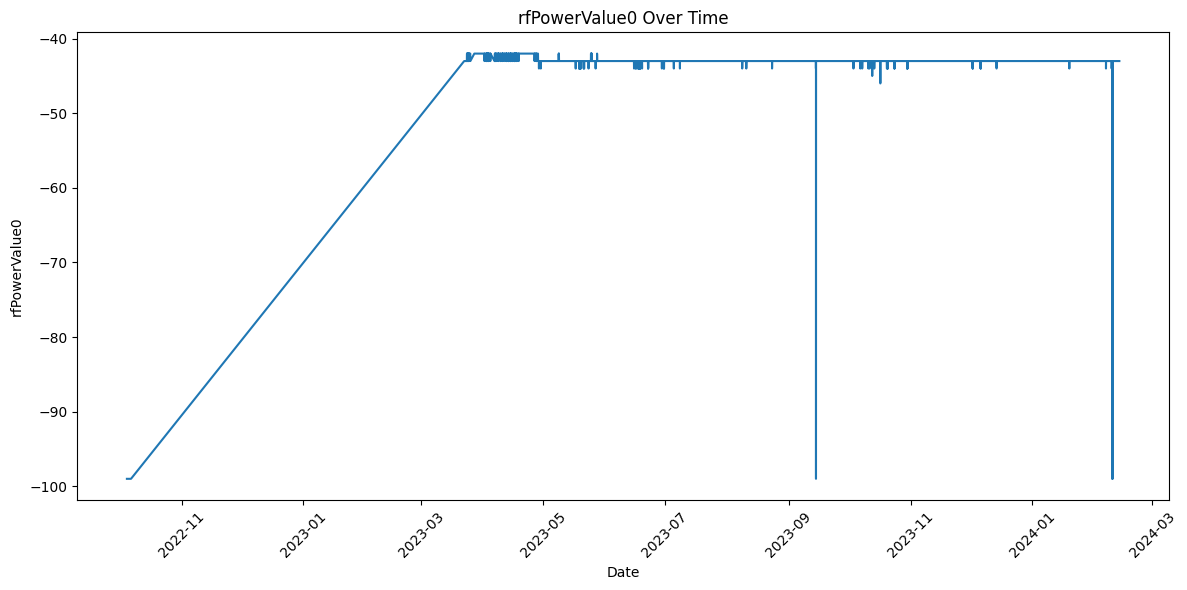

In [34]:
# Plot rfPowerValue0 over time
plt.figure(figsize=(12, 6))
plt.plot(df['CreationDate'], df['rfPowerValue0'])
plt.title('rfPowerValue0 Over Time')
plt.xlabel('Date')
plt.ylabel('rfPowerValue0')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

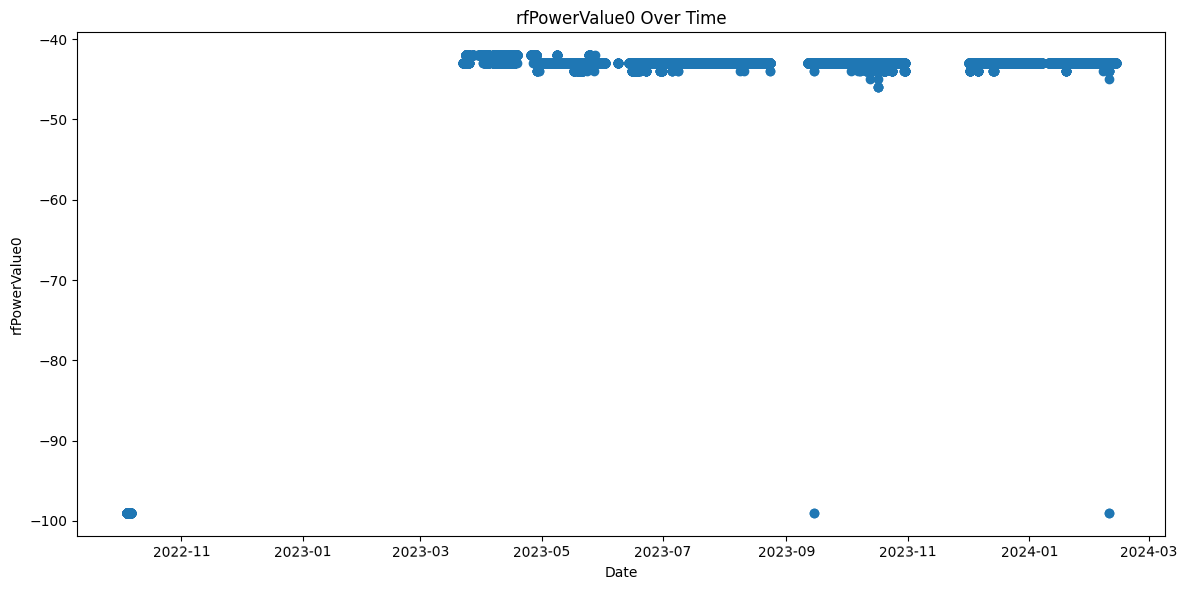

In [36]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['CreationDate'], df['rfPowerValue0'])
plt.title('rfPowerValue0 Over Time')
plt.xlabel('Date')
plt.ylabel('rfPowerValue0')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

- This plot shows the variation of rfPowerValue0 over time. We can observe fluctuations in the RF power value, which could be indicative of signal strength changes or other network-related phenomena.

In [38]:
# Function to get column types
def get_column_types(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
    return numeric_cols, categorical_cols, datetime_cols

numeric_cols, categorical_cols, datetime_cols = get_column_types(df)

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))
print("Datetime columns:", len(datetime_cols))

Numeric columns: 142
Categorical columns: 148
Datetime columns: 0


In [39]:
# Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df[numeric_cols].describe())


Basic statistics for numeric columns:
       rfPowerValue0      cnValue0  cfoErrorValue0  tunerDatarate0  \
count   45472.000000  45472.000000         45472.0    4.547200e+04   
mean      -43.265856     13.476953             0.0    4.326847e+06   
std         4.437260      1.332826             0.0    3.456957e+05   
min       -99.000000      0.000000             0.0    0.000000e+00   
25%       -43.000000     13.000000             0.0    4.343552e+06   
50%       -43.000000     13.000000             0.0    4.355584e+06   
75%       -43.000000     14.000000             0.0    4.367616e+06   
max       -42.000000     15.000000             0.0    4.379648e+06   

       asiDatarate0  ipDatarate0  tsIpPacketPerIpPacket0  tsIpBufferlevel10  \
count       45472.0      45472.0                 45472.0            45472.0   
mean            0.0          0.0                     1.0                0.0   
std             0.0          0.0                     0.0                0.0   
min           

In [40]:
# Distribution of categorical columns
print("\nDistribution of top 5 categorical columns:")
for col in categorical_cols[:5]:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))


Distribution of top 5 categorical columns:

_id:
_id
6.47E+30                    0.000044
6.48E+26                    0.000044
6.48E+28                    0.000044
6.47E+24                    0.000044
652d0c735ebeadb289047b99    0.000022
                              ...   
64a34bdca13ac2982c2583ad    0.000022
64a34d80a13ac2982c2583bc    0.000022
64a34f24a13ac2982c2583c3    0.000022
64a350c8a13ac2982c2583d2    0.000022
65cb51b5ea4f26cbd4e29df1    0.000022
Name: proportion, Length: 45468, dtype: float64

agcState0:
agcState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

ceState0:
ceState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

symTimeState0:
symTimeState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

carrierState0:
carrierState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64


In [41]:
# Correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

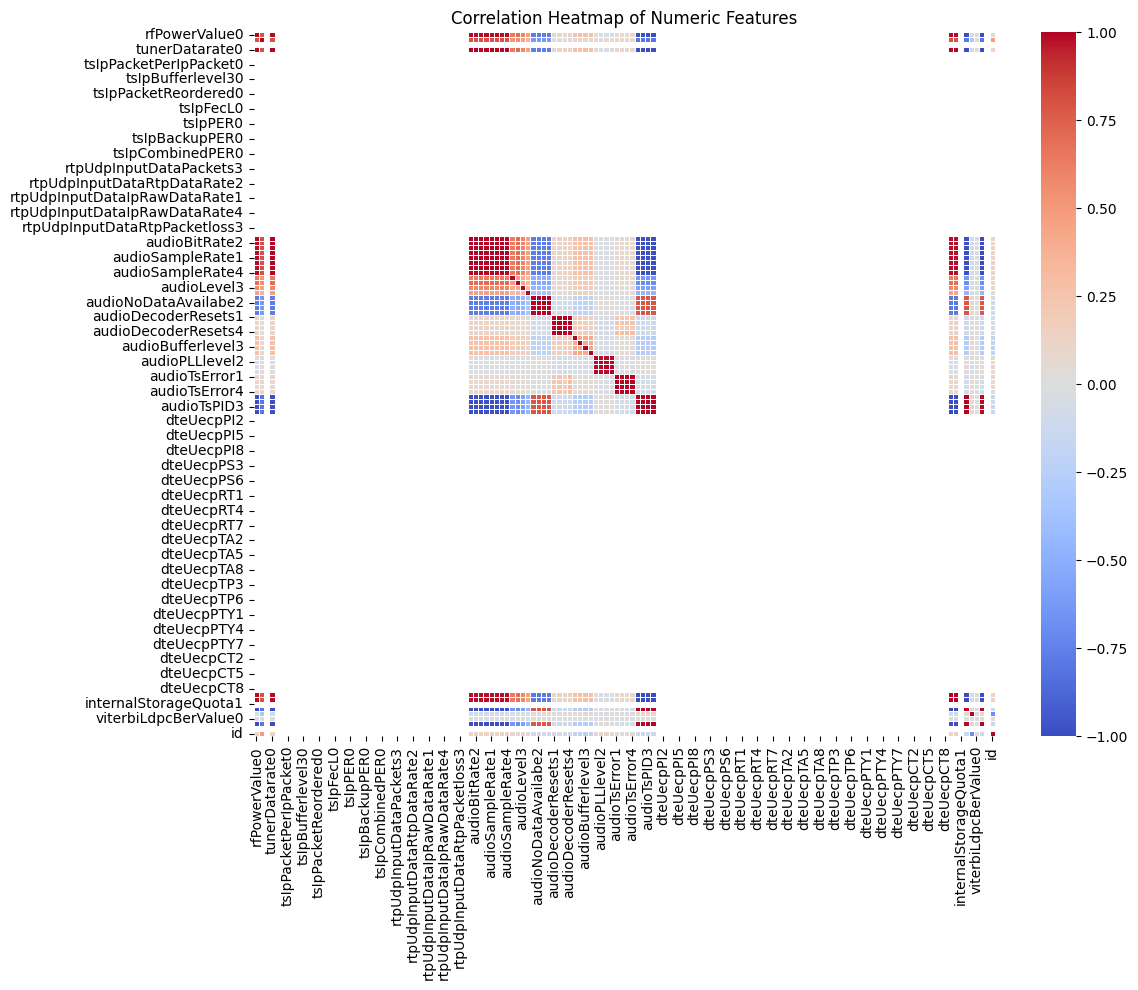

In [42]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

Key observations:

- The dataset is quite large and complex, with a mix of numerical and categorical variables.
- For the categorical columns shown, there's a consistent pattern where the 'ok' state is dominant (about 99.37%) compared to the 'fault' state (about 0.63%).
- The correlation heatmap shows varying degrees of correlation between numeric features, which could be useful for further analysis or feature selection in modeling tasks.

# Categorization

In [143]:
# Extract and categorize all column names to get an overview of their significance
columns = df.columns

# Initialize dictionaries to categorize columns
identifiers = []
measurements = []
states = []
optical_inputs = []
tunerAlarm = []
ts = []
udpInputDataAlarmActive = []
icecastInputDataAlarmActive = []
rtpUdpInputData = []
audio = []
dte = []
currentInputSource = []
internalStorage = []
caseTemperature = []
udpInputDataChannel = []
icecastInputDataServer = []
outputType = []
metadata = []
other = []

In [144]:
# Categorize columns based on name patterns
for col in columns:
    if 'audio' in col:
        audio.append(col)
    elif 'ID' in col or col in ['_id', 'id']:
        identifiers.append(col)
    elif 'Value' in col:
        measurements.append(col)
    elif 'State' in col:
        states.append(col)
    elif 'optoInputNumber' in col:
        optical_inputs.append(col)
    elif 'tunerAlarm' in col:
        tunerAlarm.append(col)
    elif 'ts' in col:
        ts.append(col)
    elif 'udpInputDataAlarmActive' in col:
        udpInputDataAlarmActive.append(col)
    elif 'icecastInputDataAlarmActive' in col:
        icecastInputDataAlarmActive.append(col)
    elif 'rtpUdpInputData' in col:
        rtpUdpInputData.append(col)
    elif 'dte' in col:
        dte.append(col)
    elif 'currentInputSource' in col:
        currentInputSource.append(col)
    elif 'internalStorage' in col:
        internalStorage.append(col)
    elif 'caseTemperature' in col:
        caseTemperature.append(col)
    elif 'udpInputDataChannel' in col:
        udpInputDataChannel.append(col)
    elif 'icecastInputDataServer' in col:
        icecastInputDataServer.append(col)
    elif 'outputType' in col:
        outputType.append(col)
    elif col in ['name', 'IPAddress', 'CreationDate']:
        metadata.append(col)
    else:
        # Add any uncategorized columns
        other.append(col)

In [32]:
# Display the categorized columns
metadata

['name', 'IPAddress', 'CreationDate']

# Analysis

## Measurements

In [44]:
measurements

['rfPowerValue0',
 'cnValue0',
 'cfoErrorValue0',
 'viterbiLdpcBerValue0',
 'rsBchBerValue0']

In [39]:
# Get descriptive statistics for the measurement columns
measurement_stats = data[measurements].describe()
measurement_stats

rfPowerValue0      cnValue0  cfoErrorValue0  viterbiLdpcBerValue0  \
count   45472.000000  45472.000000         45472.0          4.547200e+04   
mean      -43.265856     13.476953             0.0         3.509852e+126   
std         4.437260      1.332826             0.0         2.000022e+128   
min       -99.000000      0.000000             0.0          3.500000e-05   
25%       -43.000000     13.000000             0.0          1.510000e-04   
50%       -43.000000     13.000000             0.0          2.330000e-04   
75%       -43.000000     14.000000             0.0          3.210000e-04   
max       -42.000000     15.000000             0.0         1.140000e+130   

       rsBchBerValue0  
count    45472.000000  
mean         0.006312  
std          0.079195  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000

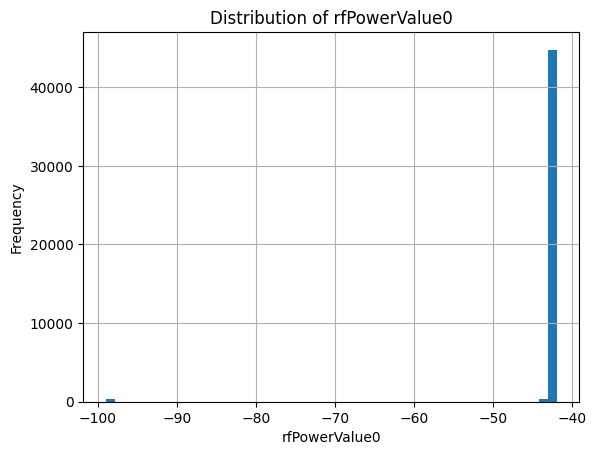

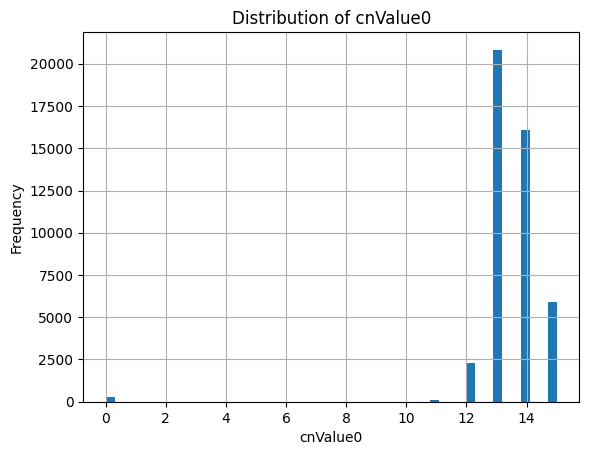

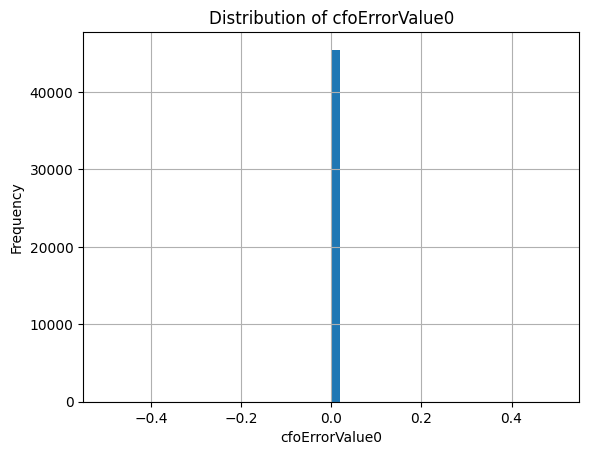

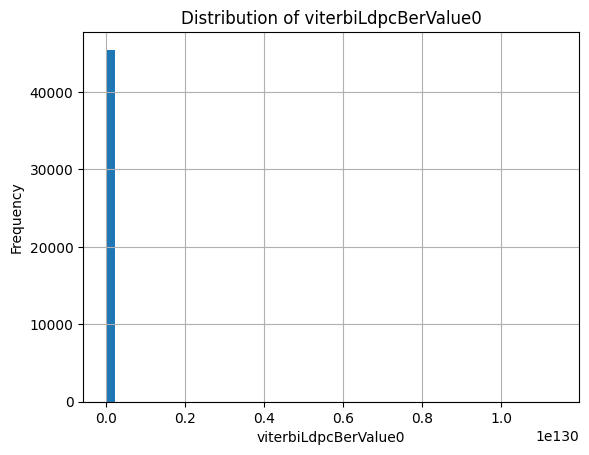

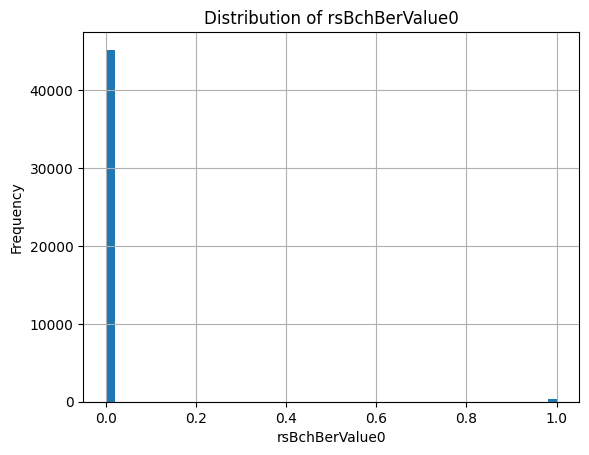

In [42]:
import matplotlib.pyplot as plt

for col in measurements:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

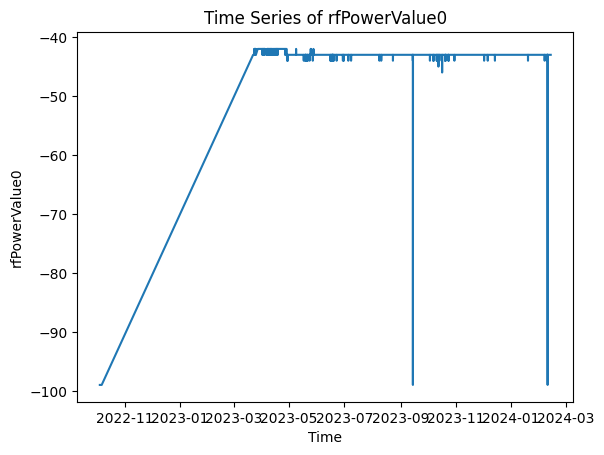

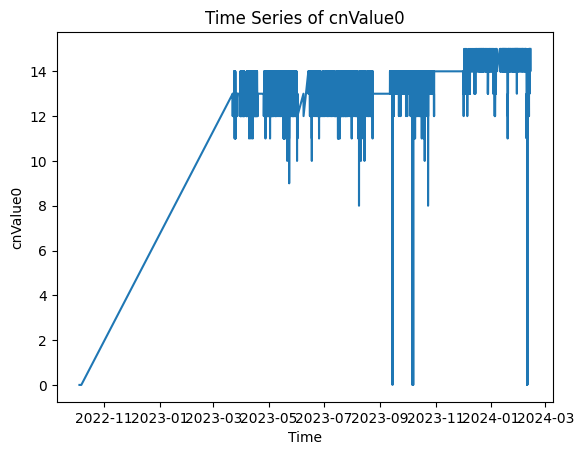

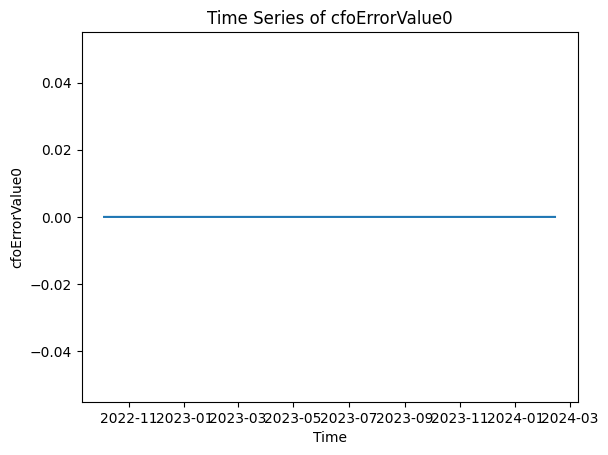

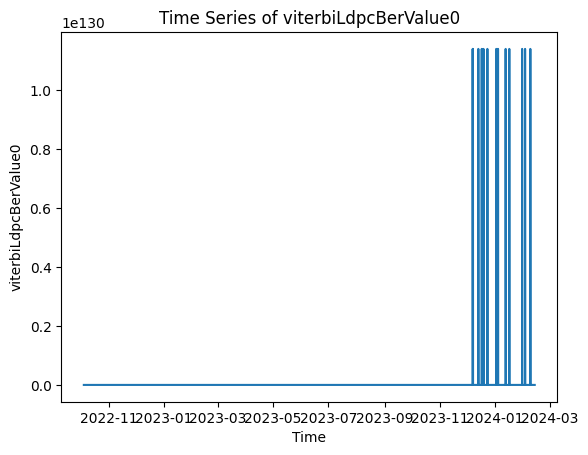

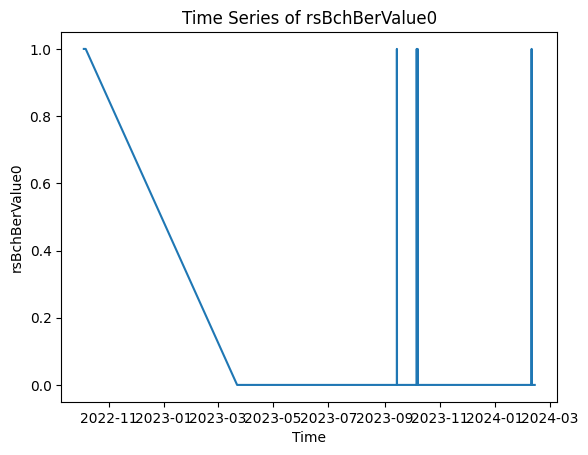

In [43]:
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

for col in measurements:
    plt.figure()
    plt.plot(data['CreationDate'], data[col])
    plt.title(f'Time Series of {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()

In [43]:
# Function to get column types
def get_column_types(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
    return numeric_cols, categorical_cols

numeric_cols, categorical_cols = get_column_types(df)

# 1. Correlation analysis for numerical variables
corr_matrix = df[numeric_cols].corr()

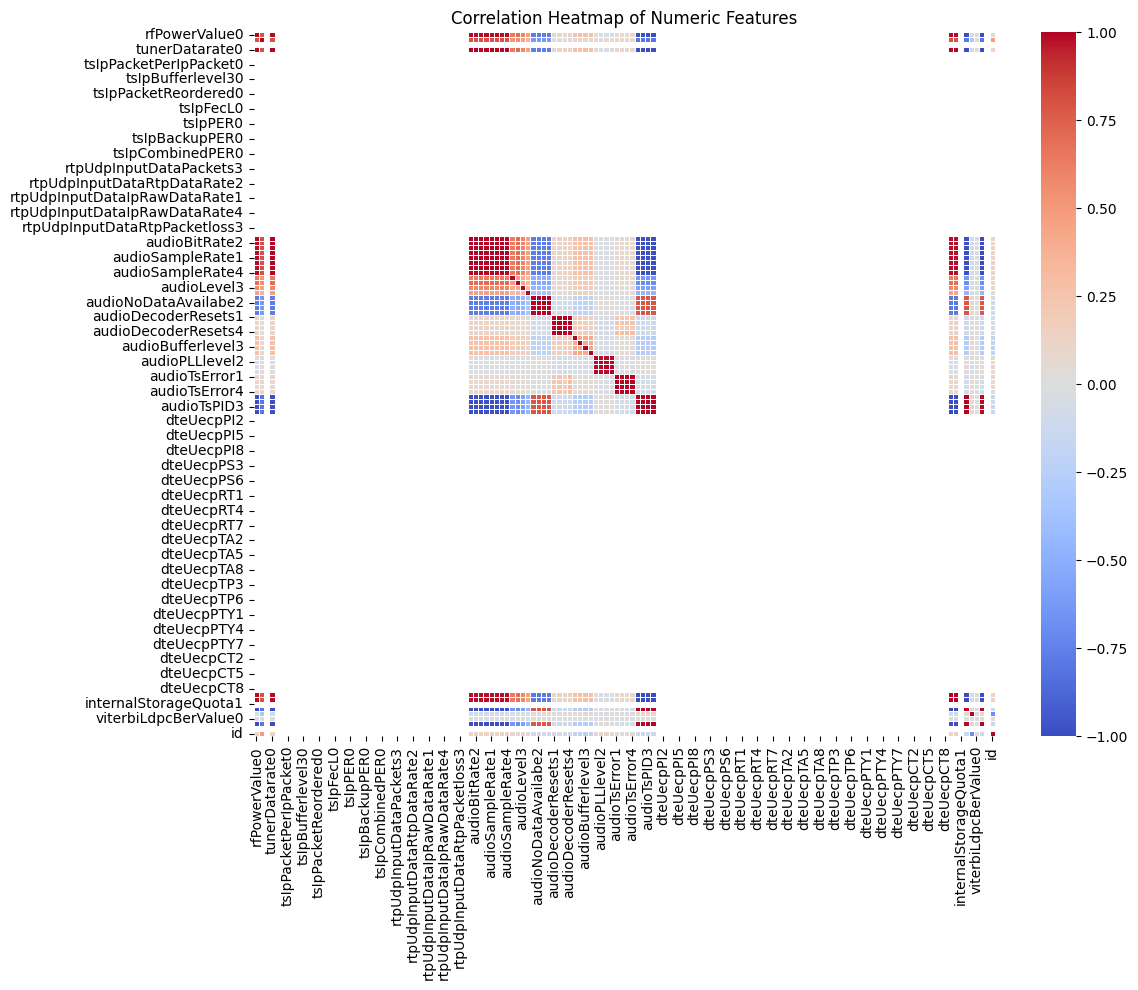

In [44]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [45]:
# 2. Top correlated pairs
top_corr_pairs = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_corr_pairs = top_corr_pairs[top_corr_pairs != 1.0]  # Remove self-correlations
print("Top 10 correlated pairs:")
print(top_corr_pairs.head(10))

Top 10 correlated pairs:
audioTsPID1                internalStorageQuotaUsed1     1.0
audioTsPID2                internalStorageQuotaUsed1     1.0
internalStorageFree1       internalStorageFreeMemory0    1.0
audioTsPID1                audioTsPID2                   1.0
audioTsPID4                audioTsPID3                   1.0
audioTsPID1                audioTsPID4                   1.0
audioTsPID2                audioTsPID4                   1.0
internalStorageQuotaUsed1  audioTsPID3                   1.0
audioTsPID3                audioTsPID2                   1.0
                           audioTsPID1                   1.0
dtype: float64


In [46]:
# 3. Categorical variable analysis
cat_counts = {col: df[col].value_counts(normalize=True) for col in categorical_cols[:5]}
print("\nDistribution of top 5 categorical variables:")
for col, counts in cat_counts.items():
    print(f"\n{col}:")
    print(counts)


Distribution of top 5 categorical variables:

_id:
_id
6.47E+30                    0.000044
6.48E+26                    0.000044
6.48E+28                    0.000044
6.47E+24                    0.000044
652d0c735ebeadb289047b99    0.000022
                              ...   
64a34bdca13ac2982c2583ad    0.000022
64a34d80a13ac2982c2583bc    0.000022
64a34f24a13ac2982c2583c3    0.000022
64a350c8a13ac2982c2583d2    0.000022
65cb51b5ea4f26cbd4e29df1    0.000022
Name: proportion, Length: 45468, dtype: float64

agcState0:
agcState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

ceState0:
ceState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

symTimeState0:
symTimeState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64

carrierState0:
carrierState0
ok       0.993688
fault    0.006312
Name: proportion, dtype: float64


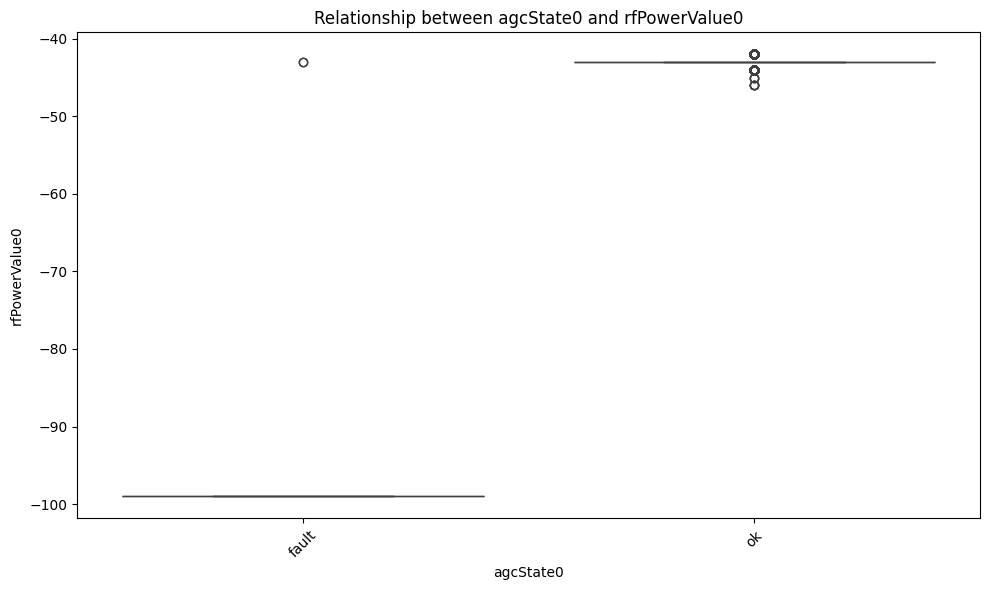

In [52]:
# 4. Relationship between numerical and categorical variables
def cat_num_relationship(df, cat_col, num_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Relationship between {cat_col} and {num_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Choose a categorical and numerical column for demonstration
cat_col = categorical_cols[1]
num_col = numeric_cols[0]
cat_num_relationship(df, cat_col, num_col)

## State

In [70]:
states

['agcState0',
 'ceState0',
 'symTimeState0',
 'carrierState0',
 'fecLockedState0',
 'lockedState0',
 'tsSyncState1',
 'tsSyncState2',
 'tsSyncState3',
 'udpInputDataState1',
 'udpInputDataState2',
 'udpInputDataState3',
 'udpInputDataState4',
 'icecastInputDataState1',
 'icecastInputDataState2',
 'icecastInputDataState3',
 'icecastInputDataState4',
 'currentInputSourceState1',
 'currentInputSourceState2',
 'currentInputSourceState3',
 'currentInputSourceState4',
 'currentInputSourceState5',
 'currentInputSourceState6',
 'internalStorageState0',
 'optoInputState1',
 'optoInputState2',
 'optoInputState3',
 'optoInputState4',
 'optoInputState5',
 'optoInputState6',
 'optoInputState7']

In [71]:
# Get descriptive statistics for the states columns
states = data[states].describe()
states

agcState0 ceState0 symTimeState0 carrierState0 fecLockedState0  \
count      45472    45472         45472         45472           45472   
unique         2        2             2             2               2   
top           ok       ok            ok            ok              ok   
freq       45185    45185         45185         45185           45185   

       lockedState0 tsSyncState1 tsSyncState2 tsSyncState3 udpInputDataState1  \
count         45472        45472        45472        45472              45472   
unique            2            2            1            1                  1   
top              ok           ok        fault        fault          undefined   
freq          45185        45184        45472        45472              45472   

        ... currentInputSourceState5 currentInputSourceState6  \
count   ...                    45472                    45472   
unique  ...                        2                        2   
top     ...                    fault                    fault   
freq    ...                    45191                    45191   

       internalStorageState0 optoInputState1 optoInputState2 optoInputState3  \
count                  45472           45472           45472           45472   
unique                     1               1               1               1   
top                       ok             off             off             off   
freq                   45472           45472           45472           45472   

       optoInputState4 optoInputState5 optoInputState6 optoInputState7  
count            45472           45472           45472           45472  
unique               1               1               1               1  
top                off             off             off             off  
freq             45472           45472           45472           45472  

[4 rows x 31 columns]

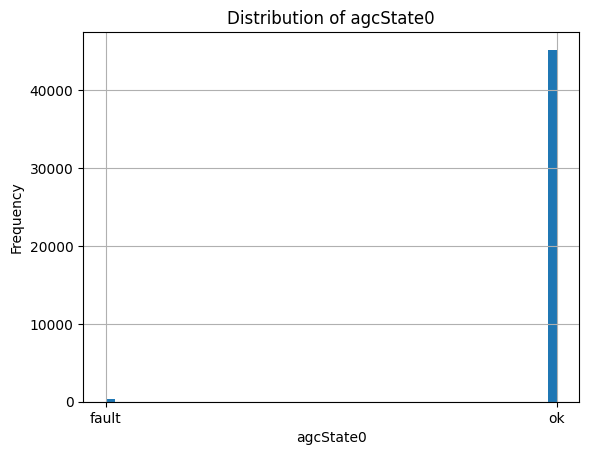

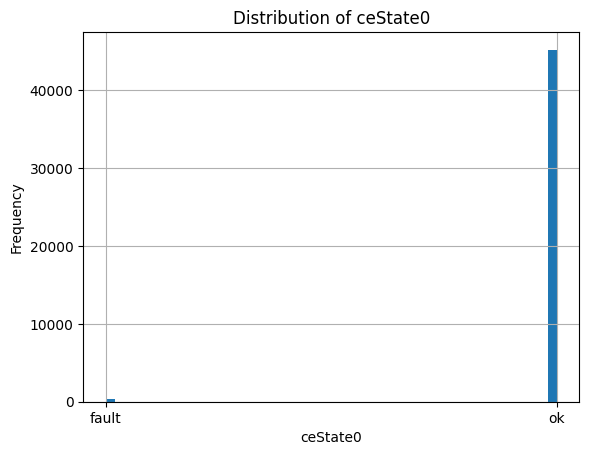

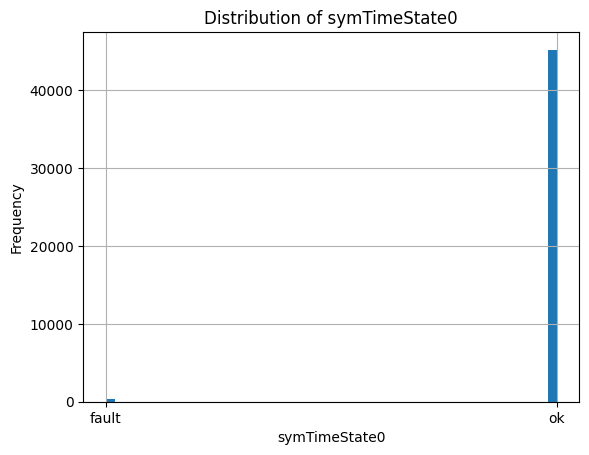

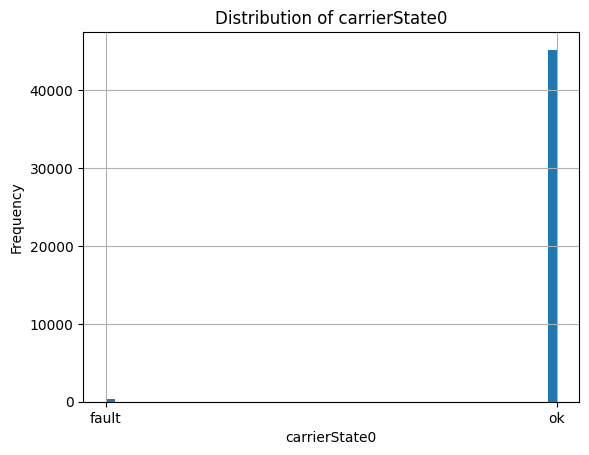

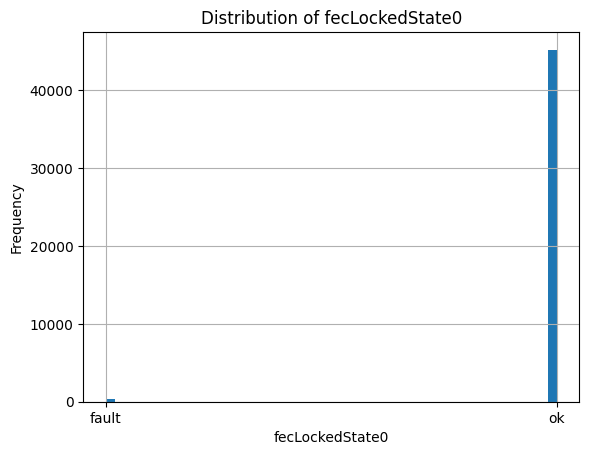

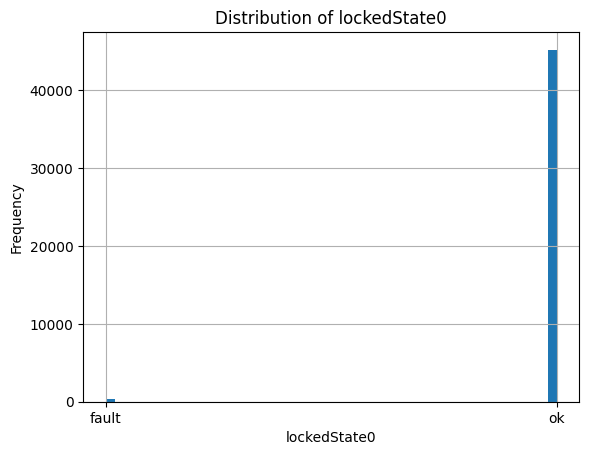

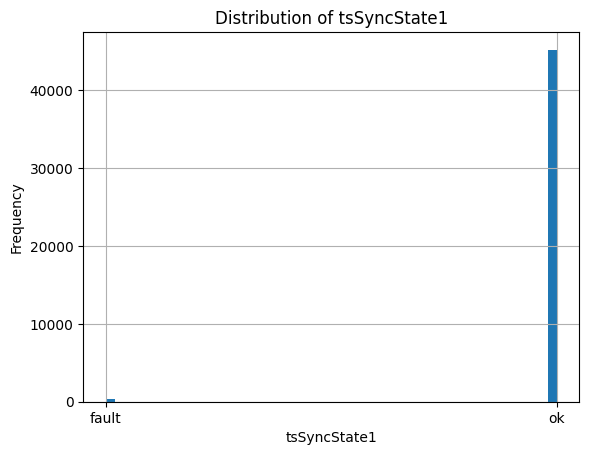

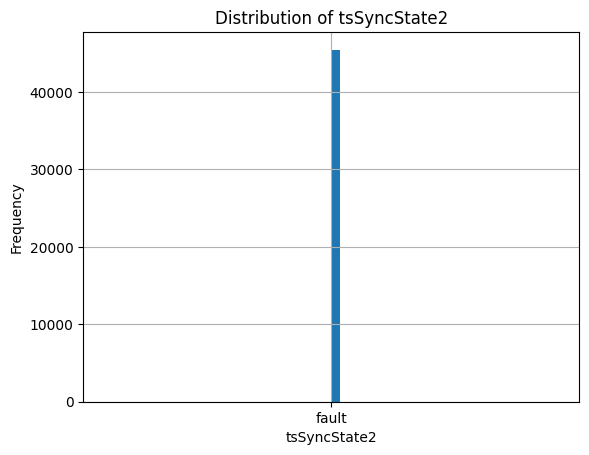

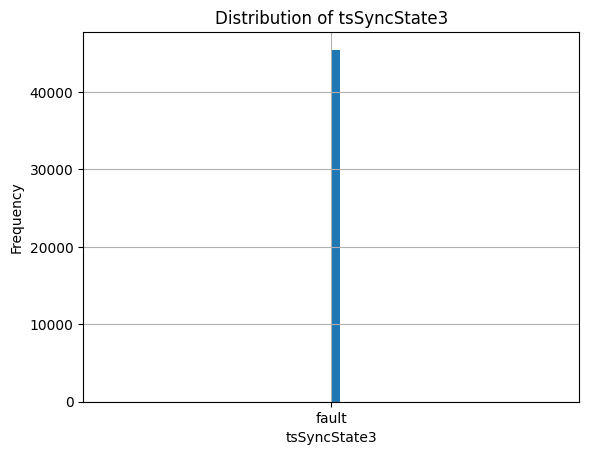

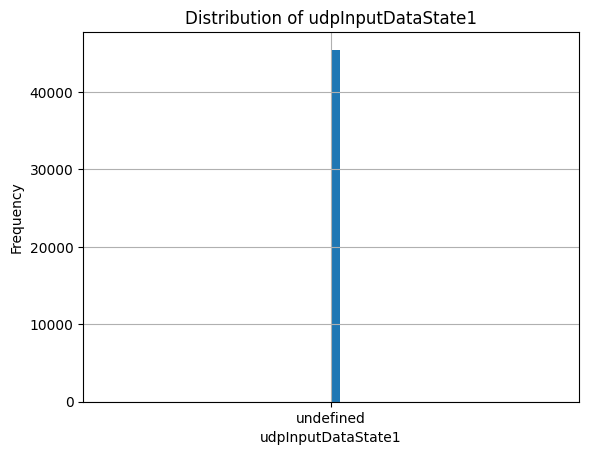

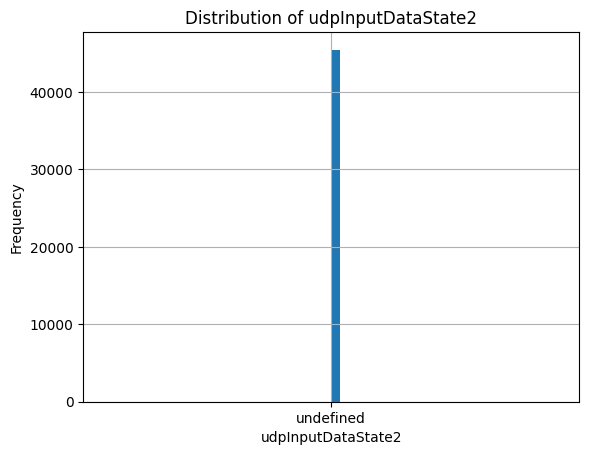

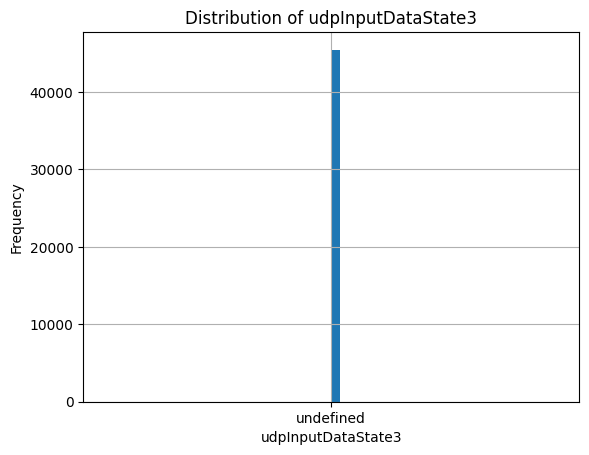

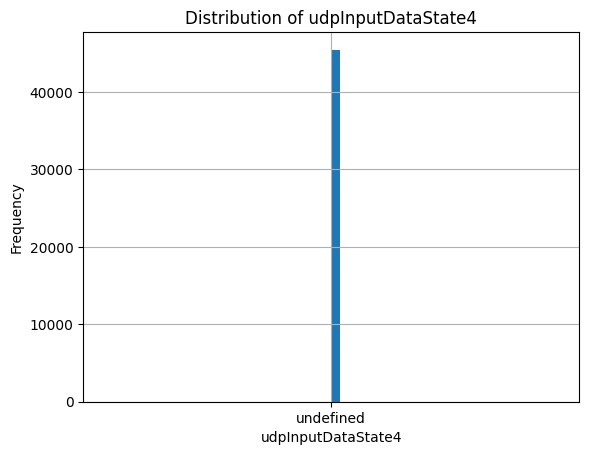

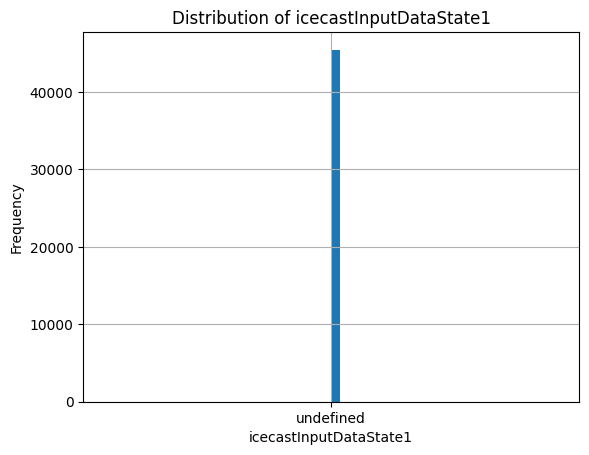

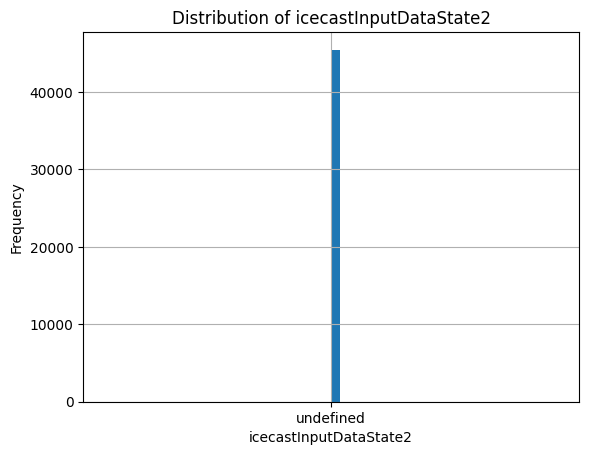

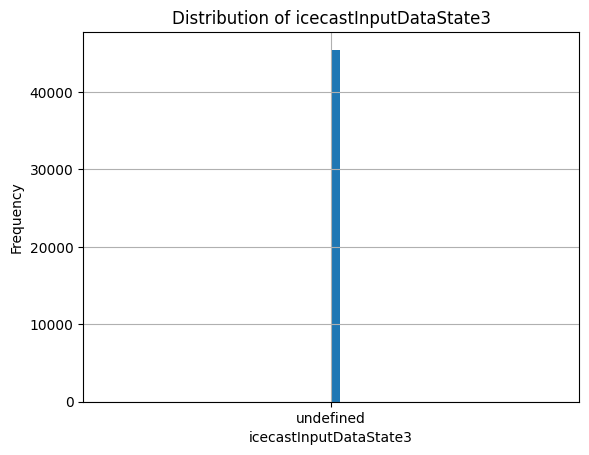

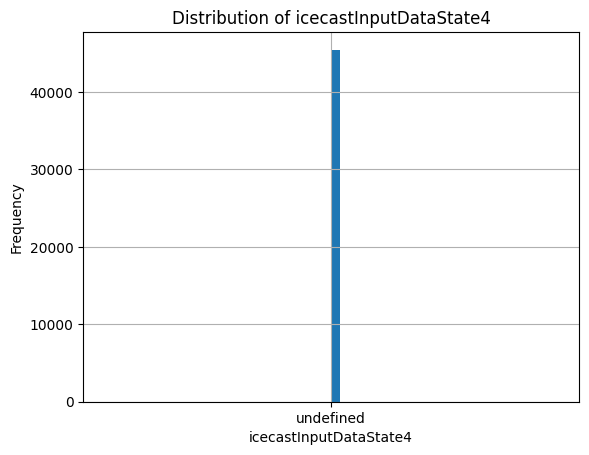

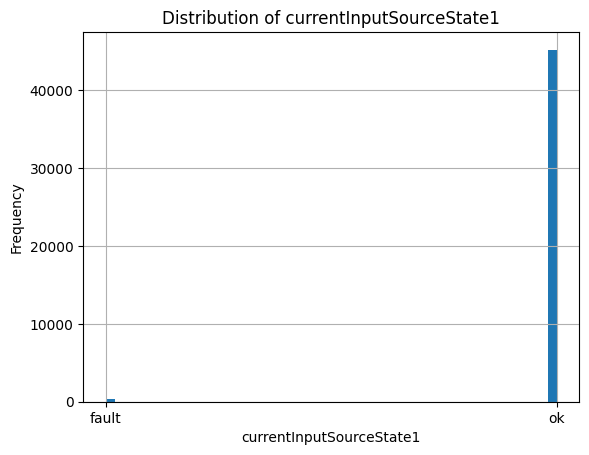

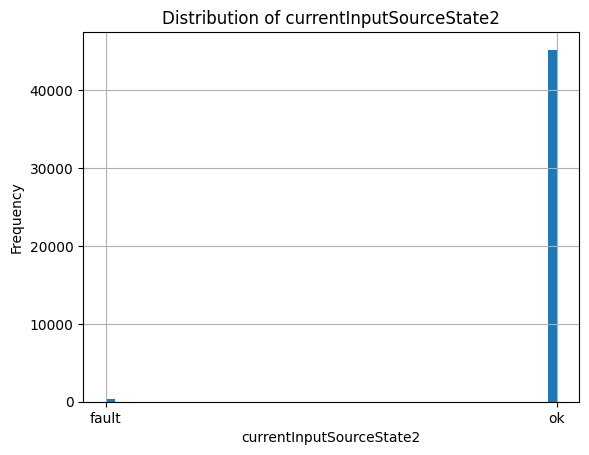

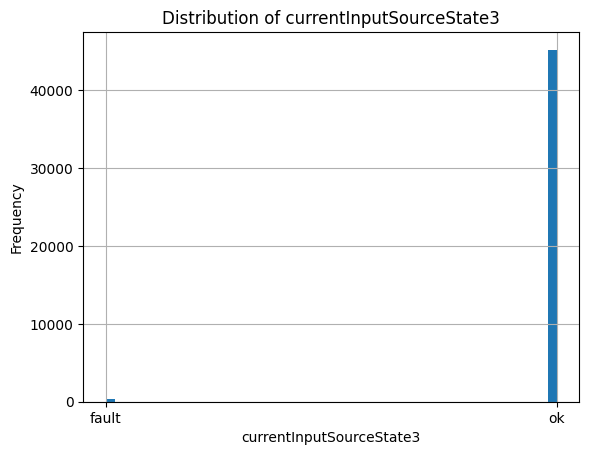

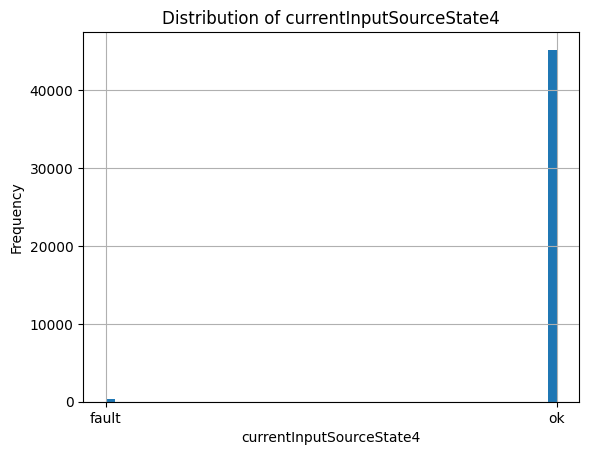

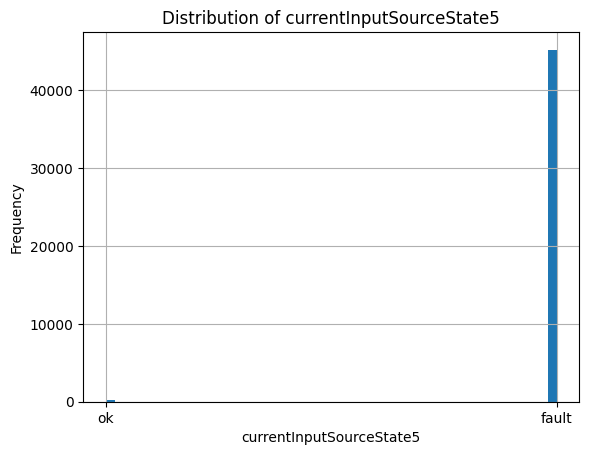

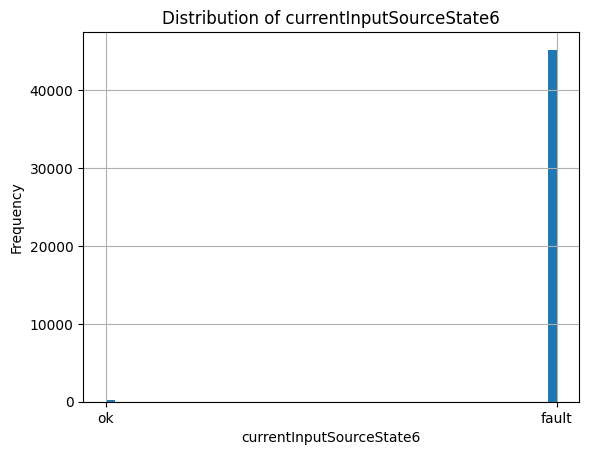

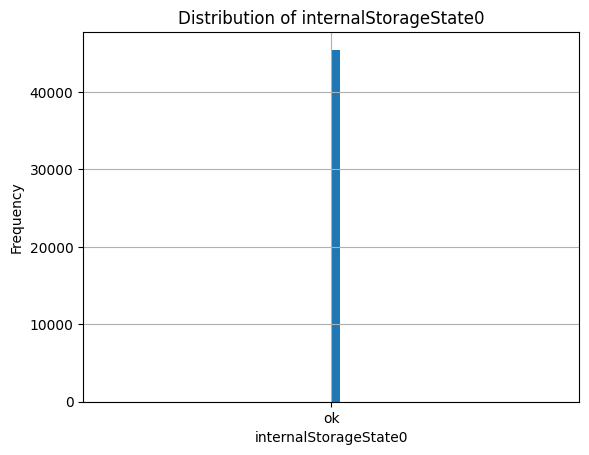

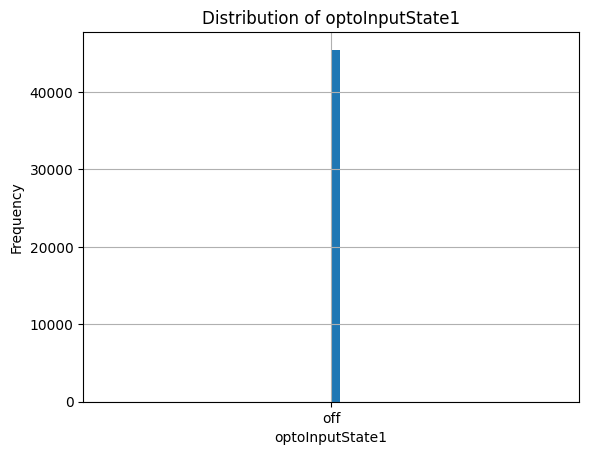

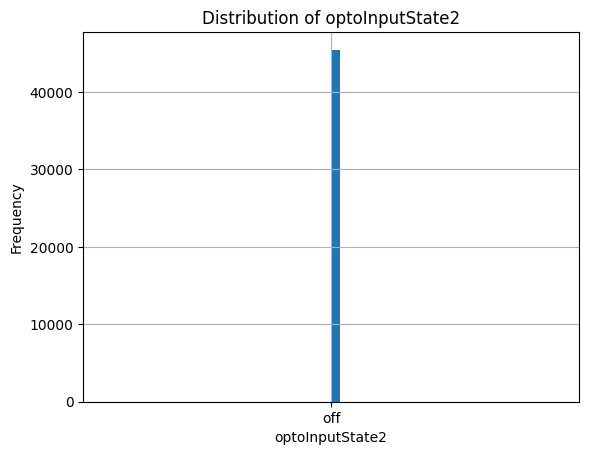

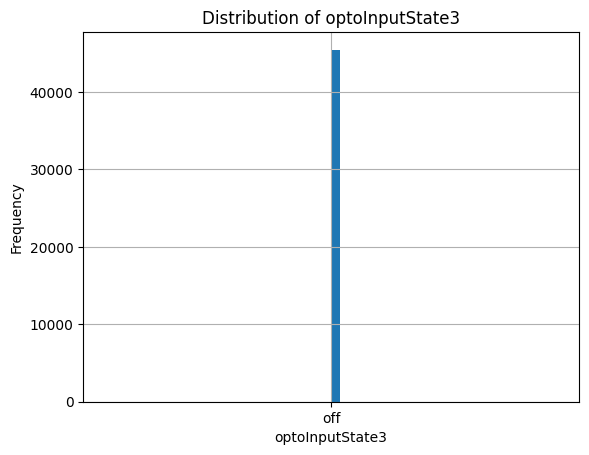

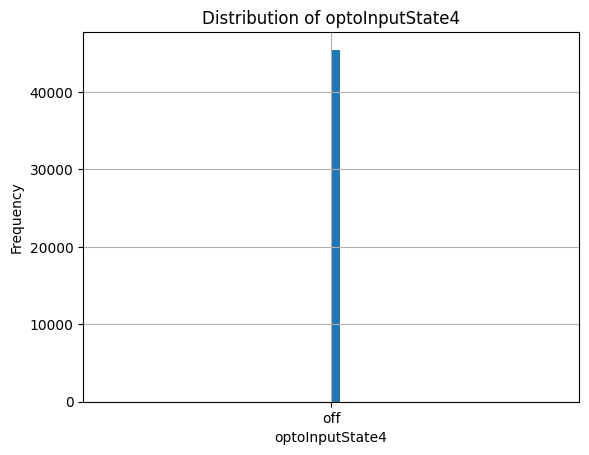

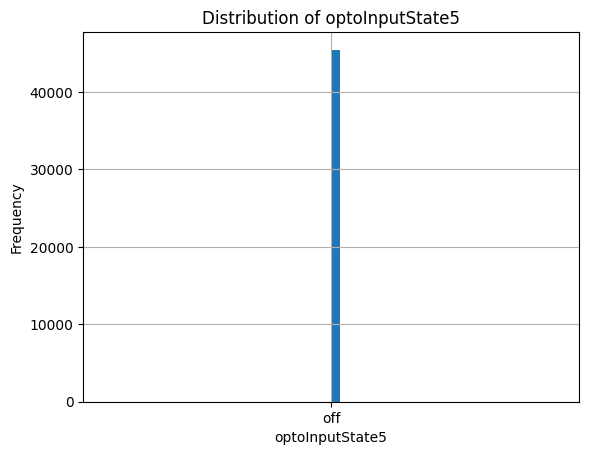

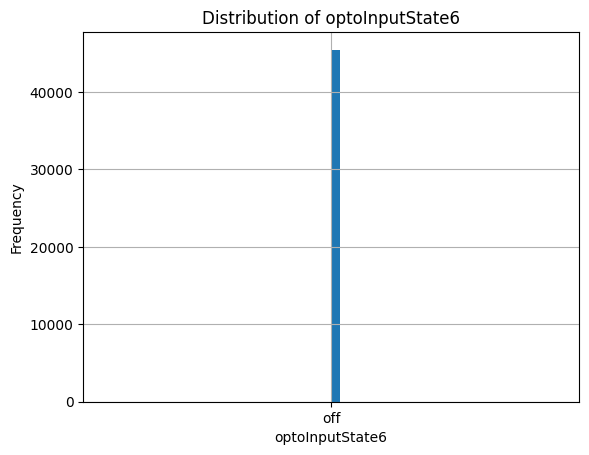

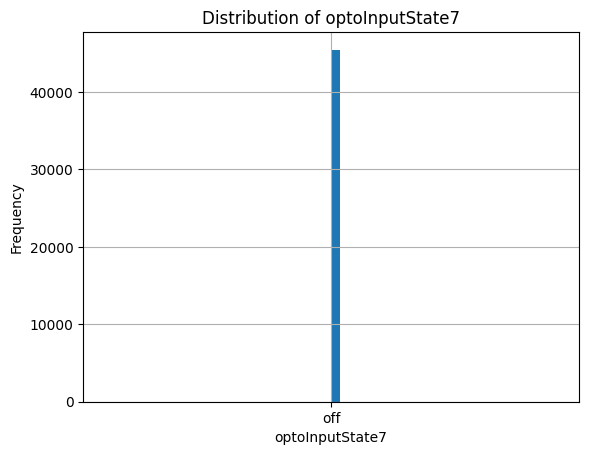

In [75]:
for col in states:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

 show the frequency of each state in each column

In [74]:
# Extract state columns
state_columns = [
    'agcState0', 'ceState0', 'symTimeState0', 'carrierState0', 'fecLockedState0', 'lockedState0',
    'tsSyncState1', 'tsSyncState2', 'tsSyncState3', 'udpInputDataState1', 'udpInputDataState2',
    'udpInputDataState3', 'udpInputDataState4', 'icecastInputDataState1', 'icecastInputDataState2',
    'icecastInputDataState3', 'icecastInputDataState4', 'currentInputSourceState1',
    'currentInputSourceState2', 'currentInputSourceState3', 'currentInputSourceState4',
    'currentInputSourceState5', 'currentInputSourceState6', 'internalStorageState0'
]

# Calculate the frequency of each state
state_frequencies = data[state_columns].apply(pd.Series.value_counts).fillna(0).astype(int)
state_frequencies_transposed = state_frequencies.T

# Display the state frequencies
state_frequencies_transposed.head()

fault     ok  undefined
agcState0          287  45185          0
ceState0           287  45185          0
symTimeState0      287  45185          0
carrierState0      287  45185          0
fecLockedState0    287  45185          0

identify the most common state for each state column

In [57]:
# Analysis of Common States
common_states = state_frequencies_transposed.idxmax(axis=1)
print("Most Common States:\n", common_states)

Most Common States:
 agcState0                          ok
ceState0                           ok
symTimeState0                      ok
carrierState0                      ok
fecLockedState0                    ok
lockedState0                       ok
tsSyncState1                       ok
tsSyncState2                    fault
tsSyncState3                    fault
udpInputDataState1          undefined
udpInputDataState2          undefined
udpInputDataState3          undefined
udpInputDataState4          undefined
icecastInputDataState1      undefined
icecastInputDataState2      undefined
icecastInputDataState3      undefined
icecastInputDataState4      undefined
currentInputSourceState1           ok
currentInputSourceState2           ok
currentInputSourceState3           ok
currentInputSourceState4           ok
currentInputSourceState5        fault
currentInputSourceState6        fault
internalStorageState0              ok
dtype: object


highlight the frequencies of states indicating faults

In [58]:
# Fault Analysis
fault_states = state_frequencies_transposed[state_frequencies_transposed.index.str.contains('fault')]
print("Fault States Frequencies:\n", fault_states)

Fault States Frequencies:
 Empty DataFrame
Columns: [fault, ok, undefined]
Index: []


In [59]:
# Temporal Analysis - Example for one state column
data['CreationDate'] = pd.to_datetime(data['CreationDate'])
time_series_analysis = data.set_index('CreationDate')['agcState0'].resample('D').apply(lambda x: x.value_counts().get('fault', 0))
print("Daily Faults in agcState0:\n", time_series_analysis)

Daily Faults in agcState0:
 CreationDate
2022-10-04 00:00:00+00:00    114
2022-10-05 00:00:00+00:00    109
2022-10-06 00:00:00+00:00     58
2022-10-07 00:00:00+00:00      0
2022-10-08 00:00:00+00:00      0
                            ... 
2024-02-09 00:00:00+00:00      0
2024-02-10 00:00:00+00:00      2
2024-02-11 00:00:00+00:00      0
2024-02-12 00:00:00+00:00      0
2024-02-13 00:00:00+00:00      0
Freq: D, Name: agcState0, Length: 498, dtype: int64


## Optical Inputs

In [76]:
optical_inputs

['optoInputNumber1',
 'optoInputNumber2',
 'optoInputNumber3',
 'optoInputNumber4',
 'optoInputNumber5',
 'optoInputNumber6',
 'optoInputNumber7']

In [77]:
# Get descriptive statistics for the optical_inputs columns
optical_inputs = data[optical_inputs].describe()
optical_inputs

optoInputNumber1          optoInputNumber2  \
count                      45472                     45472   
unique                         1                         1   
top     Optical coupler number 1  Optical coupler number 2   
freq                       45472                     45472   

                optoInputNumber3          optoInputNumber4  \
count                      45472                     45472   
unique                         1                         1   
top     Optical coupler number 3  Optical coupler number 4   
freq                       45472                     45472   

                optoInputNumber5          optoInputNumber6  \
count                      45472                     45472   
unique                         1                         1   
top     Optical coupler number 5  Optical coupler number 6   
freq                       45472                     45472   

                optoInputNumber7  
count                      45472  
unique                         1  
top     Optical coupler number 7  
freq                       45472

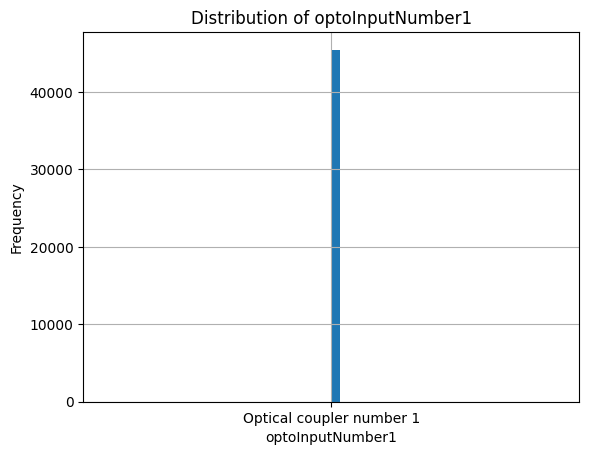

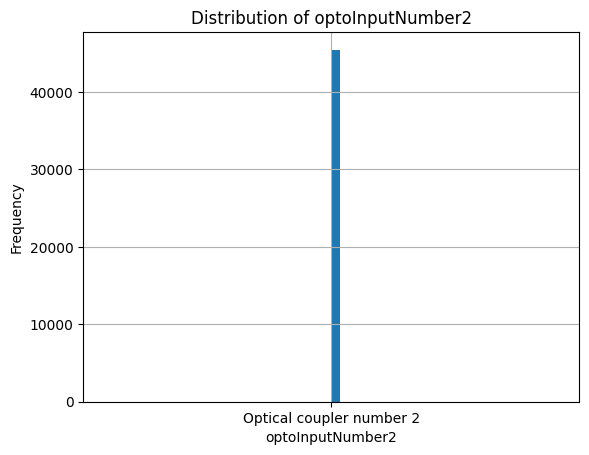

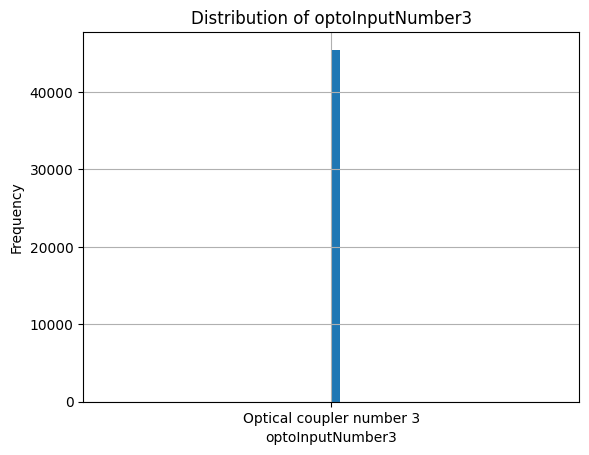

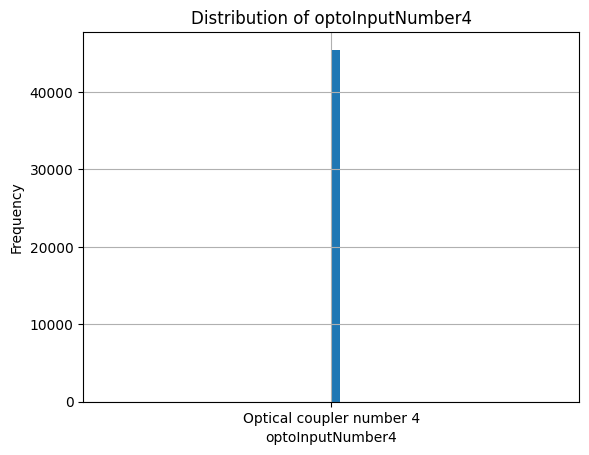

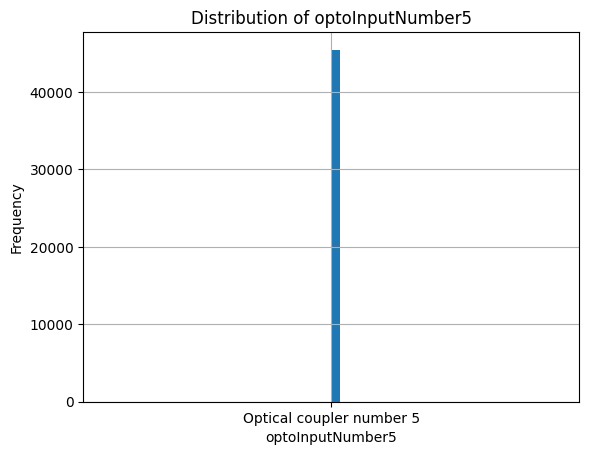

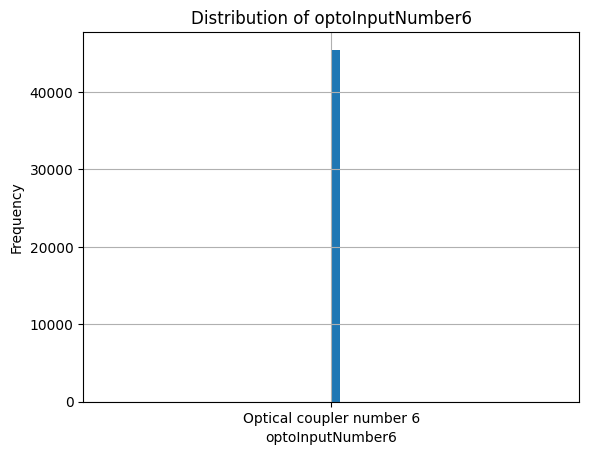

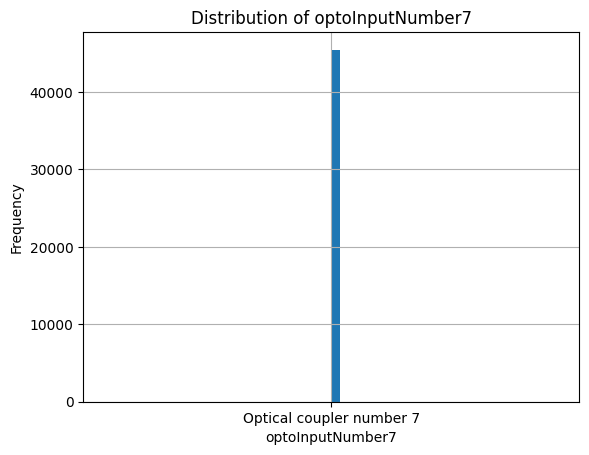

In [78]:
for col in optical_inputs:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## tunerAlarm

In [90]:
tunerAlarm

['tunerAlarmType1',
 'tunerAlarmType2',
 'tunerAlarmType3',
 'tunerAlarmActive1',
 'tunerAlarmActive2',
 'tunerAlarmActive3']

In [91]:
tunerAlarm = ['tunerAlarmType1','tunerAlarmType2','tunerAlarmType3','tunerAlarmActive2','tunerAlarmActive3']

In [92]:
# Get descriptive statistics for the states columns
tunerAlarm = data[tunerAlarm].describe()
tunerAlarm

tunerAlarmType1 tunerAlarmType2 tunerAlarmType3 tunerAlarmActive2  \
count            45472           45472           45472             45472   
unique               1               1               1                 1   
top       rfPowerAlarm         cnAlarm        berAlarm             False   
freq             45472           45472           45472             45472   

       tunerAlarmActive3  
count              45472  
unique                 1  
top                False  
freq               45472

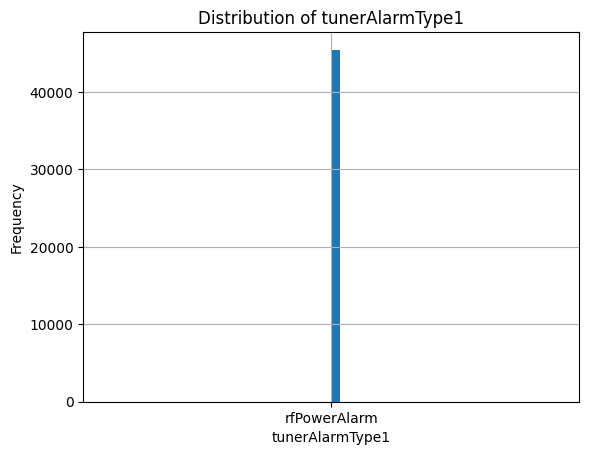

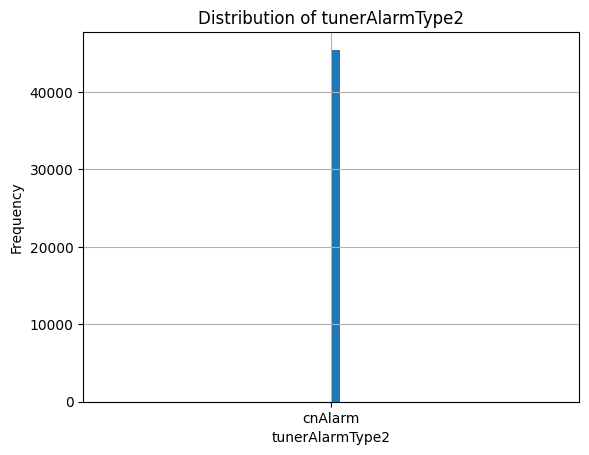

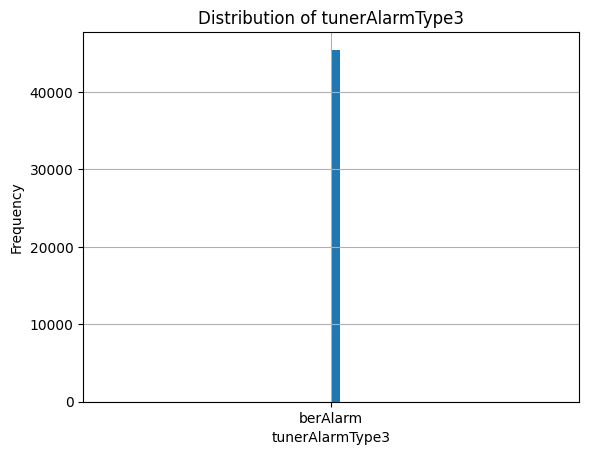

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


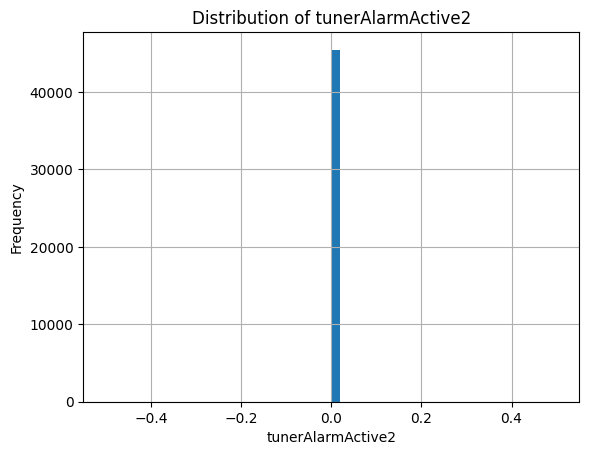

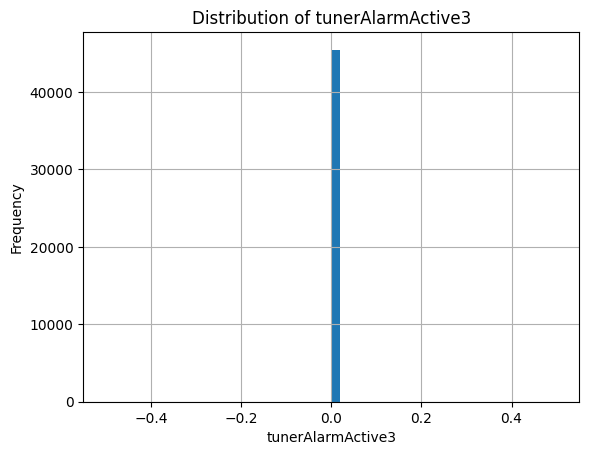

In [93]:
for col in tunerAlarm:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## ts

In [94]:
ts

['tsSyncAlarmActive1',
 'tsSyncAlarmActive2',
 'tsSyncAlarmActive3',
 'tsIpSync0',
 'tsIpPacketPerIpPacket0',
 'tsIpBufferlevel10',
 'tsIpBufferlevel20',
 'tsIpBufferlevel30',
 'tsIpBufferReset0',
 'tsIpPacketDropped0',
 'tsIpPacketReordered0',
 'tsIpPacketRestored0',
 'tsIpPacketUnrecoverable0',
 'tsIpFecL0',
 'tsIpFecD0',
 'tsIpPacketDuplicate0',
 'tsIpPER0',
 'tsIpPLR0',
 'tsIpErroneousPacketrate0',
 'tsIpBackupPER0',
 'tsIpBackupPLR0',
 'tsIpBackupErroneousPacketrate0',
 'tsIpCombinedPER0',
 'rtpUdpInputDataPackets1',
 'rtpUdpInputDataPackets2',
 'rtpUdpInputDataPackets3',
 'rtpUdpInputDataPackets4',
 'tsSyncType1',
 'tsSyncType2',
 'tsSyncType3']

In [95]:
# Get descriptive statistics for the ts columns
ts = data[ts].describe()
ts

tsIpPacketPerIpPacket0  tsIpBufferlevel10  tsIpBufferlevel20  \
count                 45472.0            45472.0            45472.0   
mean                      1.0                0.0                0.0   
std                       0.0                0.0                0.0   
min                       1.0                0.0                0.0   
25%                       1.0                0.0                0.0   
50%                       1.0                0.0                0.0   
75%                       1.0                0.0                0.0   
max                       1.0                0.0                0.0   

       tsIpBufferlevel30  tsIpBufferReset0  tsIpPacketDropped0  \
count            45472.0           45472.0             45472.0   
mean                 0.0               0.0                 0.0   
std                  0.0               0.0                 0.0   
min                  0.0               0.0                 0.0   
25%                  0.0               0.0                 0.0   
50%                  0.0               0.0                 0.0   
75%                  0.0               0.0                 0.0   
max                  0.0               0.0                 0.0   

       tsIpPacketReordered0  tsIpPacketRestored0  tsIpPacketUnrecoverable0  \
count               45472.0              45472.0                   45472.0   
mean                    0.0                  0.0                       0.0   
std                     0.0                  0.0                       0.0   
min                     0.0                  0.0                       0.0   
25%                     0.0                  0.0                       0.0   
50%                     0.0                  0.0                       0.0   
75%                     0.0                  0.0                       0.0   
max                     0.0                  0.0                       0.0   

       tsIpFecL0  ...      tsIpPLR0  tsIpErroneousPacketrate0  tsIpBackupPER0  \
count    45472.0  ...  4.547200e+04              4.547200e+04    4.547200e+04   
mean         0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   
std          0.0  ...  3.552753e-15              3.552753e-15    3.552753e-15   
min          0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   
25%          0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   
50%          0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   
75%          0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   
max          0.0  ...  1.414500e+01              1.414500e+01    1.414500e+01   

       tsIpBackupPLR0  tsIpBackupErroneousPacketrate0  tsIpCombinedPER0  \
count    4.547200e+04                    4.547200e+04      4.547200e+04   
mean     1.414500e+01                    1.414500e+01      1.414500e+01   
std      3.552753e-15                    3.552753e-15      3.552753e-15   
min      1.414500e+01                    1.414500e+01      1.414500e+01   
25%      1.414500e+01                    1.414500e+01      1.414500e+01   
50%      1.414500e+01                    1.414500e+01      1.414500e+01   
75%      1.414500e+01                    1.414500e+01      1.414500e+01   
max      1.414500e+01                    1.414500e+01      1.414500e+01   

       rtpUdpInputDataPackets1  rtpUdpInputDataPackets2  \
count                  45472.0                  45472.0   
mean                       0.0                      0.0   
std                        0.0                      0.0   
min                        0.0                      0.0   
25%                        0.0                      0.0   
50%                        0.0                      0.0   
75%                        0.0                      0.0   
max                        0.0                      0.0   

       rtpUdpInputDataPackets3  rtpUdpInputDataPackets4  
count                  45472.0                  45472.0  
mean           

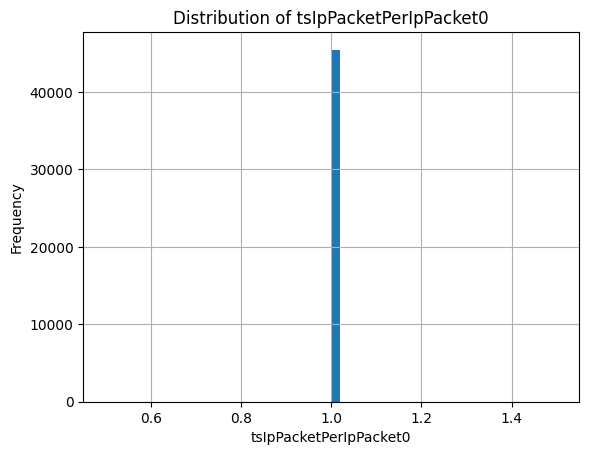

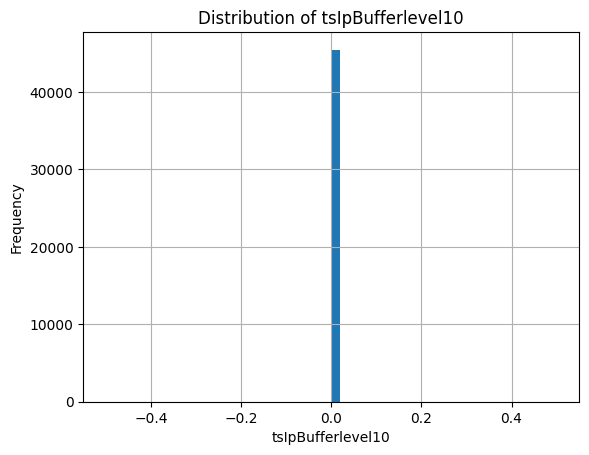

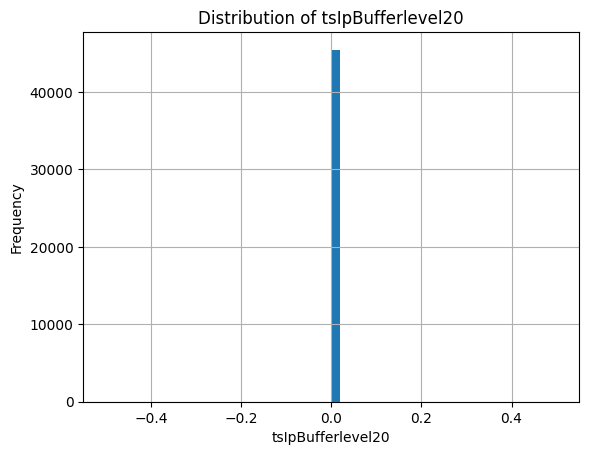

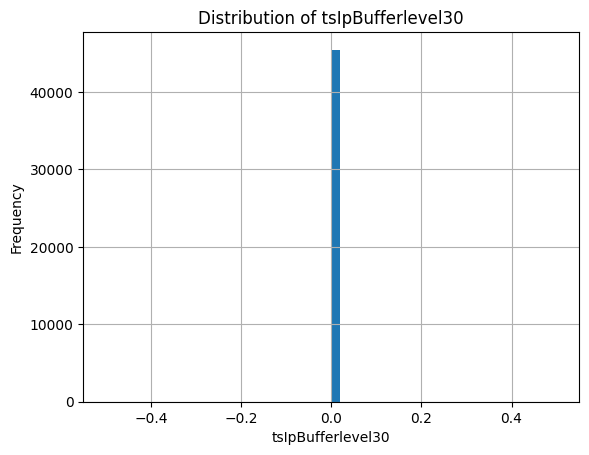

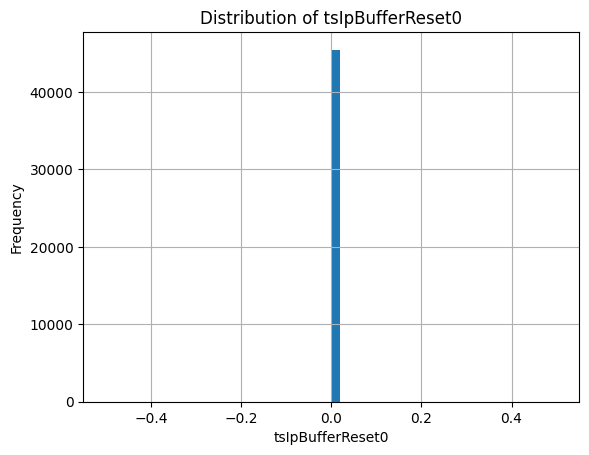

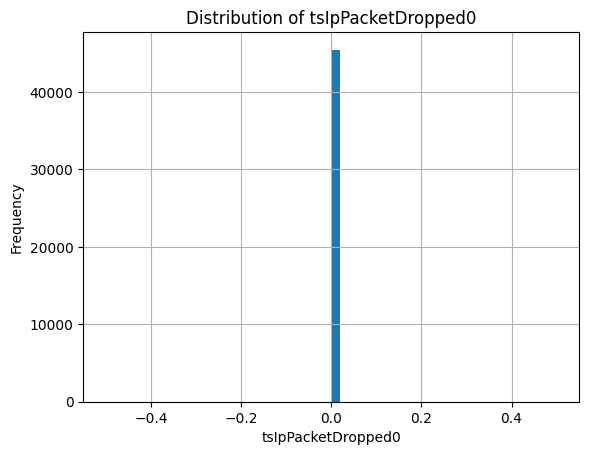

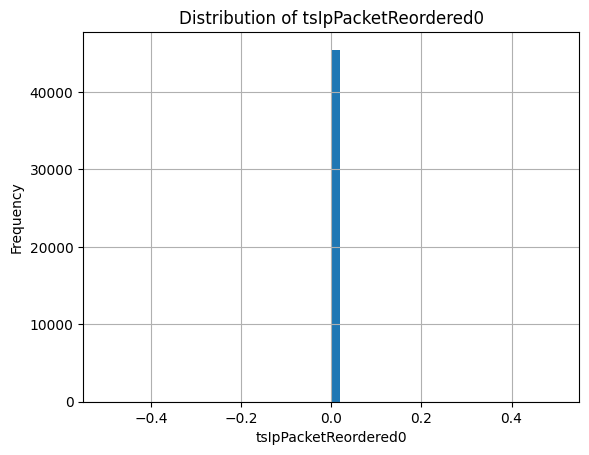

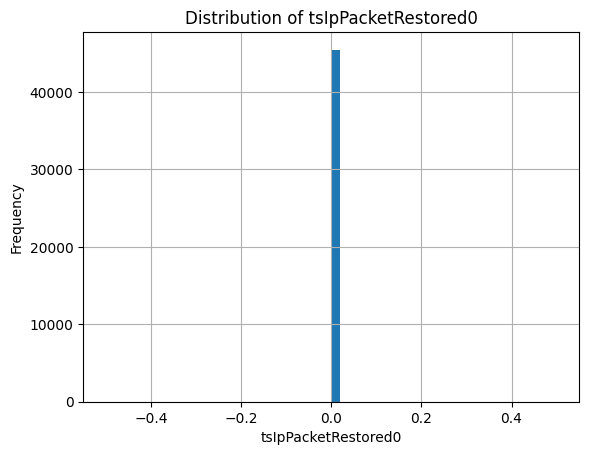

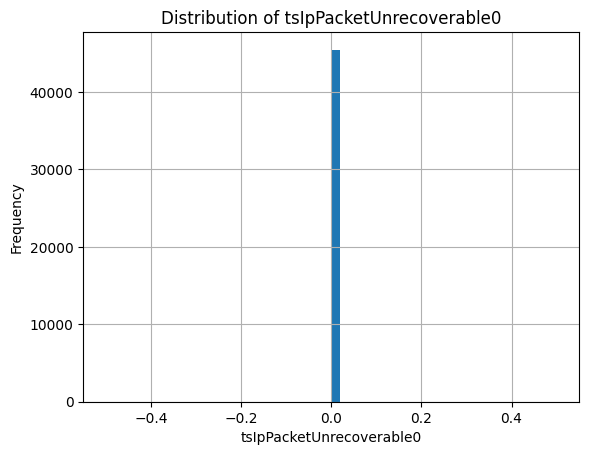

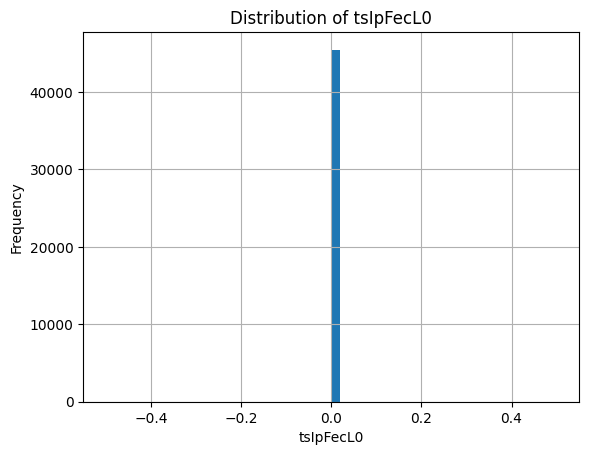

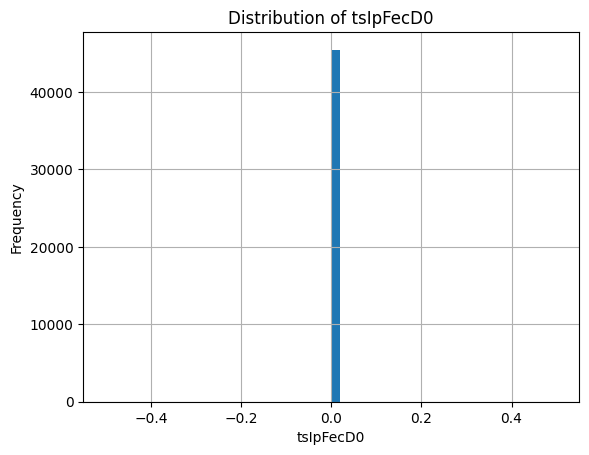

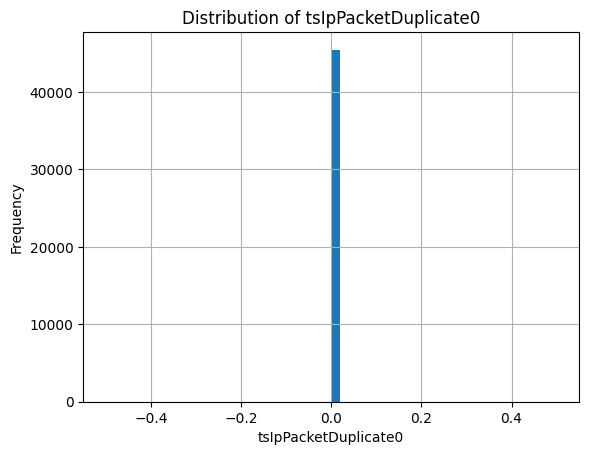

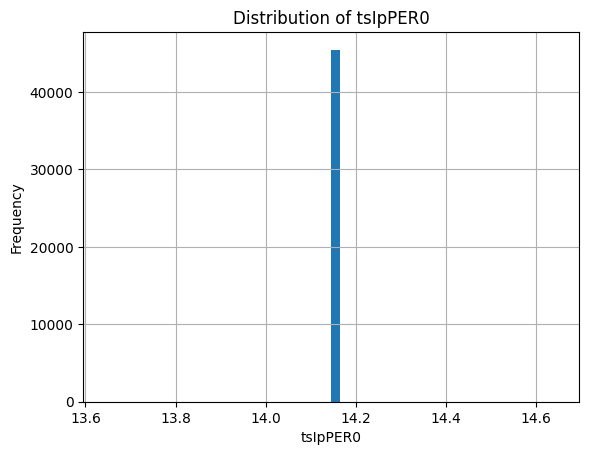

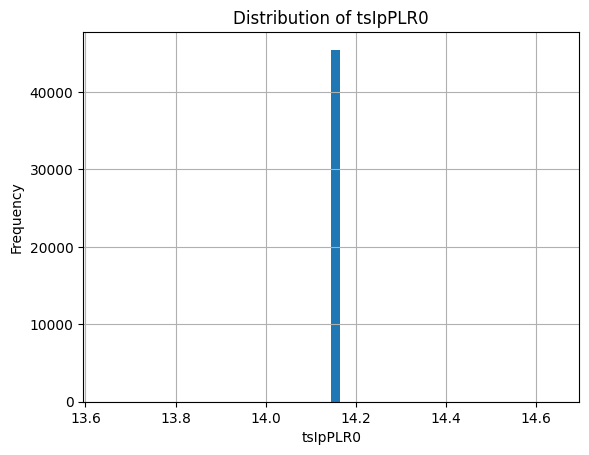

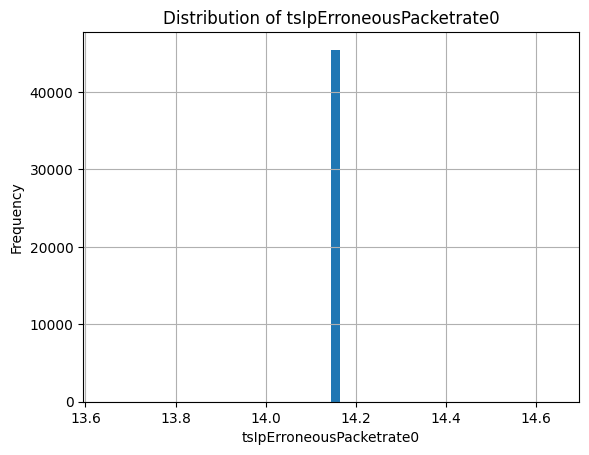

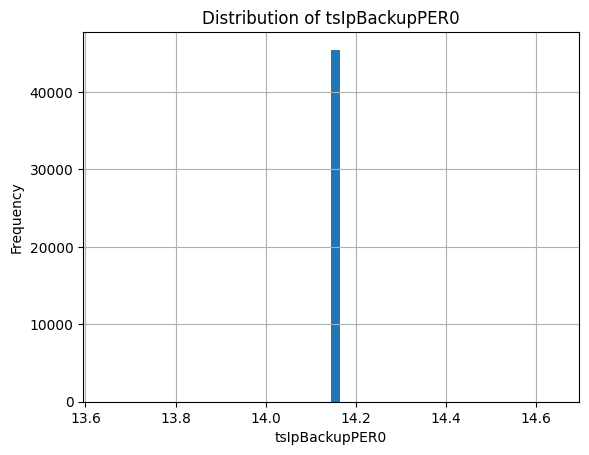

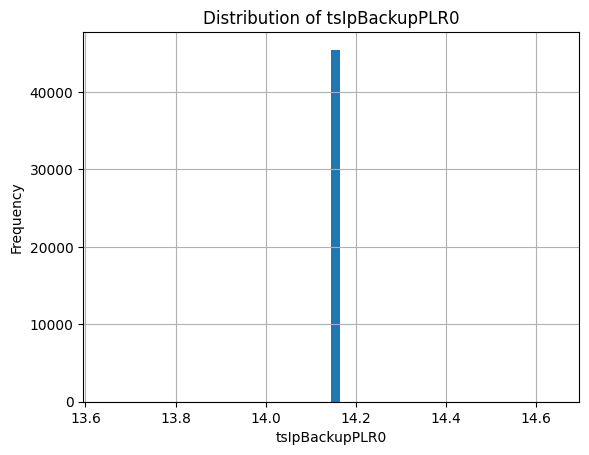

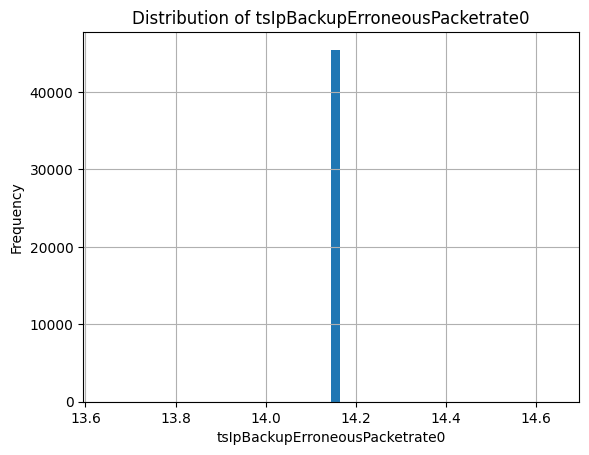

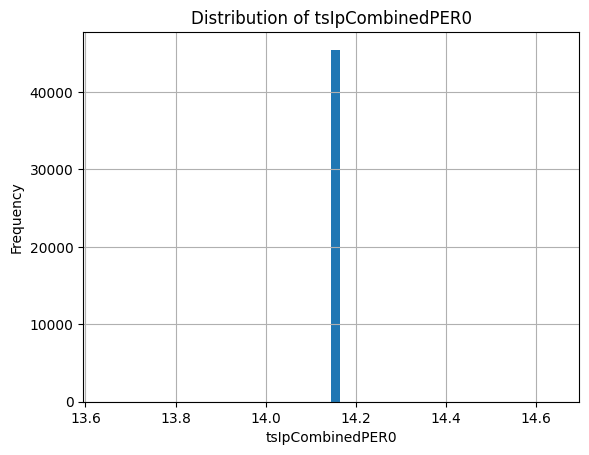

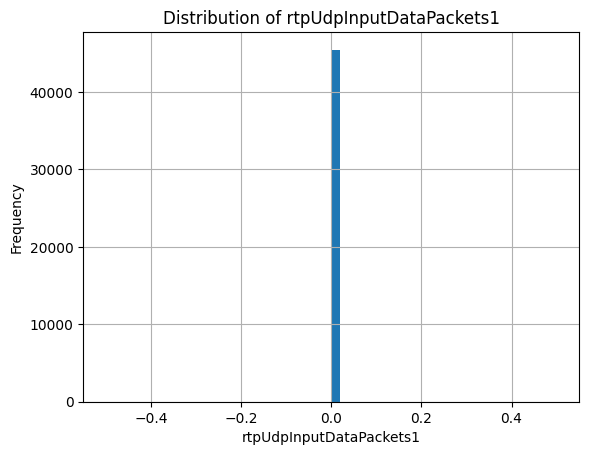

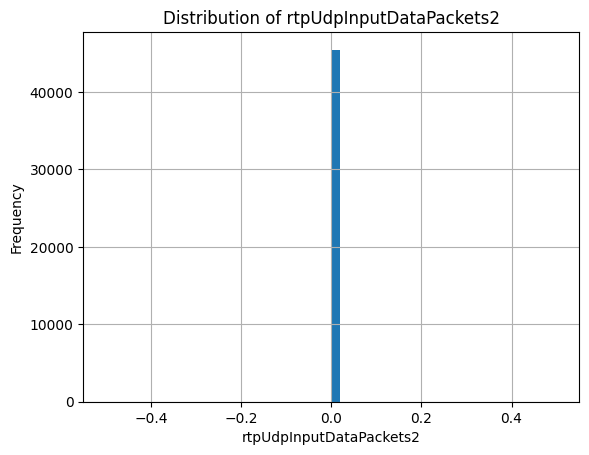

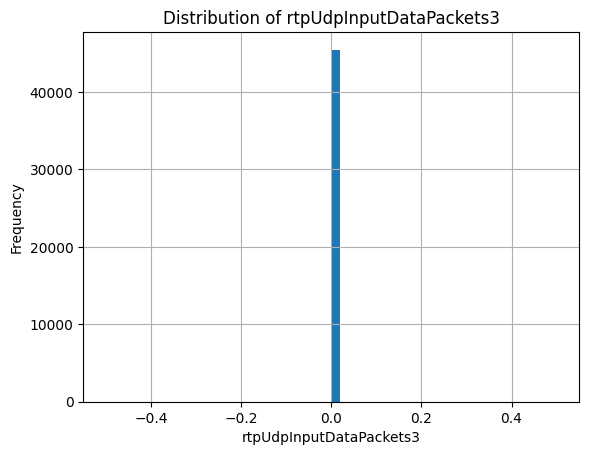

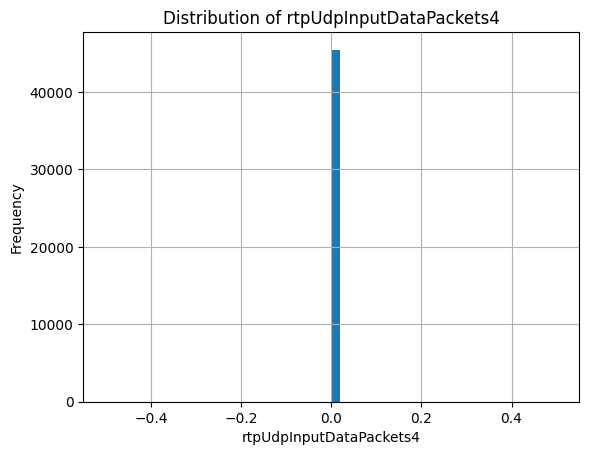

In [96]:
import matplotlib.pyplot as plt

for col in ts:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## udpInputDataAlarmActive

In [97]:
udpInputDataAlarmActive

['udpInputDataAlarmActive1',
 'udpInputDataAlarmActive2',
 'udpInputDataAlarmActive3',
 'udpInputDataAlarmActive4']

In [98]:
# Get descriptive statistics for the states columns
udpInputDataAlarmActive = data[udpInputDataAlarmActive].describe()
udpInputDataAlarmActive

udpInputDataAlarmActive1 udpInputDataAlarmActive2  \
count                     45472                    45472   
unique                        1                        1   
top                       False                    False   
freq                      45472                    45472   

       udpInputDataAlarmActive3 udpInputDataAlarmActive4  
count                     45472                    45472  
unique                        1                        1  
top                       False                    False  
freq                      45472                    45472

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


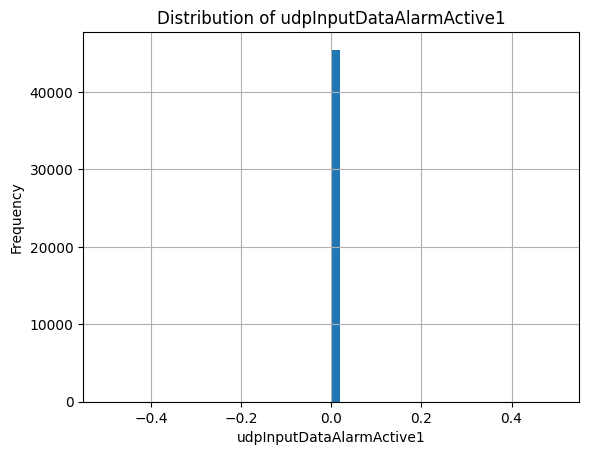

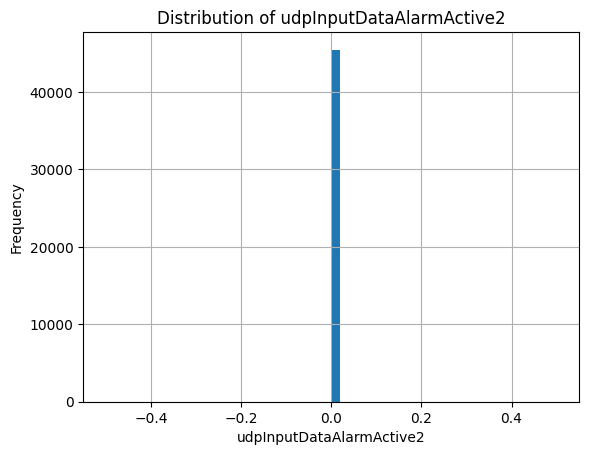

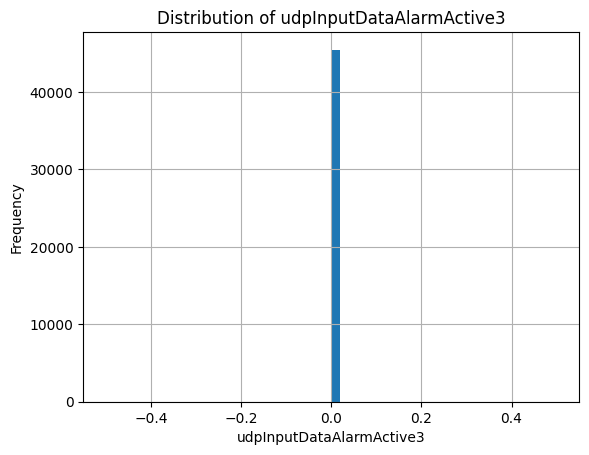

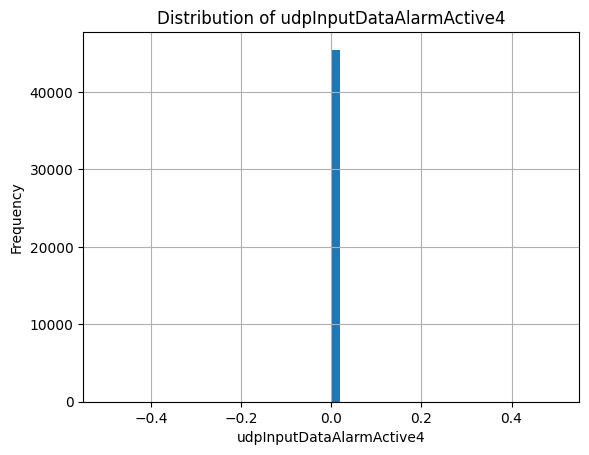

In [99]:
import matplotlib.pyplot as plt

for col in udpInputDataAlarmActive:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## icecastInputDataAlarmActive

In [100]:
icecastInputDataAlarmActive

['icecastInputDataAlarmActive1',
 'icecastInputDataAlarmActive2',
 'icecastInputDataAlarmActive3',
 'icecastInputDataAlarmActive4']

In [101]:
# Get descriptive statistics for the states columns
icecastInputDataAlarmActive = data[icecastInputDataAlarmActive].describe()
icecastInputDataAlarmActive

icecastInputDataAlarmActive1 icecastInputDataAlarmActive2  \
count                         45472                        45472   
unique                            1                            1   
top                           False                        False   
freq                          45472                        45472   

       icecastInputDataAlarmActive3 icecastInputDataAlarmActive4  
count                         45472                        45472  
unique                            1                            1  
top                           False                        False  
freq                          45472                        45472

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


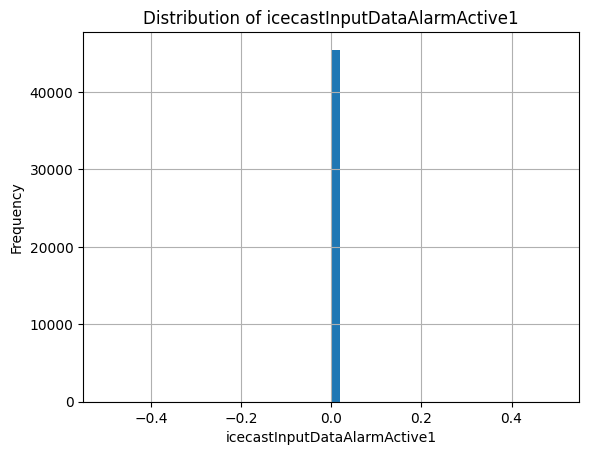

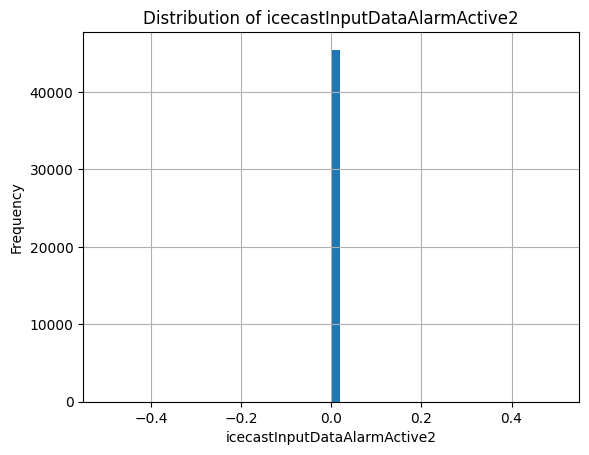

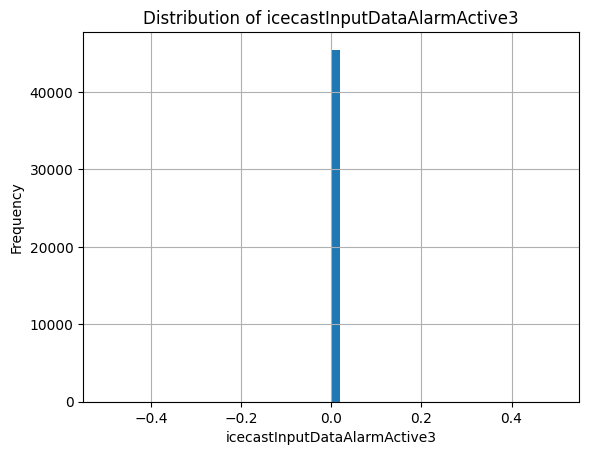

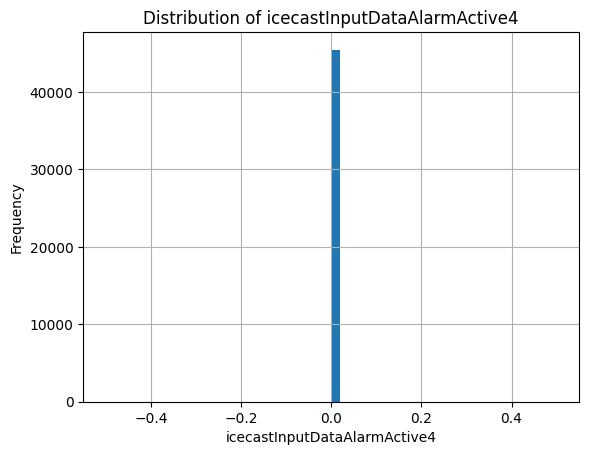

In [102]:
import matplotlib.pyplot as plt

for col in icecastInputDataAlarmActive:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## rtpUdpInputData


In [103]:
rtpUdpInputData

['rtpUdpInputDataRtpDataRate1',
 'rtpUdpInputDataRtpDataRate2',
 'rtpUdpInputDataRtpDataRate3',
 'rtpUdpInputDataRtpDataRate4',
 'rtpUdpInputDataIpRawDataRate1',
 'rtpUdpInputDataIpRawDataRate2',
 'rtpUdpInputDataIpRawDataRate3',
 'rtpUdpInputDataIpRawDataRate4',
 'rtpUdpInputDataRtpPacketloss1',
 'rtpUdpInputDataRtpPacketloss2',
 'rtpUdpInputDataRtpPacketloss3',
 'rtpUdpInputDataRtpPacketloss4']

In [104]:
# Get descriptive statistics for the states columns
rtpUdpInputData = data[rtpUdpInputData].describe()
rtpUdpInputData

rtpUdpInputDataRtpDataRate1  rtpUdpInputDataRtpDataRate2  \
count                      45472.0                      45472.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       rtpUdpInputDataRtpDataRate3  rtpUdpInputDataRtpDataRate4  \
count                      45472.0                      45472.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       rtpUdpInputDataIpRawDataRate1  rtpUdpInputDataIpRawDataRate2  \
count                        45472.0                        45472.0   
mean                             0.0                            0.0   
std                              0.0                            0.0   
min                              0.0                            0.0   
25%                              0.0                            0.0   
50%                              0.0                            0.0   
75%                              0.0                            0.0   
max                              0.0                            0.0   

       rtpUdpInputDataIpRawDataRate3  rtpUdpInputDataIpRawDataRate4  \
count                        45472.0                        45472.0   
mean                             0.0                            0.0   
std                              0.0                            0.0   
min                              0.0                            0.0   
25%                              0.0                            0.0   
50%                              0.0                            0.0   
75%                              0.0                            0.0   
max                              0.0                            0.0   

       rtpUdpInputDataRtpPacketloss1  rtpUdpInputDataRtpPacketloss2  \
count                        45472.0                        45472.0   
mean                             0.0                            0.0   
std                              0.0                            0.0   
min                              0.0                            0.0   
25%                              0.0                            0.0   
50%                              0.0                            0.0   
75%                              0.0                            0.0   
max                              0.0                            0.0   

       rtpUdpInputDataRtpPacketloss3  rtpUdpInputDataRtpPacketloss4  
count                        45472.0                        45472.0  
mean                             0.0                            0.0  
std                              0.0                            0.0  
min                              0.0                            0.0  
25%                              0.0                            0.0  
50%                              0.0                            0.0  
75%                              0.0                            0.0  
max                              0.0                            0.0

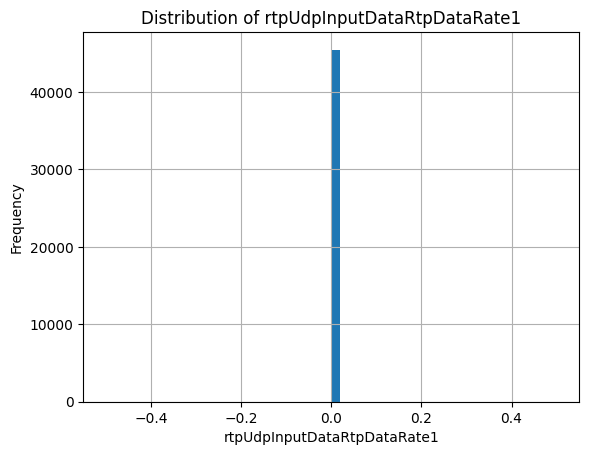

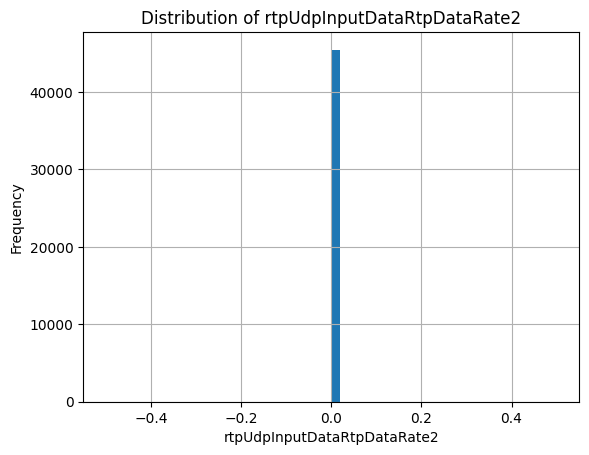

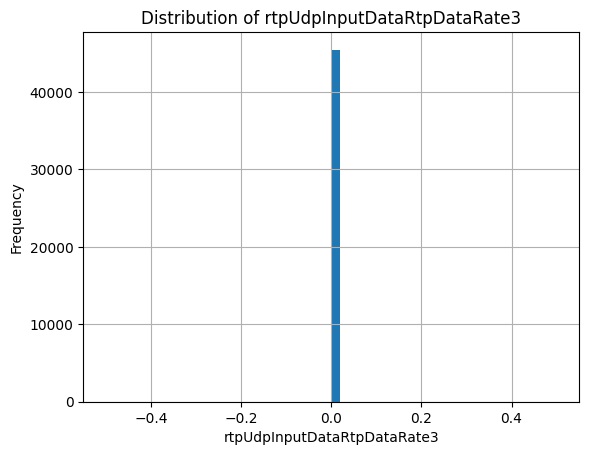

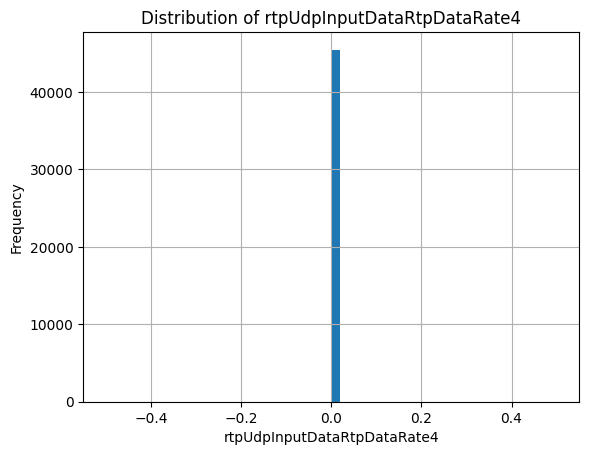

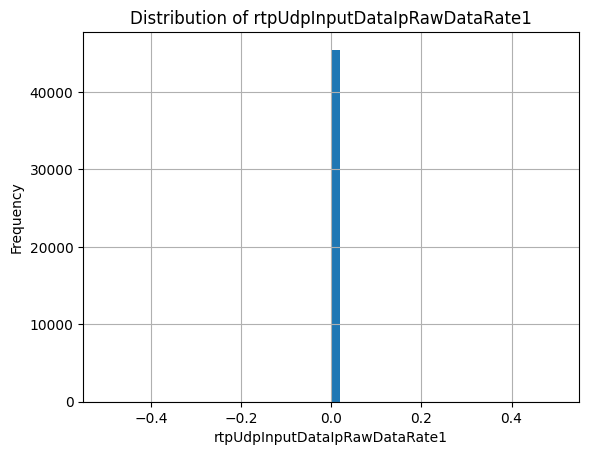

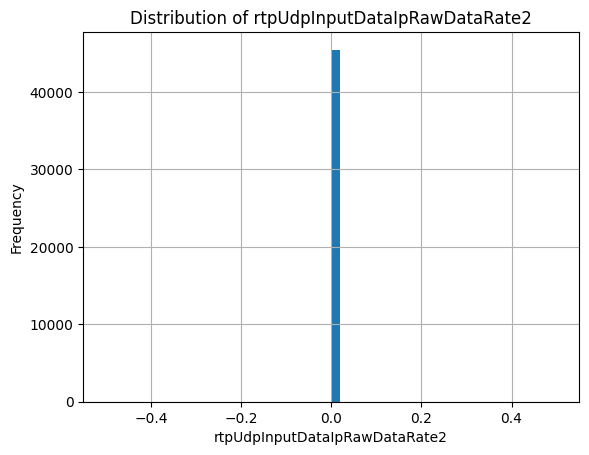

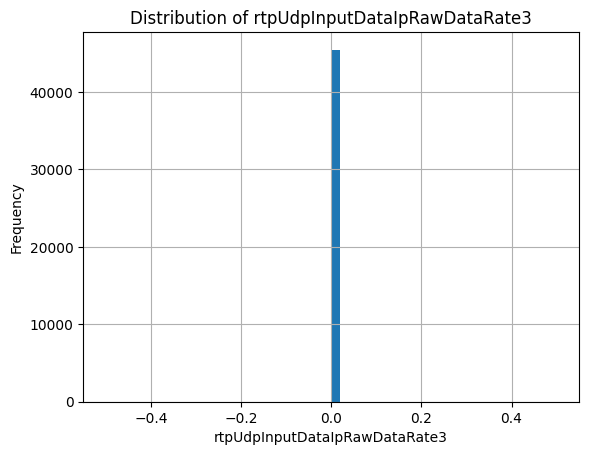

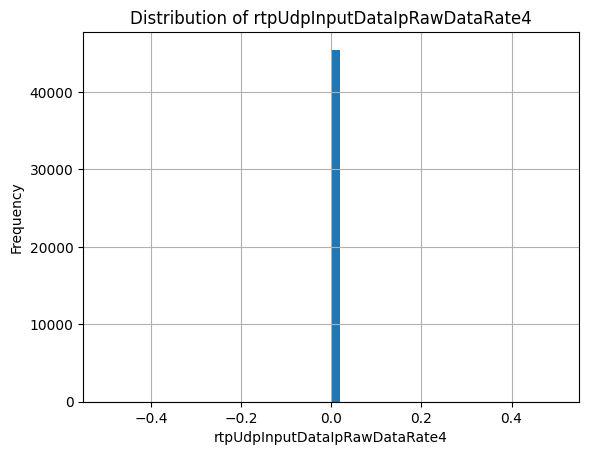

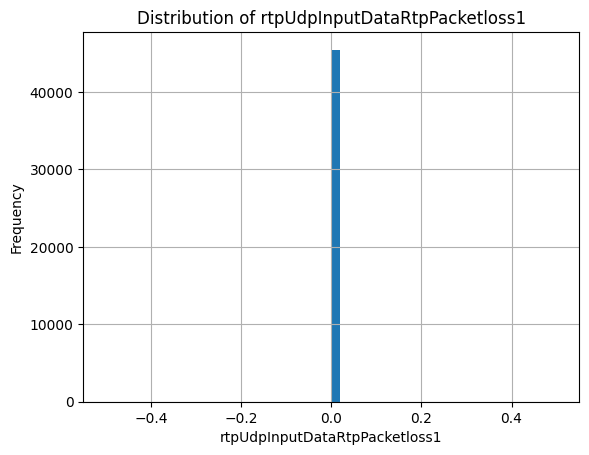

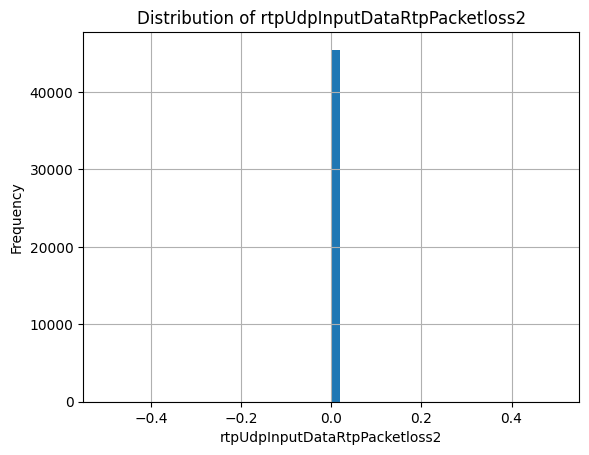

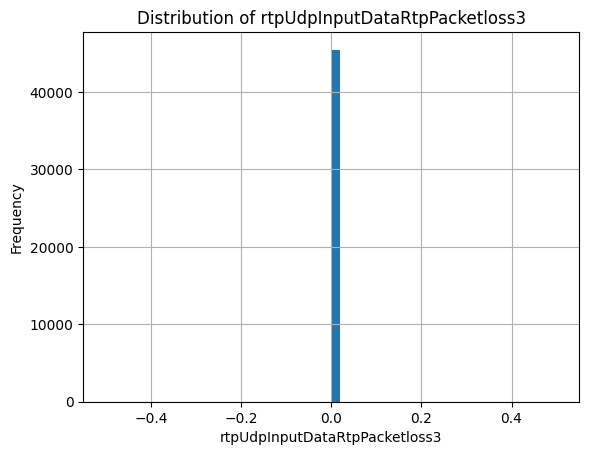

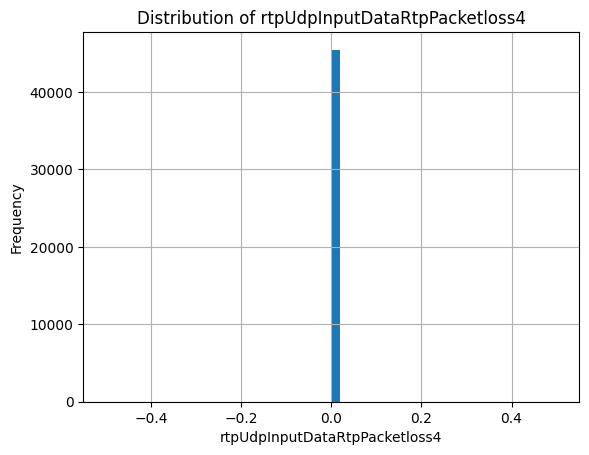

In [105]:
import matplotlib.pyplot as plt

for col in rtpUdpInputData:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## audio

In [161]:
audio

['audioStatus1',
 'audioStatus2',
 'audioStatus3',
 'audioStatus4',
 'audioVersion1',
 'audioVersion2',
 'audioVersion3',
 'audioVersion4',
 'audioLayer1',
 'audioLayer2',
 'audioLayer3',
 'audioLayer4',
 'audioBitRate1',
 'audioBitRate2',
 'audioBitRate3',
 'audioBitRate4',
 'audioSampleRate1',
 'audioSampleRate2',
 'audioSampleRate3',
 'audioSampleRate4',
 'audioAlarmActive1',
 'audioAlarmActive2',
 'audioAlarmActive3',
 'audioAlarmActive4',
 'audioLevel1',
 'audioLevel2',
 'audioLevel3',
 'audioLevel4',
 'audioLevelAlarmActive1',
 'audioLevelAlarmActive2',
 'audioLevelAlarmActive3',
 'audioLevelAlarmActive4',
 'audioNoDataAvailabe1',
 'audioNoDataAvailabe2',
 'audioNoDataAvailabe3',
 'audioNoDataAvailabe4',
 'audioDecoderResets1',
 'audioDecoderResets2',
 'audioDecoderResets3',
 'audioDecoderResets4',
 'audioBufferlevel1',
 'audioBufferlevel2',
 'audioBufferlevel3',
 'audioBufferlevel4',
 'audioPLLlevel1',
 'audioPLLlevel2',
 'audioPLLlevel3',
 'audioPLLlevel4',
 'audioTsError1',
 '

In [165]:
audio = [
 'audioLevel1',
 'audioLevel2',
 'audioLevel3',
 'audioLevel4',
 'audioDecoderResets1',
 'audioDecoderResets2',
 'audioDecoderResets3',
 'audioDecoderResets4',
 'audioBufferlevel1',
 'audioBufferlevel2',
 'audioBufferlevel3',
 'audioBufferlevel4',
 'audioTsError1',
 'audioTsError2',
 'audioTsError3',
 'audioTsError4',
]

In [166]:
# Get descriptive statistics for the states columns
audio = data[audio].describe()
audio

audioLevel1   audioLevel2   audioLevel3   audioLevel4  \
count  45472.000000  45472.000000  45472.000000  45472.000000   
mean     -11.496745    -10.551249    -12.893284    -21.801810   
std       10.477809      9.708341     11.227924     12.821585   
min      -95.900000    -95.900000    -95.900000    -95.900000   
25%      -11.900000    -11.300000    -13.400000    -23.700000   
50%       -8.900000     -8.450000    -10.100000    -18.300000   
75%       -6.700000     -6.300000     -7.700000    -14.400000   
max        0.000000     -2.400000     -2.500000     -3.400000   

       audioDecoderResets1  audioDecoderResets2  audioDecoderResets3  \
count         45472.000000         45472.000000         45472.000000   
mean           1024.483023           956.673205          1379.791432   
std             697.903214           649.127667           966.491912   
min               4.000000             5.000000             5.000000   
25%             377.000000           355.000000           500.000000   
50%            1057.000000           986.000000          1402.000000   
75%            1582.000000          1473.000000          2148.000000   
max            2499.000000          2318.000000          3470.000000   

       audioDecoderResets4  audioBufferlevel1  audioBufferlevel2  \
count         45472.000000       45472.000000       45472.000000   
mean            803.375330           3.173909           3.165508   
std             533.608895           0.895532           0.897319   
min               5.000000           0.000000           0.000000   
25%             298.000000           3.000000           3.000000   
50%             828.000000           3.000000           3.000000   
75%            1242.000000           4.000000           4.000000   
max            1886.000000           5.000000           5.000000   

       audioBufferlevel3  audioBufferlevel4  audioTsError1  audioTsError2  \
count       45472.000000       45472.000000   45472.000000   45472.000000   
mean            3.178066           3.171688     110.652116     112.057970   
std             0.891008           0.893564     105.246316     105.735743   
min             0.000000           0.000000       0.000000       0.000000   
25%             3.000000           3.000000      13.000000      14.000000   
50%             3.000000           3.000000      83.000000      88.000000   
75%             4.000000           4.000000     192.000000     193.000000   
max             5.000000           5.000000    1121.000000    1113.000000   

       audioTsError3  audioTsError4  
count   45472.000000   45472.000000  
mean      112.608242     111.348192  
std       106.214099     106.316715  
min         0.000000       0.000000  
25%        14.000000      13.000000  
50%        88.000000      83.000000  
75%       194.000000     194.000000  
max      1115.000000    1114.000000

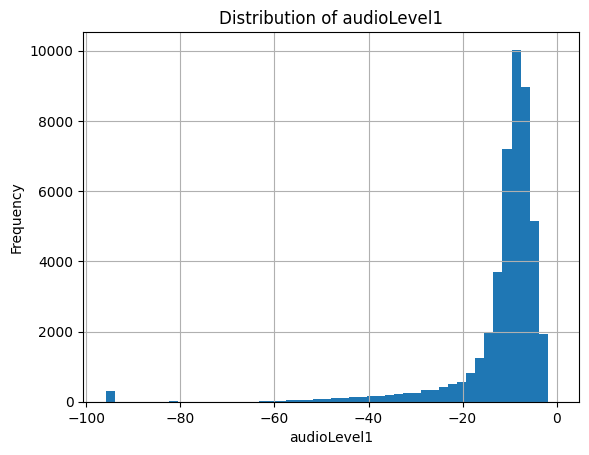

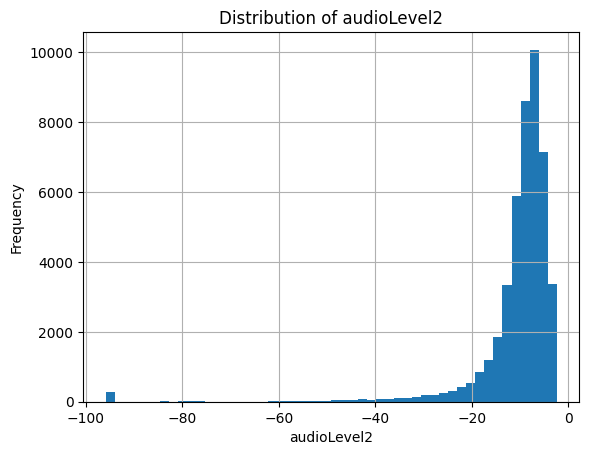

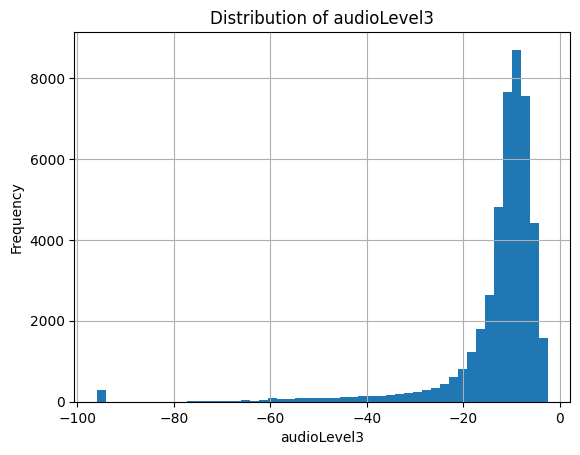

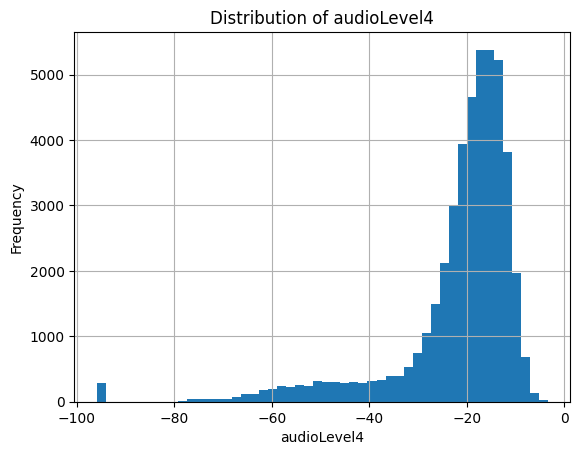

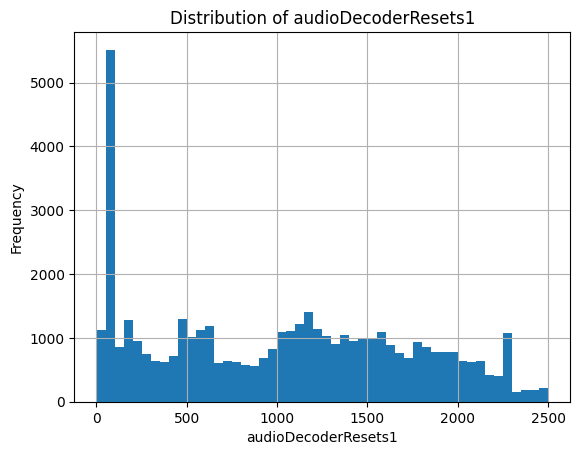

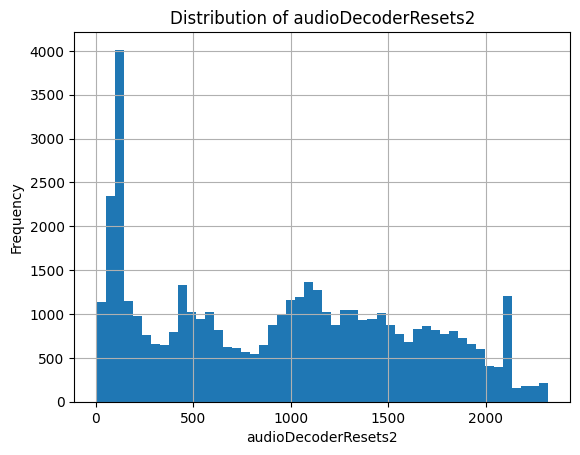

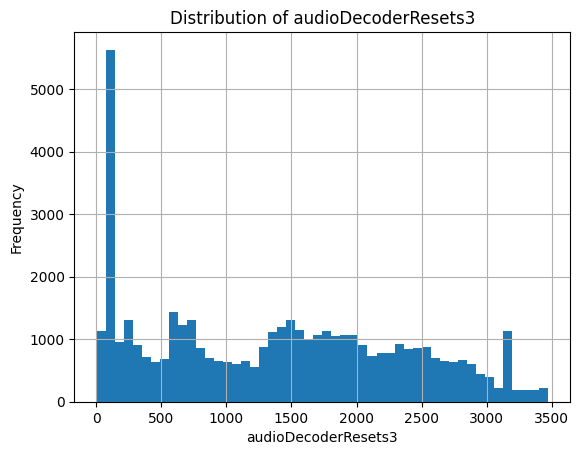

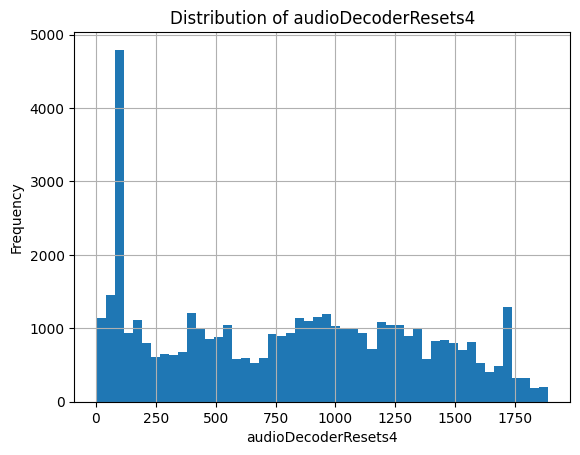

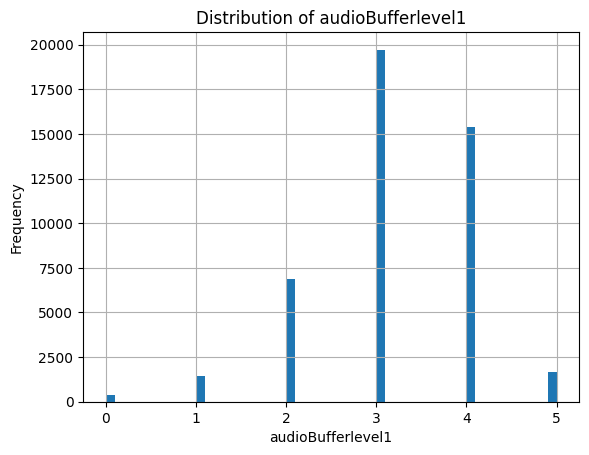

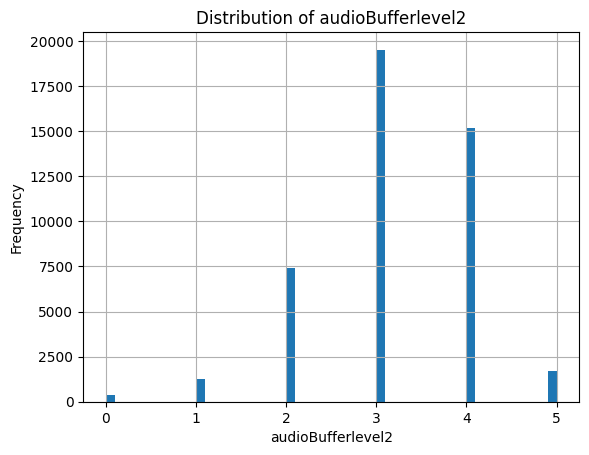

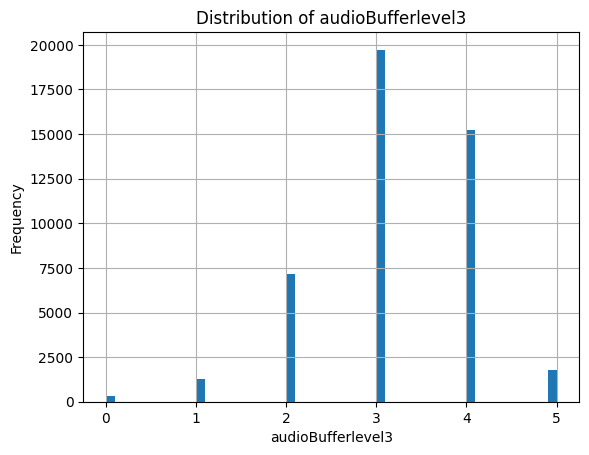

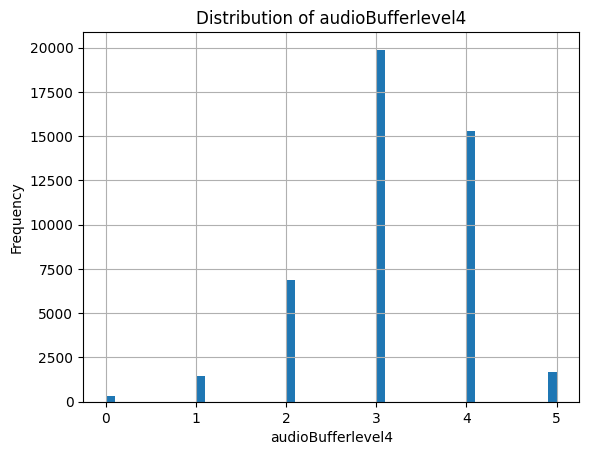

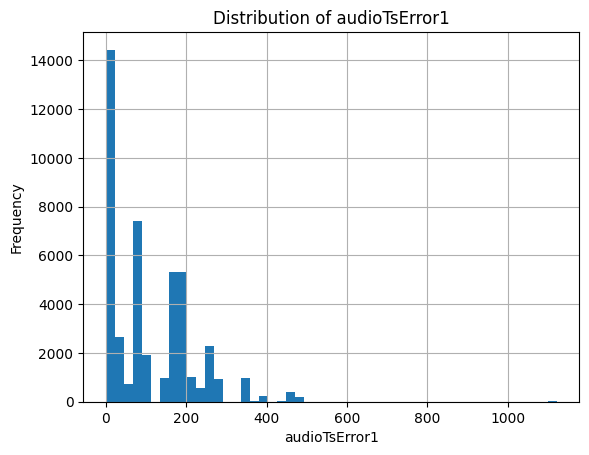

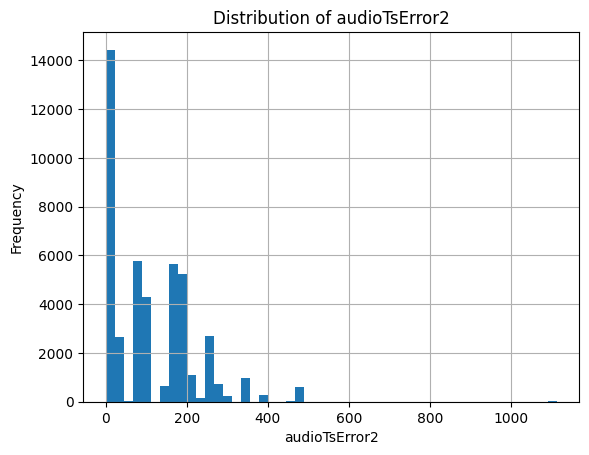

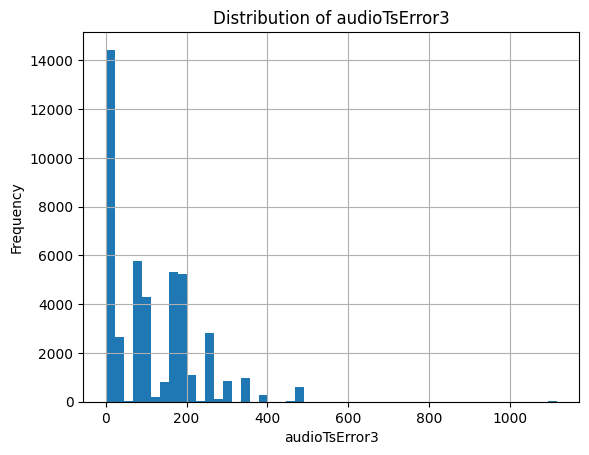

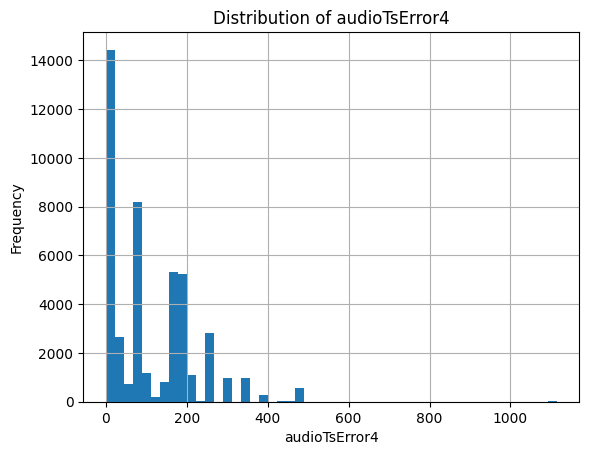

In [167]:
import matplotlib.pyplot as plt

for col in audio:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [168]:
# Correlation matrix
corr_matrix = df[audio].corr()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


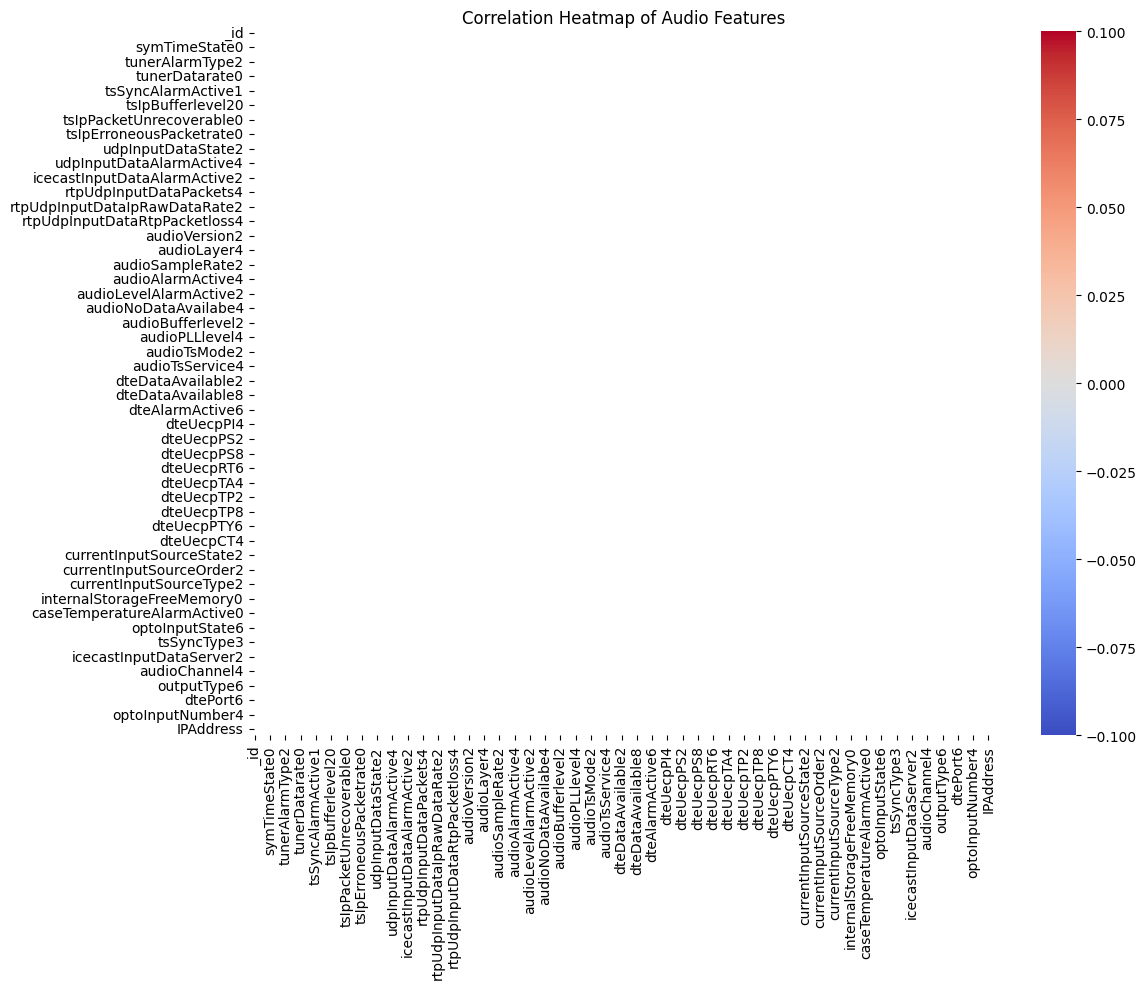

In [174]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

- This histogram shows the distribution of audio levels across all four channels. We can see that the distributions are slightly different for each channel, with AudioLevel4 having generally lower values compared to the others.

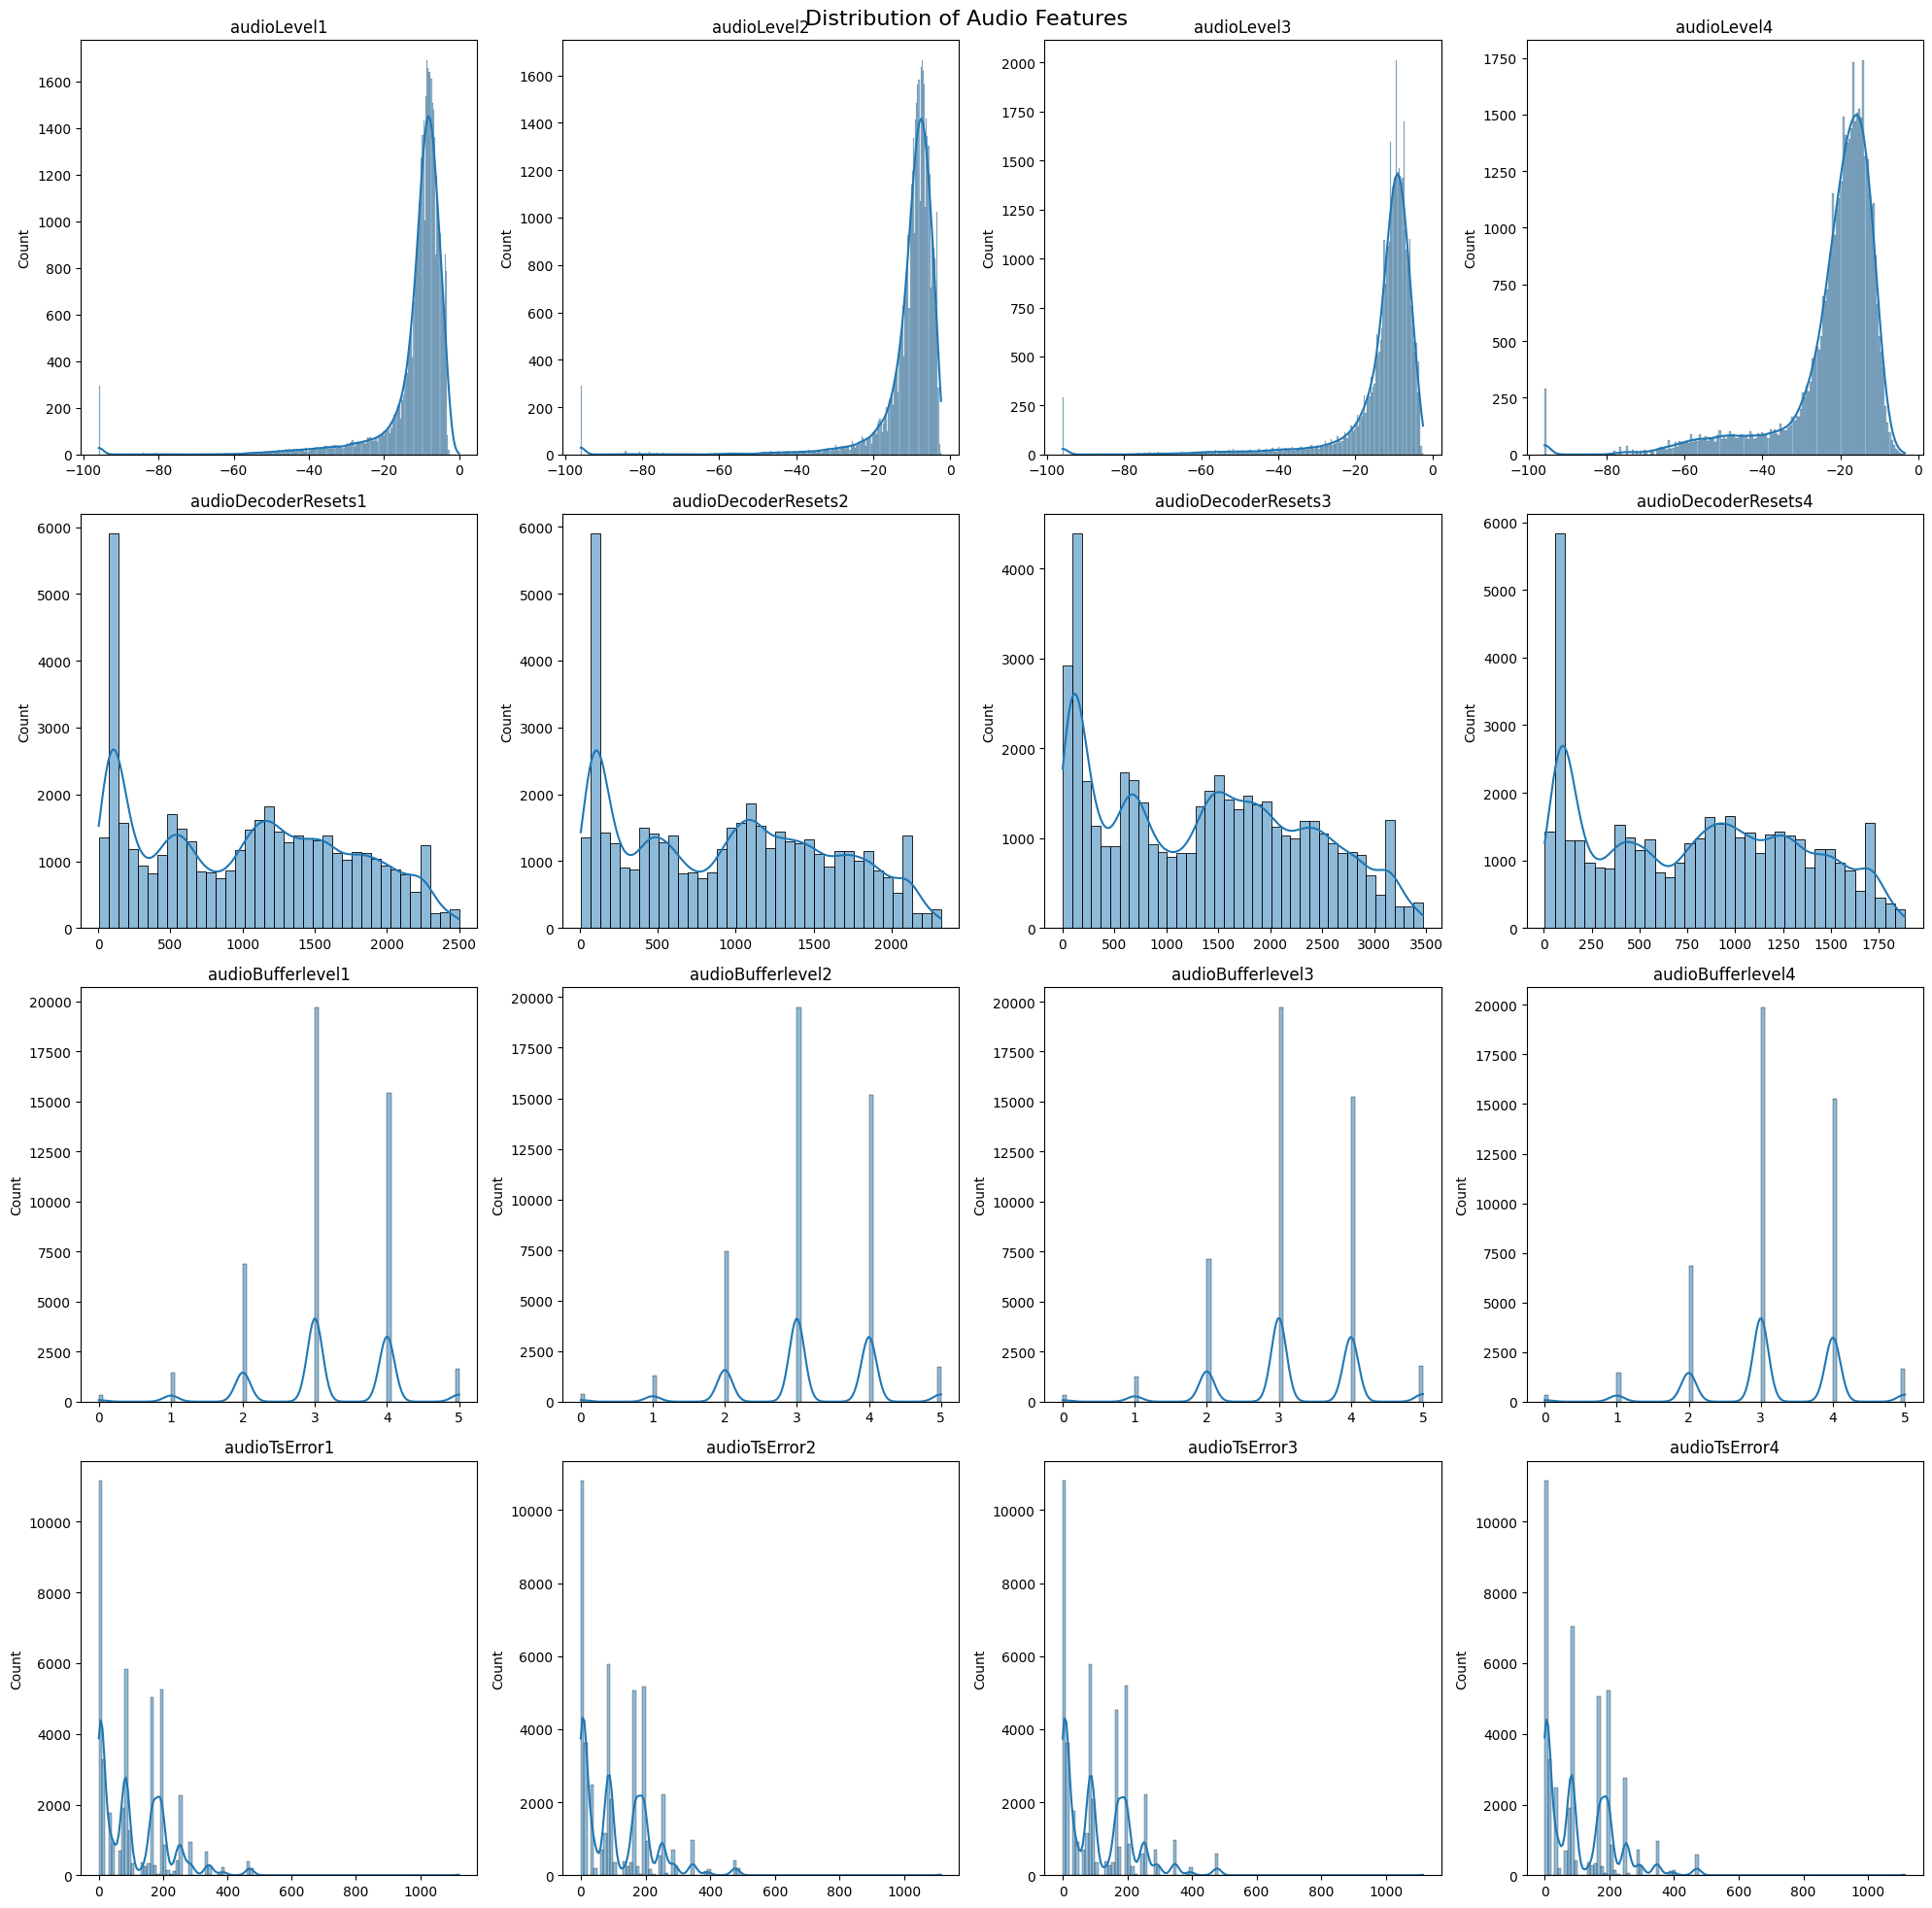

In [170]:
# Distribution plots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Distribution of Audio Features', fontsize=16)

for i, feature in enumerate(audio):
    row = i // 4
    col = i % 4
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')

plt.tight_layout()
plt.show()

- This box plot compares the distribution of audio decoder resets across the four channels. It appears that AudioDecoderResets3 has the highest median and widest range of values, while AudioDecoderResets4 has the lowest median.

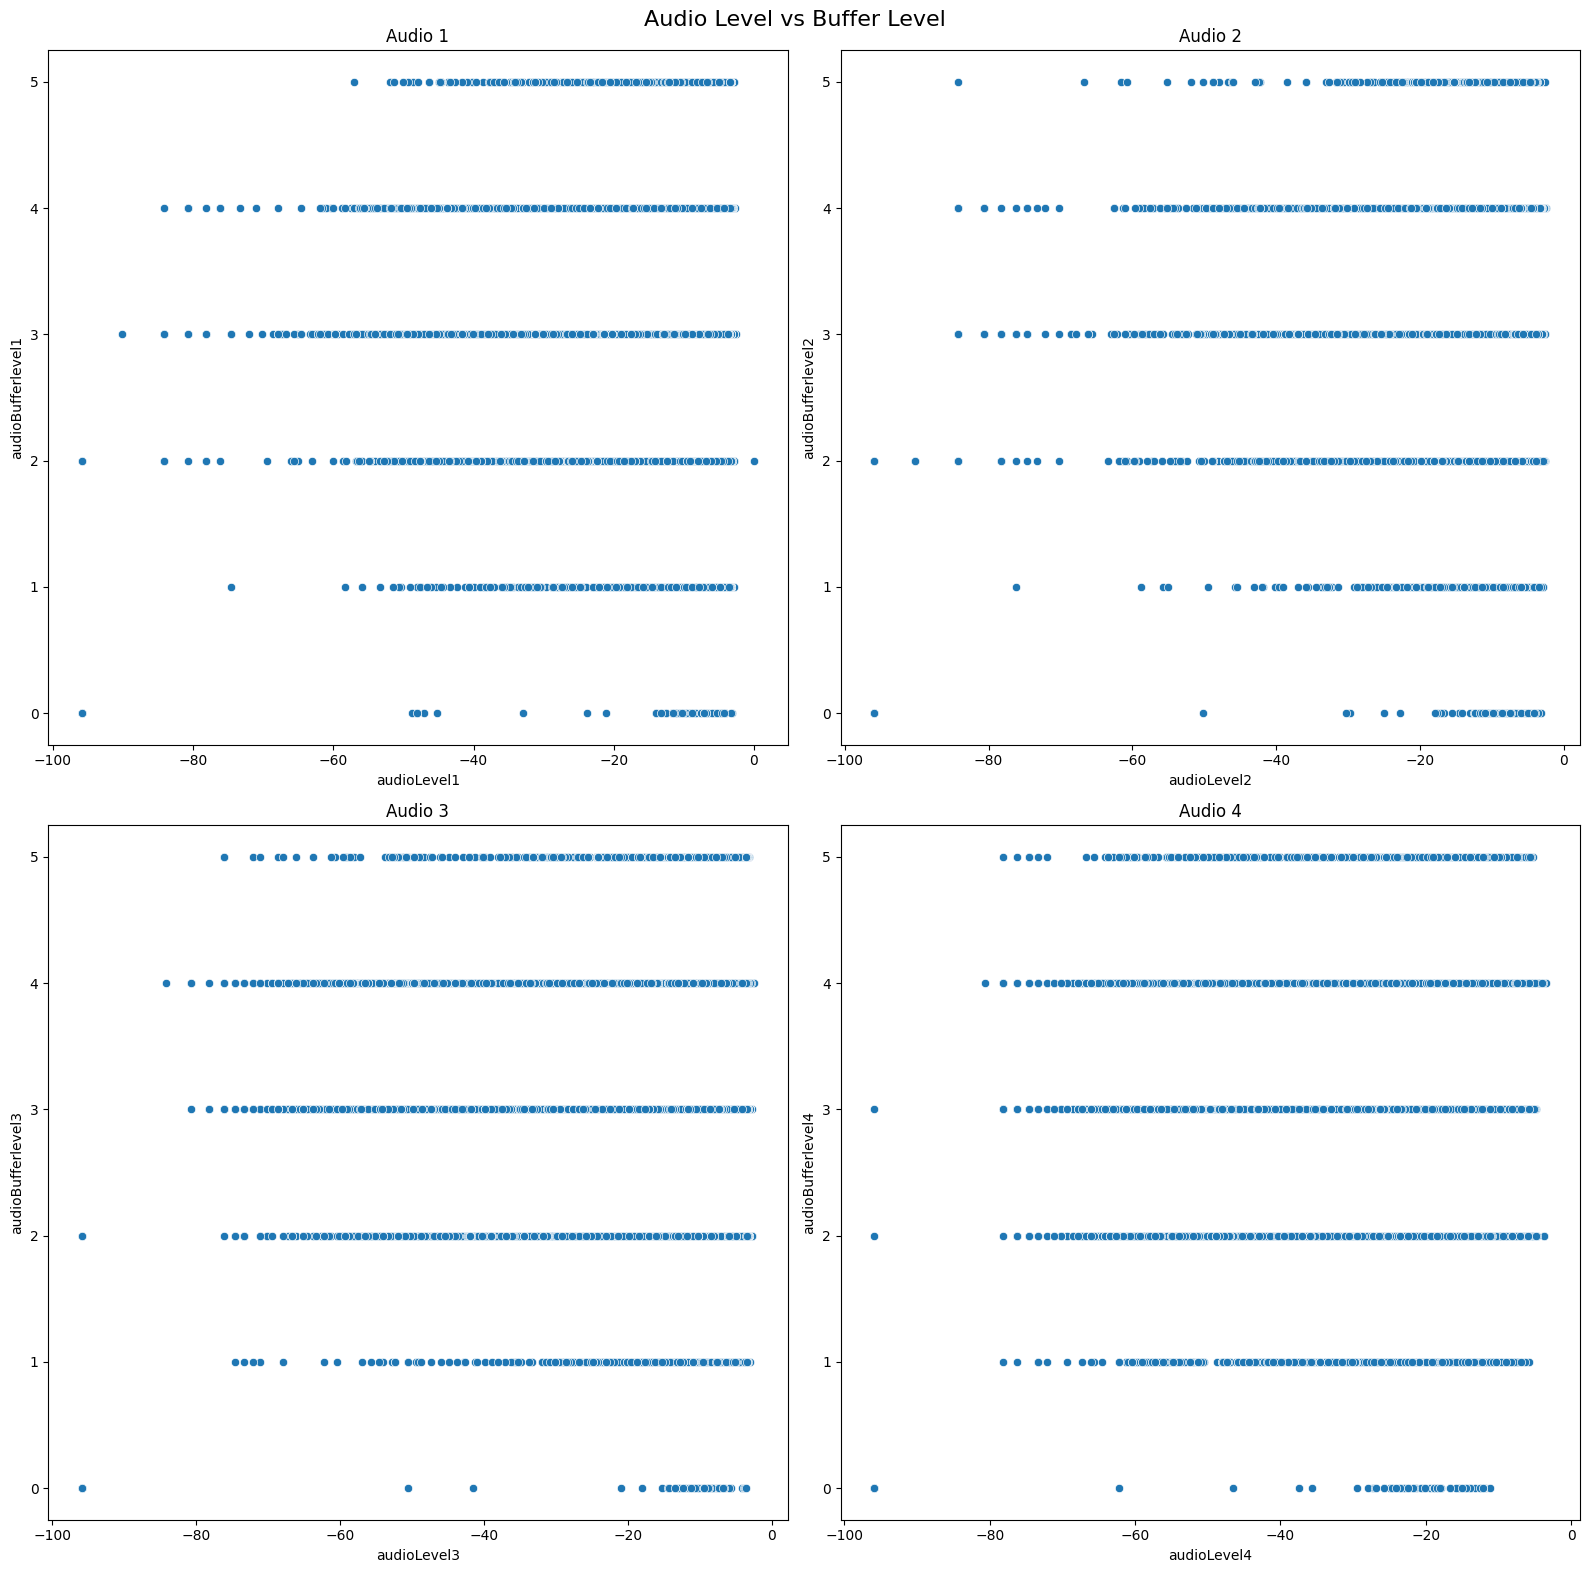

In [171]:
# Analyze relationships between audio levels and buffer levels
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Audio Level vs Buffer Level', fontsize=16)

for i in range(1, 5):
    row = (i-1) // 2
    col = (i-1) % 2
    sns.scatterplot(data=df, x=f'audioLevel{i}', y=f'audioBufferlevel{i}', ax=axes[row, col])
    axes[row, col].set_title(f'Audio {i}')

plt.tight_layout()
plt.show()

- This heatmap visualizes the correlation between different audio features. We can observe strong positive correlations between audio levels of different channels, as well as between audio decoder resets of different channels. There are also some interesting correlations between audio TS errors across channels.

In [172]:
# Analyze decoder resets and TS errors
reset_error_features = [col for col in audio if 'DecoderResets' in col or 'TsError' in col]
reset_error_data = df[reset_error_features]

print("\nSummary of decoder resets and TS errors:")
print(reset_error_data.sum())


Summary of decoder resets and TS errors:
audioDecoderResets1    46585292
audioDecoderResets2    43501844
audioDecoderResets3    62741876
audioDecoderResets4    36531083
audioTsError1           5031573
audioTsError2           5095500
audioTsError3           5120522
audioTsError4           5063225
dtype: int64


In [173]:
# Calculate correlation between decoder resets and TS errors
decoder_ts_corr = reset_error_data.corr()
print("\nCorrelation between decoder resets and TS errors:")
print(decoder_ts_corr)


Correlation between decoder resets and TS errors:
                     audioDecoderResets1  audioDecoderResets2  \
audioDecoderResets1             1.000000             0.999791   
audioDecoderResets2             0.999791             1.000000   
audioDecoderResets3             0.997115             0.996641   
audioDecoderResets4             0.996522             0.996683   
audioTsError1                   0.240845             0.250514   
audioTsError2                   0.233548             0.243368   
audioTsError3                   0.234312             0.244196   
audioTsError4                   0.236754             0.246529   

                     audioDecoderResets3  audioDecoderResets4  audioTsError1  \
audioDecoderResets1             0.997115             0.996522       0.240845   
audioDecoderResets2             0.996641             0.996683       0.250514   
audioDecoderResets3             1.000000             0.987353       0.180035   
audioDecoderResets4             0.987353   

## dte


In [108]:
dte

['dteDataAvailable1',
 'dteDataAvailable2',
 'dteDataAvailable3',
 'dteDataAvailable4',
 'dteDataAvailable5',
 'dteDataAvailable6',
 'dteDataAvailable7',
 'dteDataAvailable8',
 'dteAlarmActive1',
 'dteAlarmActive2',
 'dteAlarmActive3',
 'dteAlarmActive4',
 'dteAlarmActive5',
 'dteAlarmActive6',
 'dteAlarmActive7',
 'dteAlarmActive8',
 'dteUecpPI1',
 'dteUecpPI2',
 'dteUecpPI3',
 'dteUecpPI4',
 'dteUecpPI5',
 'dteUecpPI6',
 'dteUecpPI7',
 'dteUecpPI8',
 'dteUecpPS1',
 'dteUecpPS2',
 'dteUecpPS3',
 'dteUecpPS4',
 'dteUecpPS5',
 'dteUecpPS6',
 'dteUecpPS7',
 'dteUecpPS8',
 'dteUecpRT1',
 'dteUecpRT2',
 'dteUecpRT3',
 'dteUecpRT4',
 'dteUecpRT5',
 'dteUecpRT6',
 'dteUecpRT7',
 'dteUecpRT8',
 'dteUecpTA1',
 'dteUecpTA2',
 'dteUecpTA3',
 'dteUecpTA4',
 'dteUecpTA5',
 'dteUecpTA6',
 'dteUecpTA7',
 'dteUecpTA8',
 'dteUecpTP1',
 'dteUecpTP2',
 'dteUecpTP3',
 'dteUecpTP4',
 'dteUecpTP5',
 'dteUecpTP6',
 'dteUecpTP7',
 'dteUecpTP8',
 'dteUecpPTY1',
 'dteUecpPTY2',
 'dteUecpPTY3',
 'dteUecpPTY4',


In [115]:
dte = [
 'dteUecpTA1',
 'dteUecpTA2',
 'dteUecpTA3',
 'dteUecpTA4',
 'dteUecpTA5',
 'dteUecpTA6',
 'dteUecpTA7',
 'dteUecpTA8',
 'dteUecpTP1',
 'dteUecpTP2',
 'dteUecpTP3',
 'dteUecpTP4',
 'dteUecpTP5',
 'dteUecpTP6',
 'dteUecpTP7',
 'dteUecpTP8',
 'dteUecpPTY1',
 'dteUecpPTY2',
 'dteUecpPTY3',
 'dteUecpPTY4',
 'dteUecpPTY5',
 'dteUecpPTY6',
 'dteUecpPTY7',
 'dteUecpPTY8']

In [116]:
# Get descriptive statistics for the states columns
dte = data[dte].describe()
dte

dteUecpTA1  dteUecpTA2  dteUecpTA3  dteUecpTA4  dteUecpTA5  dteUecpTA6  \
count     45472.0     45472.0     45472.0     45472.0     45472.0     45472.0   
mean         -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
std           0.0         0.0         0.0         0.0         0.0         0.0   
min          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
25%          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
50%          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
75%          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   
max          -1.0        -1.0        -1.0        -1.0        -1.0        -1.0   

       dteUecpTA7  dteUecpTA8  dteUecpTP1  dteUecpTP2  ...  dteUecpTP7  \
count     45472.0     45472.0     45472.0     45472.0  ...     45472.0   
mean         -1.0        -1.0        -1.0        -1.0  ...        -1.0   
std           0.0         0.0         0.0         0.0  ...         0.0   
min          -1.0        -1.0        -1.0        -1.0  ...        -1.0   
25%          -1.0        -1.0        -1.0        -1.0  ...        -1.0   
50%          -1.0        -1.0        -1.0        -1.0  ...        -1.0   
75%          -1.0        -1.0        -1.0        -1.0  ...        -1.0   
max          -1.0        -1.0        -1.0        -1.0  ...        -1.0   

       dteUecpTP8  dteUecpPTY1  dteUecpPTY2  dteUecpPTY3  dteUecpPTY4  \
count     45472.0      45472.0      45472.0      45472.0      45472.0   
mean         -1.0         -1.0         -1.0         -1.0         -1.0   
std           0.0          0.0          0.0          0.0          0.0   
min          -1.0         -1.0         -1.0         -1.0         -1.0   
25%          -1.0         -1.0         -1.0         -1.0         -1.0   
50%          -1.0         -1.0         -1.0         -1.0         -1.0   
75%          -1.0         -1.0         -1.0         -1.0         -1.0   
max          -1.0         -1.0         -1.0         -1.0         -1.0   

       dteUecpPTY5  dteUecpPTY6  dteUecpPTY7  dteUecpPTY8  
count      45472.0      45472.0      45472.0      45472.0  
mean          -1.0         -1.0         -1.0         -1.0  
std            0.0          0.0          0.0          0.0  
min           -1.0         -1.0         -1.0         -1.0  
25%           -1.0         -1.0         -1.0         -1.0  
50%           -1.0         -1.0         -1.0         -1.0  
75%           -1.0         -1.0         -1.0         -1.0  
max           -1.0         -1.0         -1.0         -1.0  

[8 rows x 24 columns]

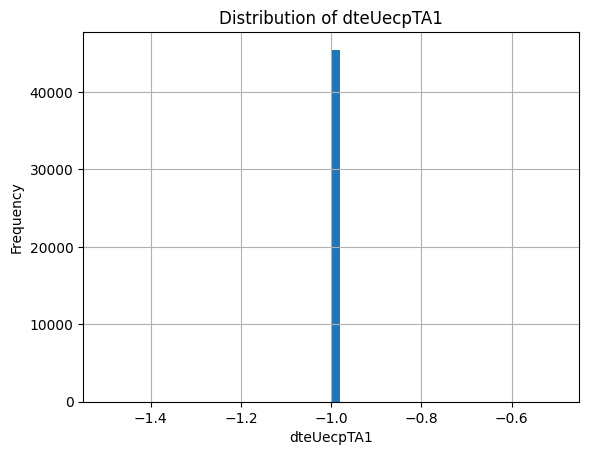

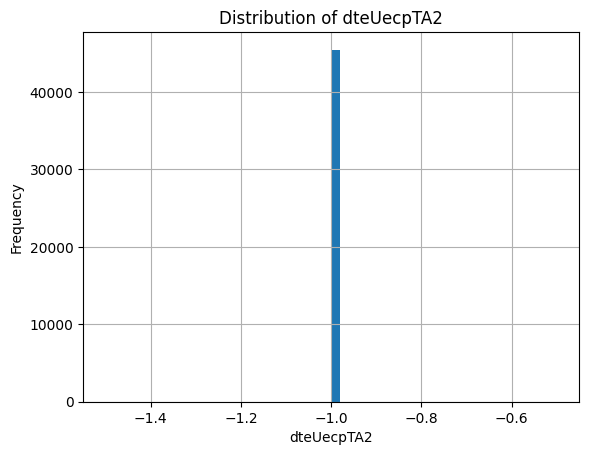

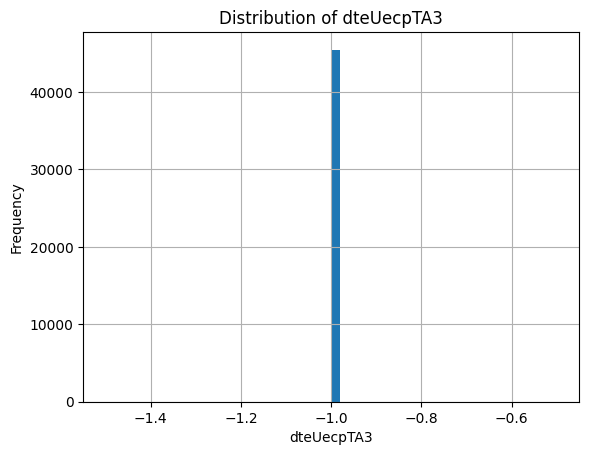

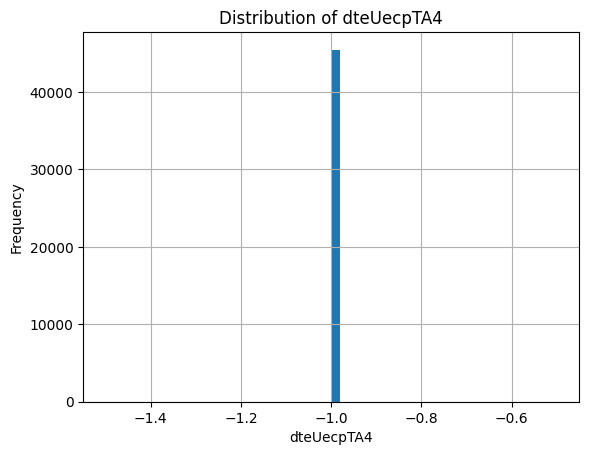

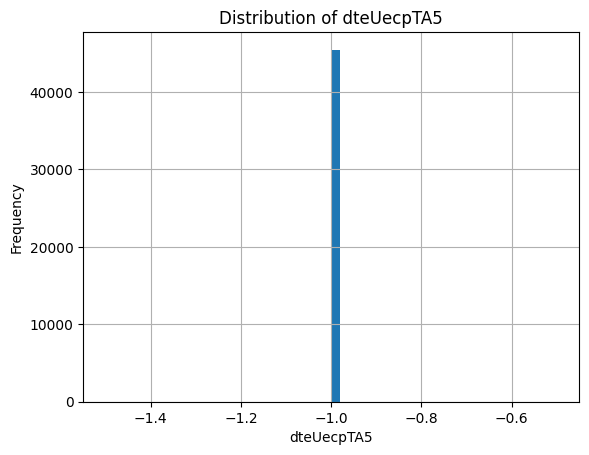

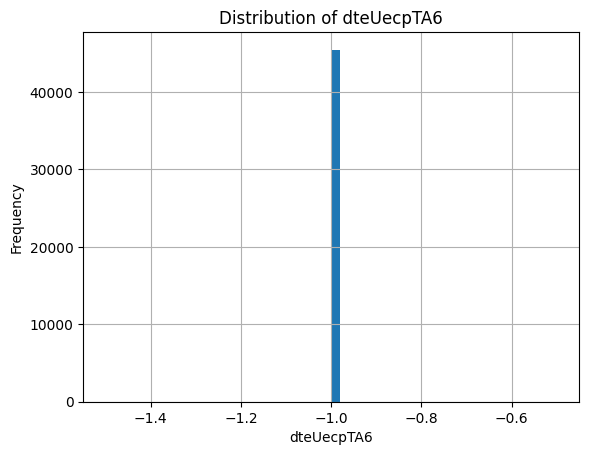

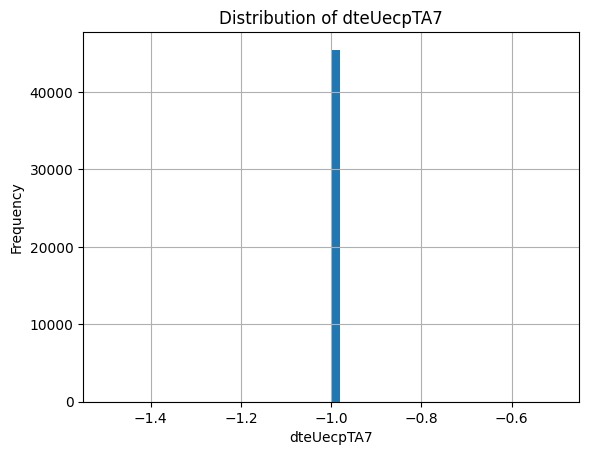

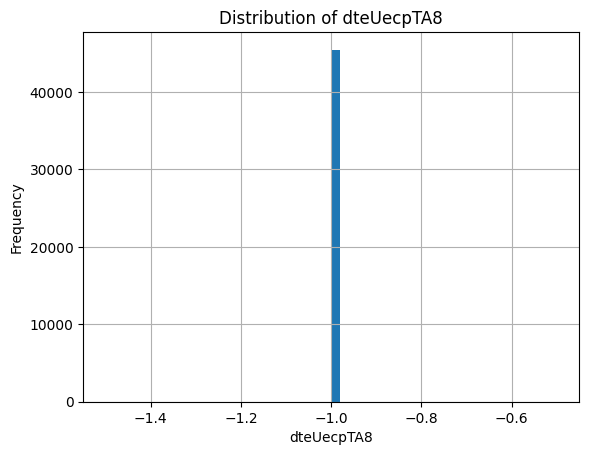

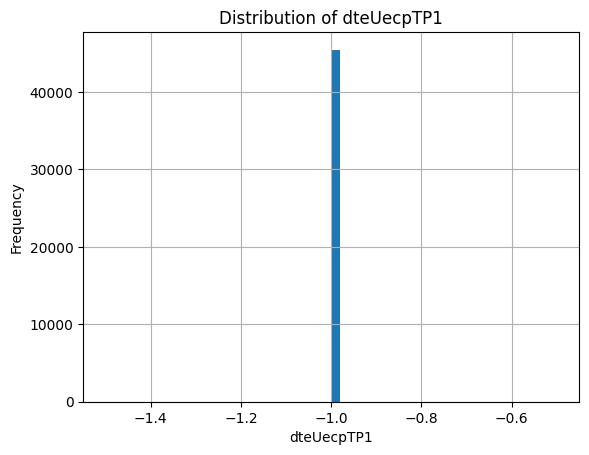

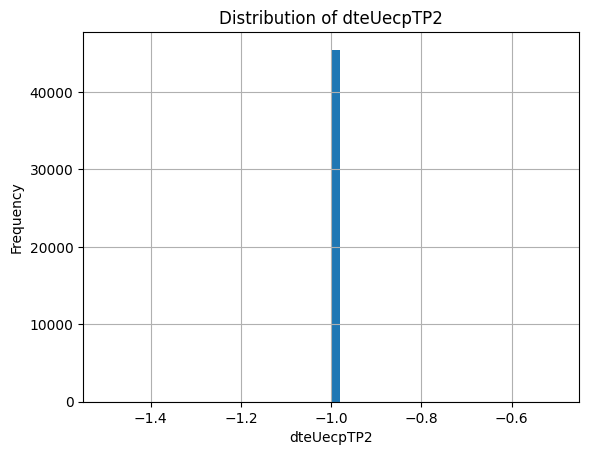

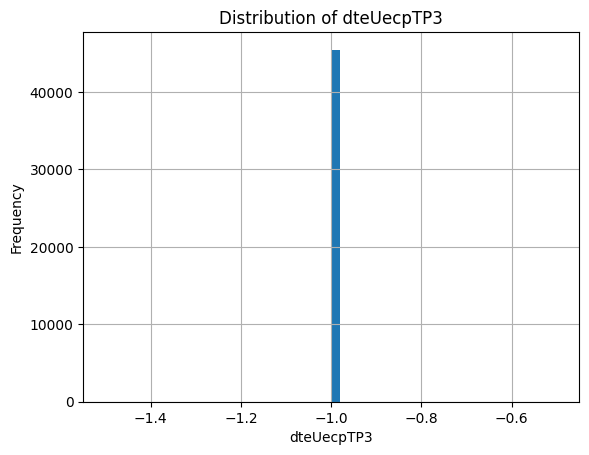

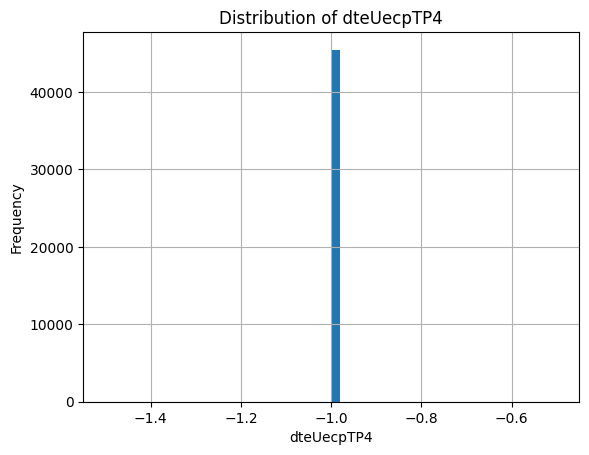

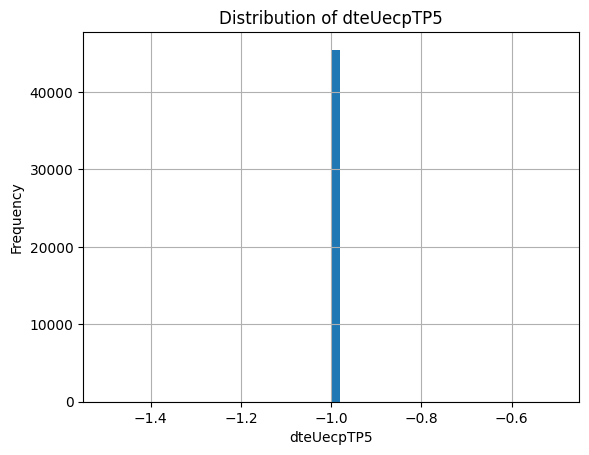

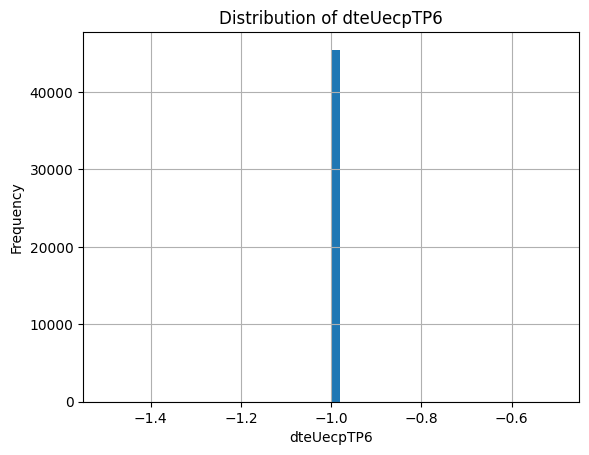

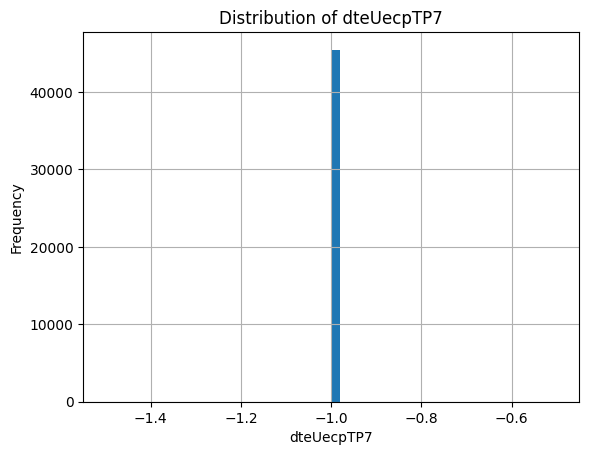

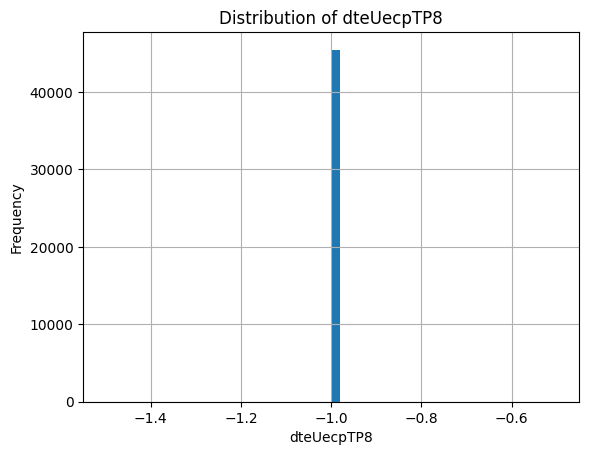

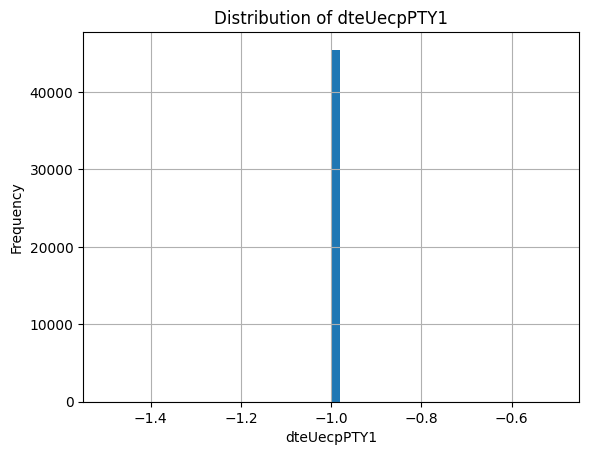

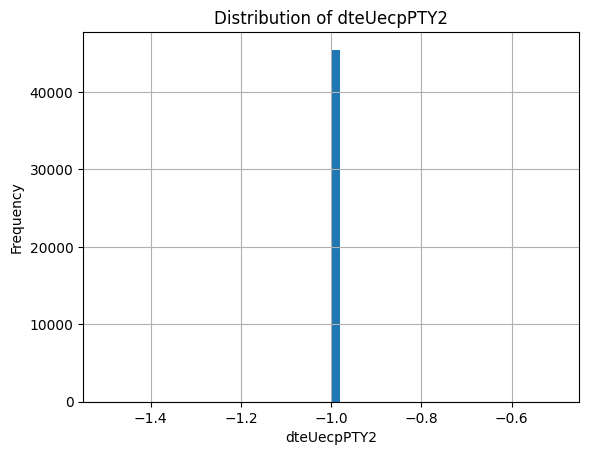

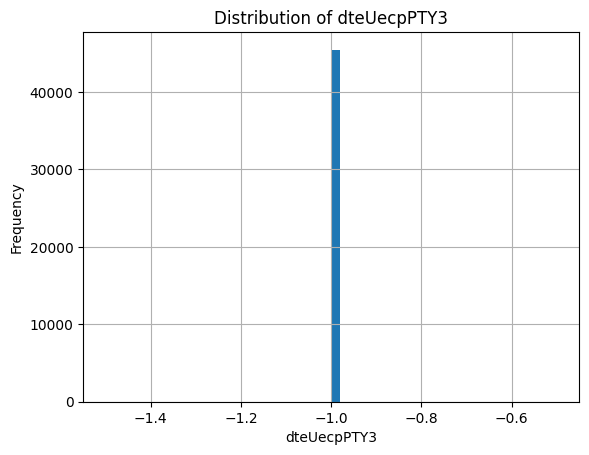

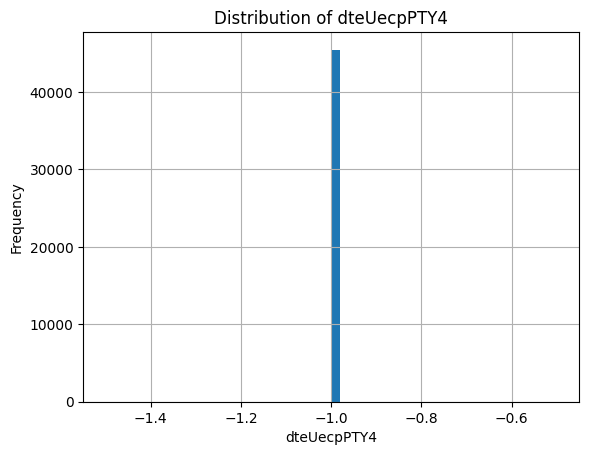

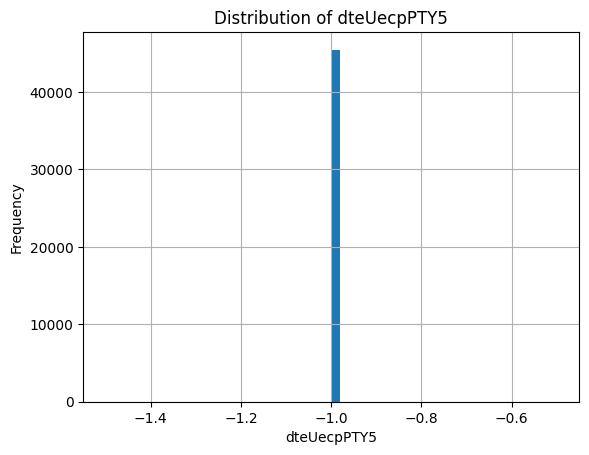

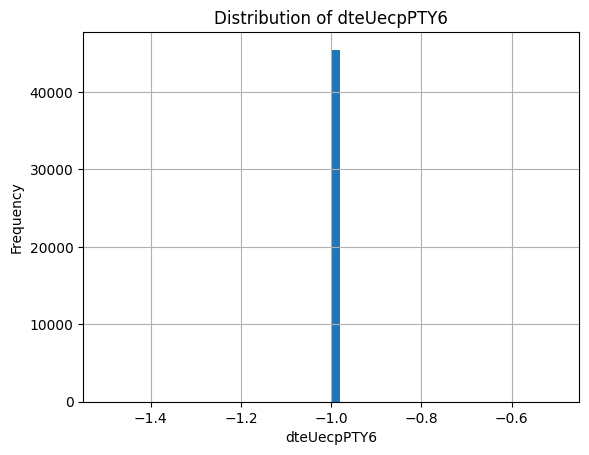

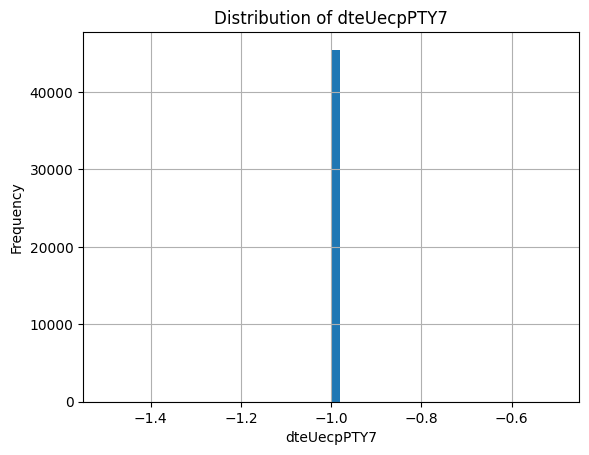

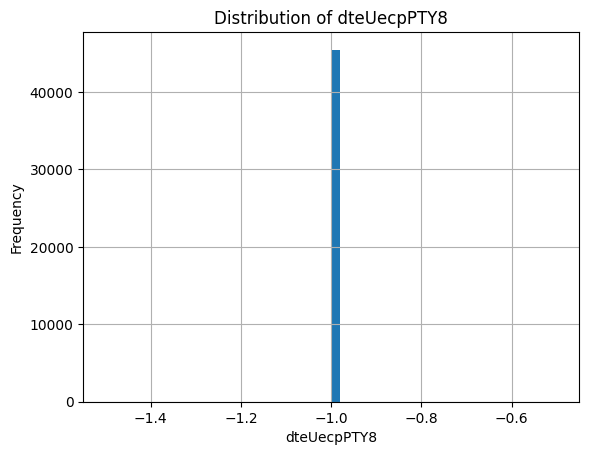

In [117]:
import matplotlib.pyplot as plt

for col in dte:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## currentInputSource


In [118]:
currentInputSource

['currentInputSourceOrder1',
 'currentInputSourceOrder2',
 'currentInputSourceOrder3',
 'currentInputSourceOrder4',
 'currentInputSourceOrder5',
 'currentInputSourceOrder6',
 'currentInputSourceType1',
 'currentInputSourceType2',
 'currentInputSourceType3',
 'currentInputSourceType4',
 'currentInputSourceType5',
 'currentInputSourceType6']

In [119]:
# Get descriptive statistics for the states columns
currentInputSource = data[currentInputSource].describe()
currentInputSource

currentInputSourceOrder1 currentInputSourceOrder2  \
count                     45472                    45472   
unique                        2                        1   
top                  mainSource               mainSource   
freq                      45191                    45472   

       currentInputSourceOrder3 currentInputSourceOrder4  \
count                     45472                    45472   
unique                        1                        1   
top                  mainSource               mainSource   
freq                      45472                    45472   

       currentInputSourceOrder5 currentInputSourceOrder6  \
count                     45472                    45472   
unique                        1                        1   
top                  mainSource               mainSource   
freq                      45472                    45472   

       currentInputSourceType1 currentInputSourceType2  \
count                    45472                   45472   
unique                       2                       2   
top                    tsTuner                 tsTuner   
freq                     45191                   45191   

       currentInputSourceType3 currentInputSourceType4  \
count                    45472                   45472   
unique                       2                       2   
top                    tsTuner                 tsTuner   
freq                     45191                   45191   

       currentInputSourceType5 currentInputSourceType6  
count                    45472                   45472  
unique                       2                       2  
top                notAssigned             notAssigned  
freq                     45191                   45191

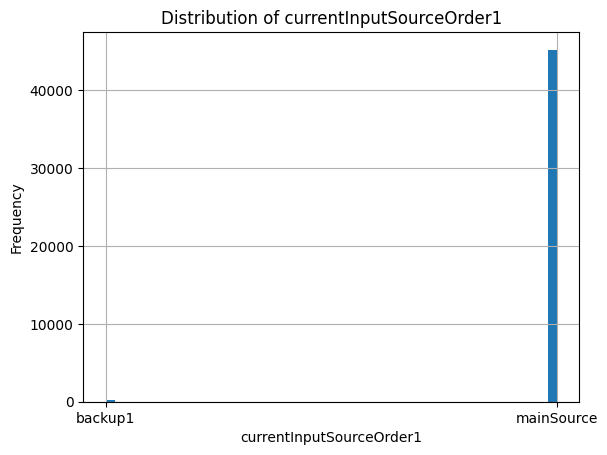

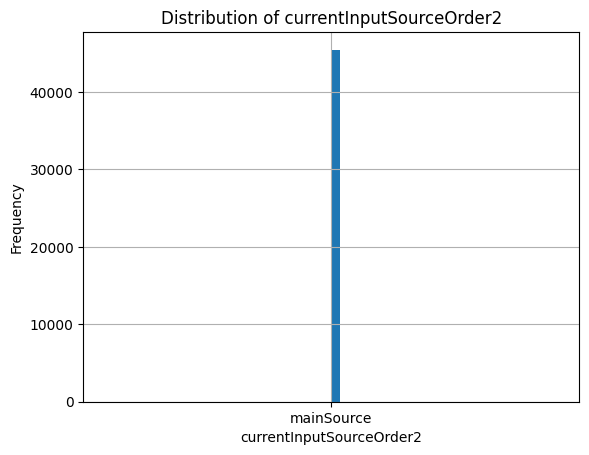

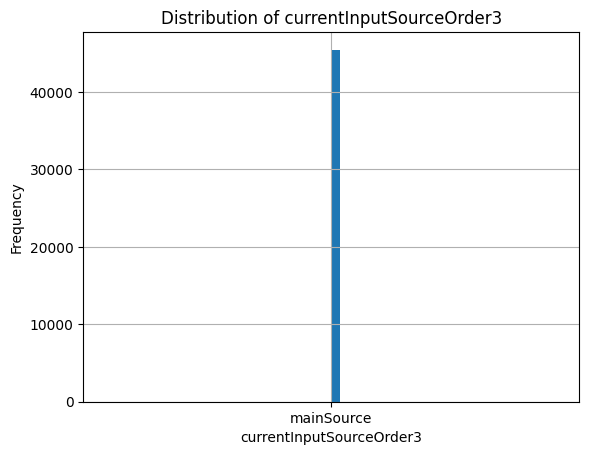

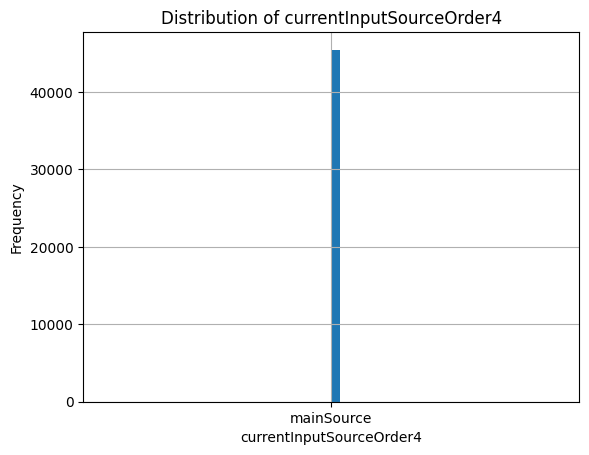

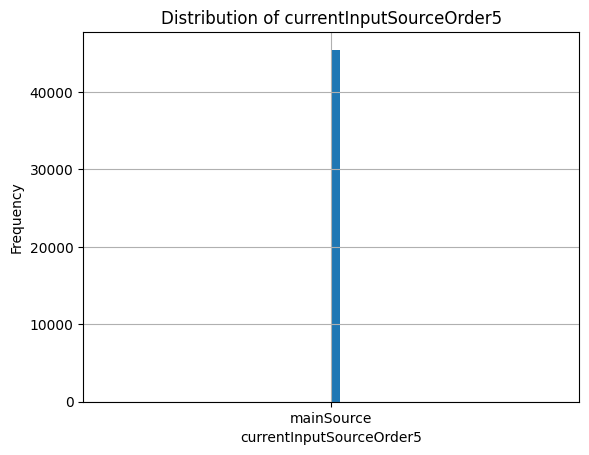

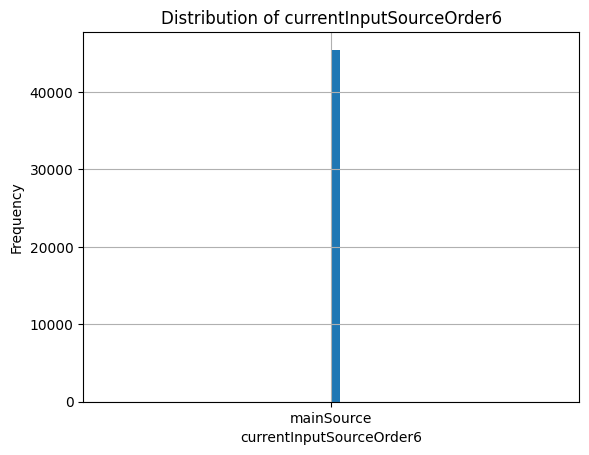

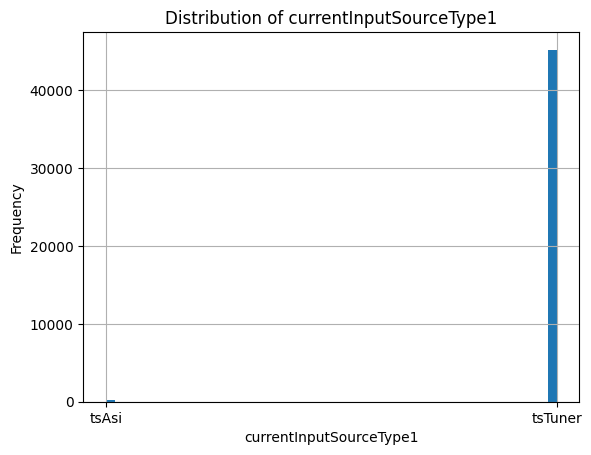

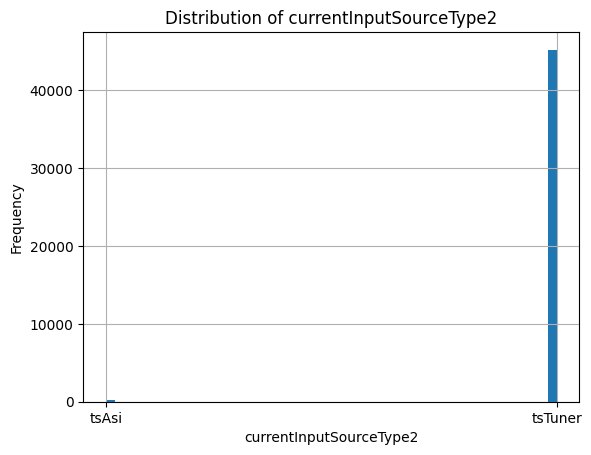

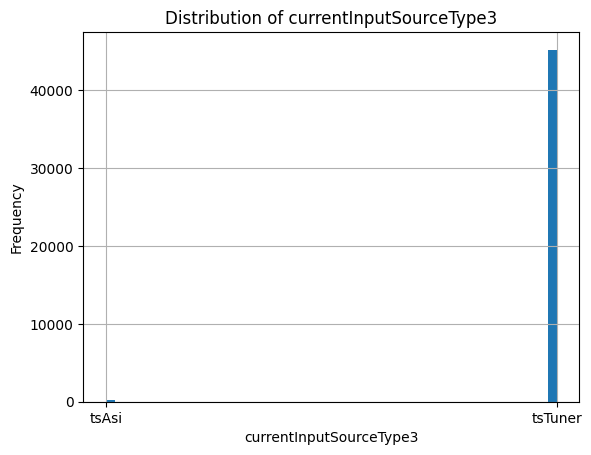

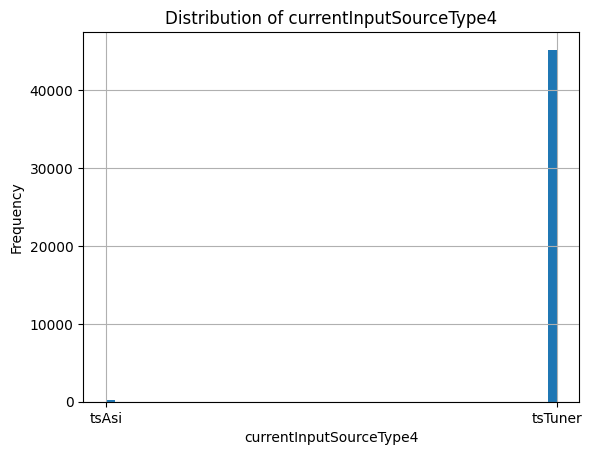

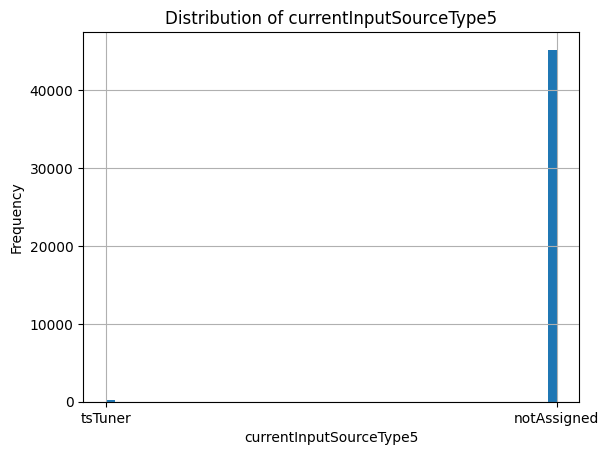

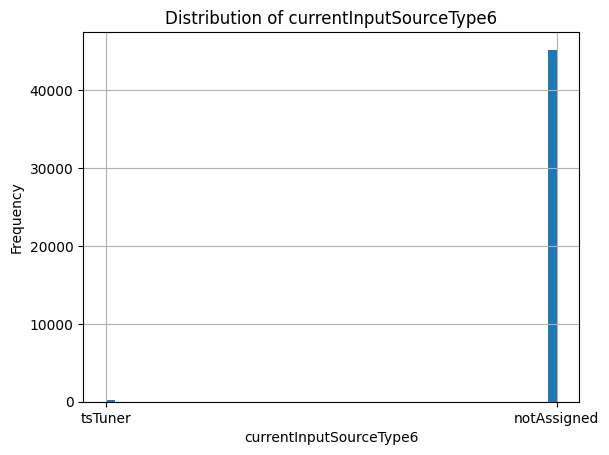

In [120]:
import matplotlib.pyplot as plt

for col in currentInputSource:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## internalStorage


In [121]:
internalStorage

['internalStorageFreeMemory0',
 'internalStorageSection1',
 'internalStorageFree1',
 'internalStorageQuota1',
 'internalStorageQuotaUsed1']

In [122]:
# Get descriptive statistics for the states columns
internalStorage = data[internalStorage].describe()
internalStorage

internalStorageFreeMemory0  internalStorageFree1  \
count                4.547200e+04          45472.000000   
mean                 6.234410e+07          63839.969102   
std                  3.435662e+02              0.391841   
min                  6.233974e+07          63835.000000   
25%                  6.234413e+07          63840.000000   
50%                  6.234413e+07          63840.000000   
75%                  6.234413e+07          63840.000000   
max                  6.234413e+07          63840.000000   

       internalStorageQuota1  internalStorageQuotaUsed1  
count                45472.0               45472.000000  
mean                 63844.0                   1.024719  
std                      0.0                   0.313473  
min                  63844.0                   1.000000  
25%                  63844.0                   1.000000  
50%                  63844.0                   1.000000  
75%                  63844.0                   1.000000  
max                  63844.0                   5.000000

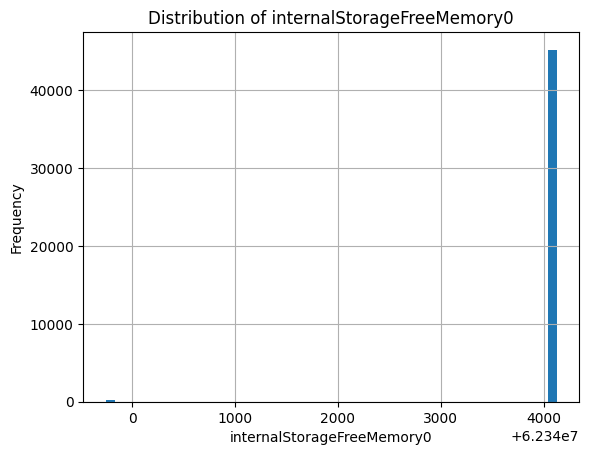

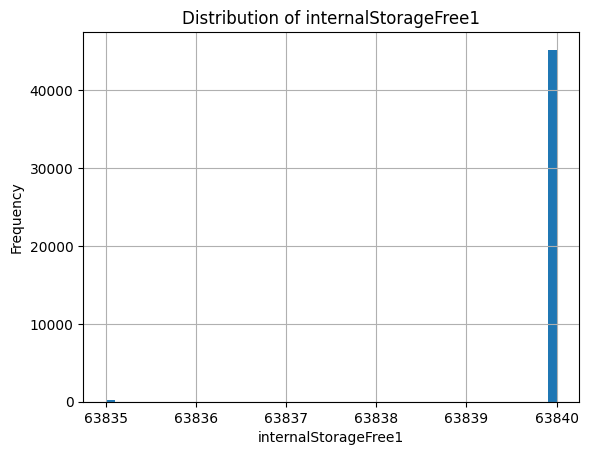

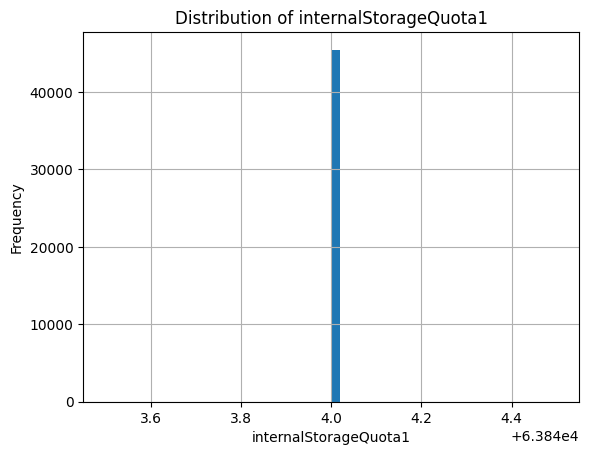

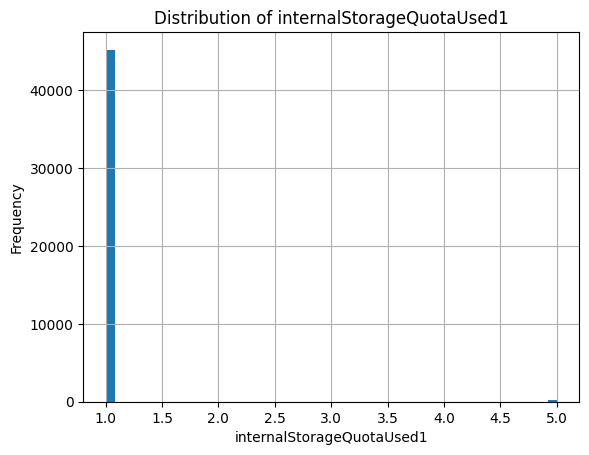

In [123]:
import matplotlib.pyplot as plt

for col in internalStorage:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## caseTemperature


In [137]:
caseTemperature

['caseTemperature0', 'caseTemperatureAlarmActive0']

In [176]:
caseTemperature = data['caseTemperature0'].describe()
caseTemperature

count    45472.000000
mean        34.360881
std          5.588807
min         25.000000
25%         31.000000
50%         33.000000
75%         37.000000
max         53.000000
Name: caseTemperature0, dtype: float64

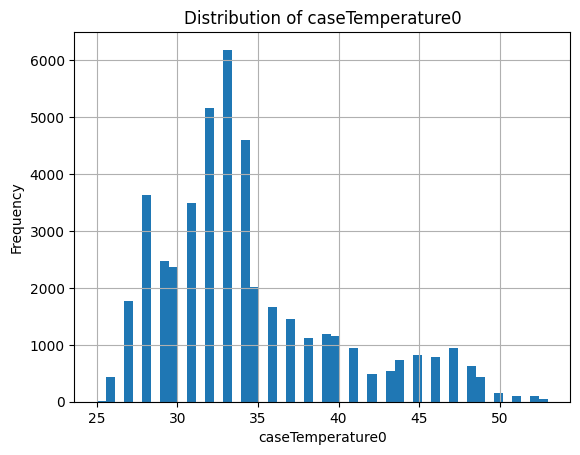

In [180]:
  plt.figure()
  data['caseTemperature0'].hist(bins=50)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

## udpInputDataChannel


In [146]:
udpInputDataChannel

['udpInputDataChannel1',
 'udpInputDataChannel2',
 'udpInputDataChannel3',
 'udpInputDataChannel4']

In [147]:
# Get descriptive statistics for the states columns
udpInputDataChannel = data[udpInputDataChannel].describe()
udpInputDataChannel

udpInputDataChannel1 udpInputDataChannel2 udpInputDataChannel3  \
count                 45472                45472                45472   
unique                    1                    1                    1   
top     UDP Input Channel 1  UDP Input Channel 2  UDP Input Channel 3   
freq                  45472                45472                45472   

       udpInputDataChannel4  
count                 45472  
unique                    1  
top     UDP Input Channel 4  
freq                  45472

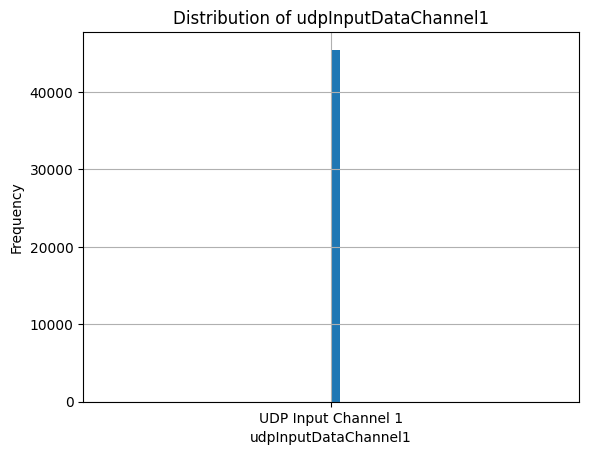

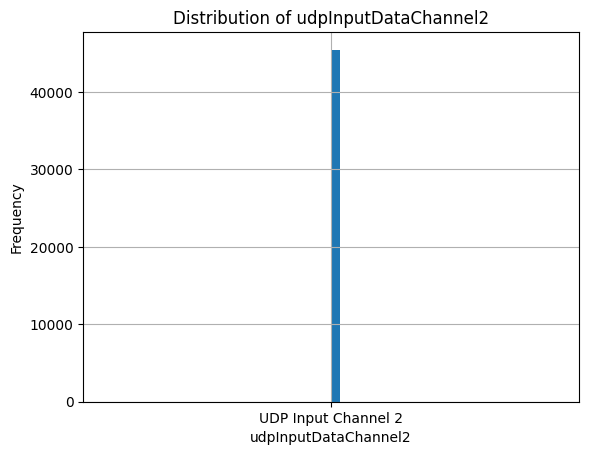

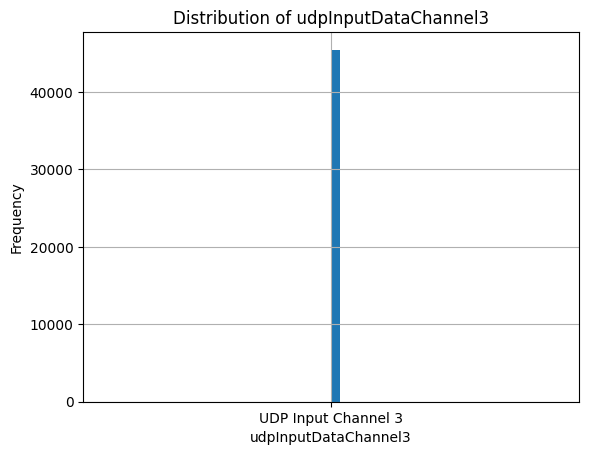

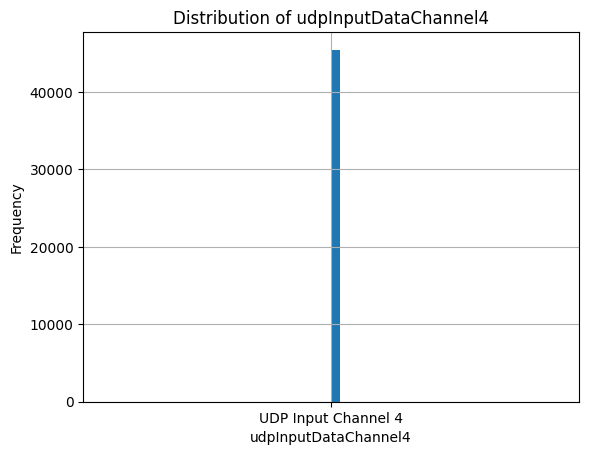

In [148]:
import matplotlib.pyplot as plt

for col in udpInputDataChannel:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## icecastInputDataServer


In [149]:
icecastInputDataServer

['icecastInputDataServer1',
 'icecastInputDataServer2',
 'icecastInputDataServer3',
 'icecastInputDataServer4']

In [150]:
# Get descriptive statistics for the states columns
icecastInputDataServer = data[icecastInputDataServer].describe()
icecastInputDataServer

icecastInputDataServer1     icecastInputDataServer2  \
count                        45472                       45472   
unique                           1                           1   
top     Icecast Input Data Server1  icecast Input Data Server2   
freq                         45472                       45472   

           icecastInputDataServer3     icecastInputDataServer4  
count                        45472                       45472  
unique                           1                           1  
top     icecast Input Data Server3  icecast Input Data Server4  
freq                         45472                       45472

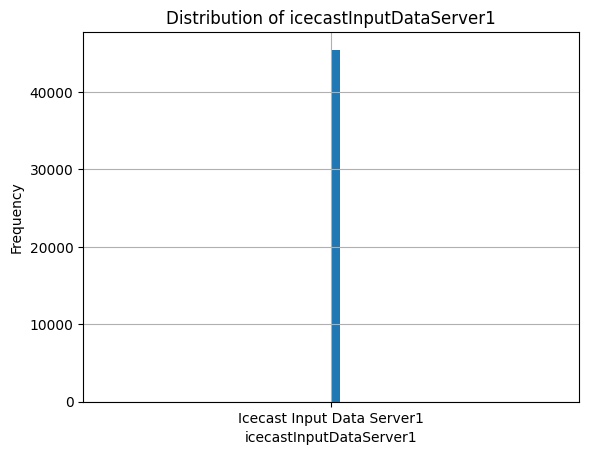

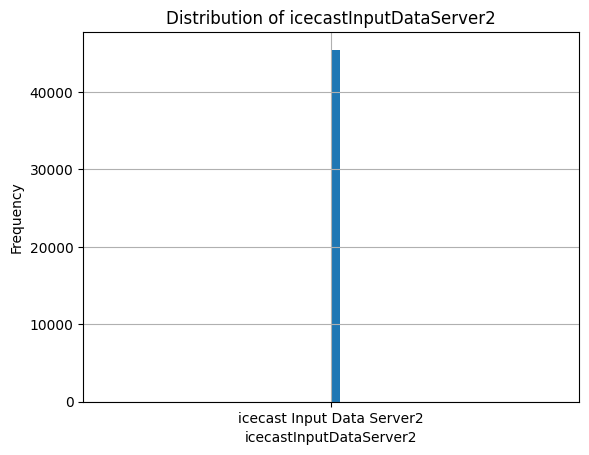

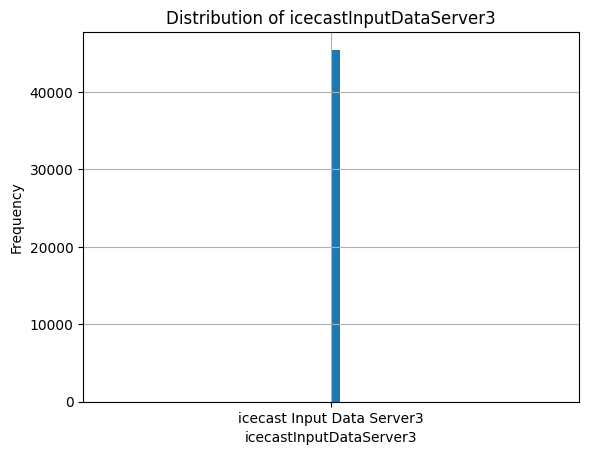

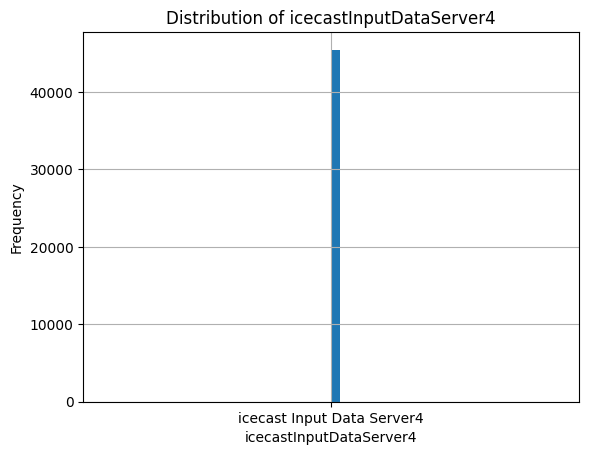

In [151]:
import matplotlib.pyplot as plt

for col in icecastInputDataServer:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## outputType


In [152]:
outputType

['outputType1',
 'outputType2',
 'outputType3',
 'outputType4',
 'outputType5',
 'outputType6']

In [153]:
# Get descriptive statistics for the states columns
outputType = data[outputType].describe()
outputType

outputType1     outputType2     outputType3     outputType4  \
count            45472           45472           45472           45472   
unique               1               1               1               1   
top     Audio Output 1  Audio Output 2  Audio Output 3  Audio Output 4   
freq             45472           45472           45472           45472   

       outputType5 outputType6  
count        45472       45472  
unique           1           1  
top     ASI Output   IP Output  
freq         45472       45472

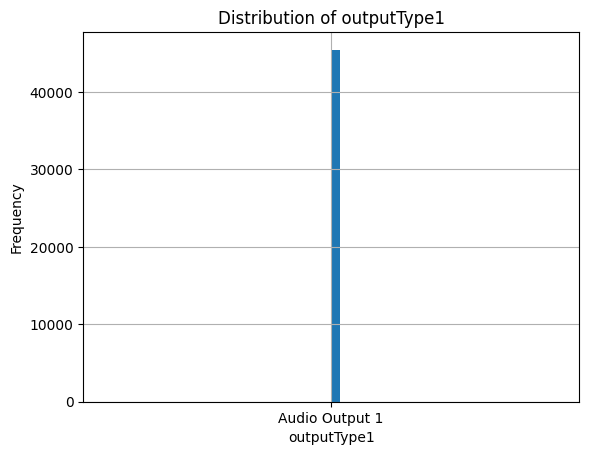

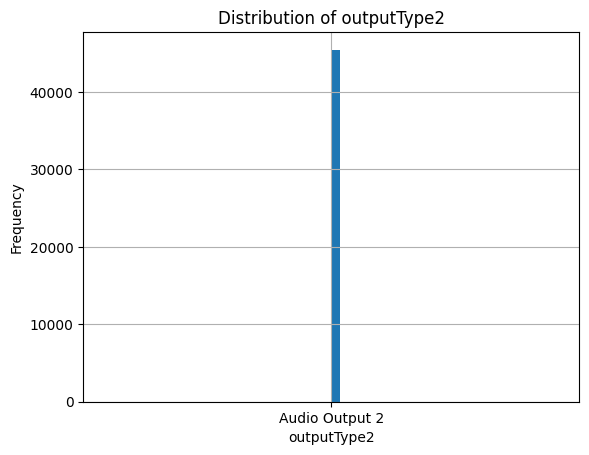

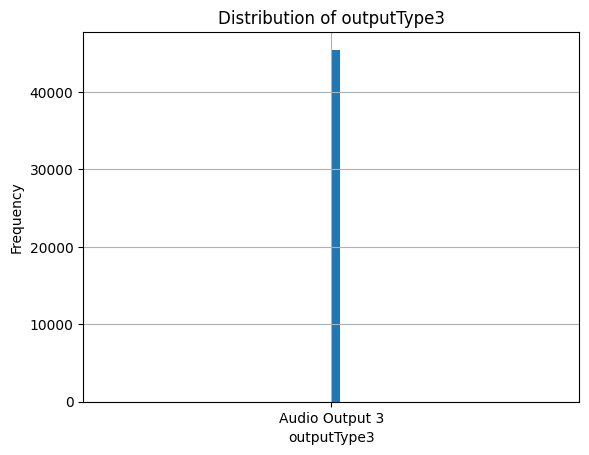

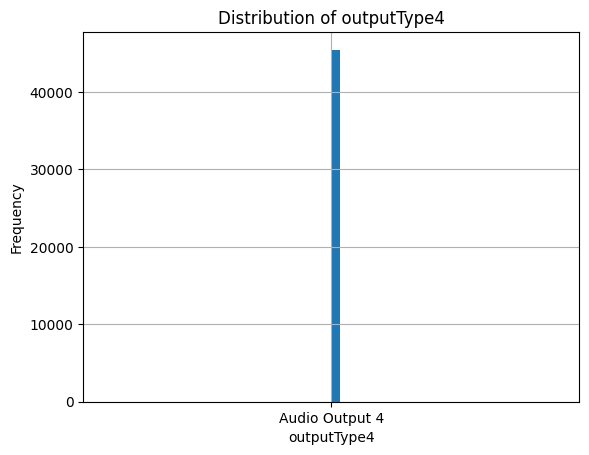

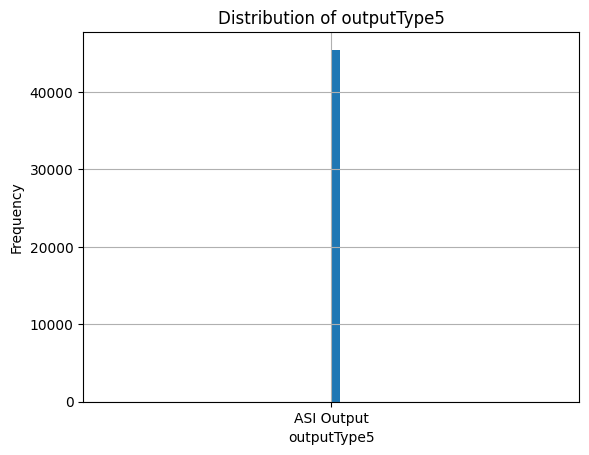

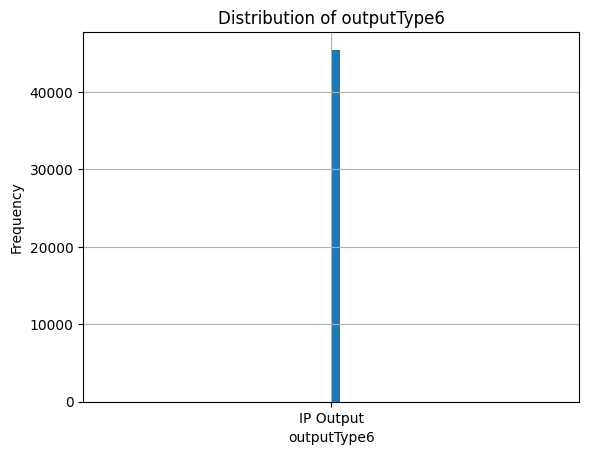

In [154]:
import matplotlib.pyplot as plt

for col in outputType:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## other


In [158]:
other

['punctureRate0', 'nid0', 'tunerDatarate0', 'asiDatarate0', 'ipDatarate0']

In [159]:
# Get descriptive statistics for the states columns
other = data[other].describe()
other

tunerDatarate0  asiDatarate0  ipDatarate0
count    4.547200e+04       45472.0      45472.0
mean     4.326847e+06           0.0          0.0
std      3.456957e+05           0.0          0.0
min      0.000000e+00           0.0          0.0
25%      4.343552e+06           0.0          0.0
50%      4.355584e+06           0.0          0.0
75%      4.367616e+06           0.0          0.0
max      4.379648e+06           0.0          0.0

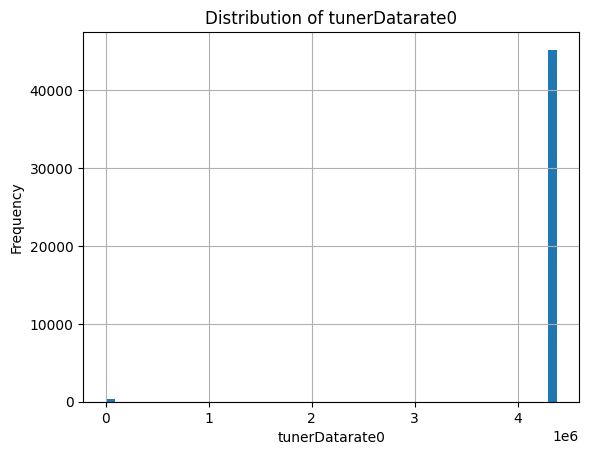

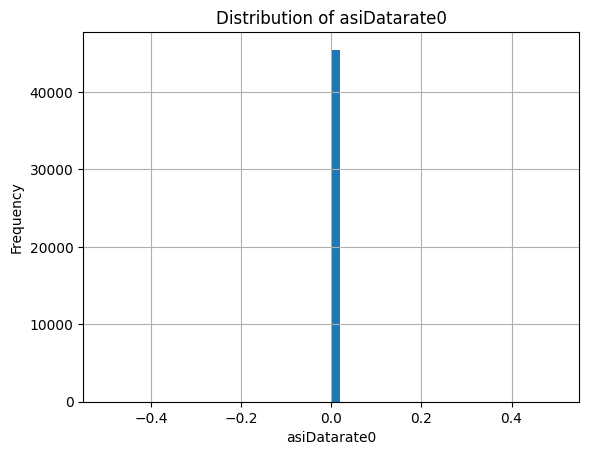

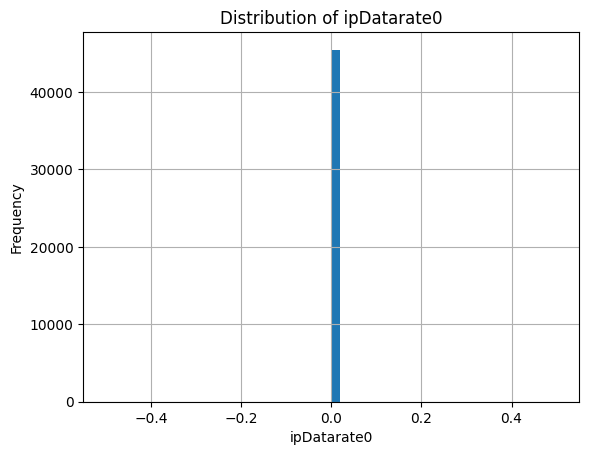

In [160]:
import matplotlib.pyplot as plt

for col in other:
    plt.figure()
    data[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()